In [1]:
#!pip install xgboost
import pandas as pd
import numpy as np
import tensorflow_hub as hub
final = pd.read_csv('final.csv')

In [2]:
#final = final.fillna(1)
final = final*1
#target = final.pop('link_flair_text')
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
transfomed_label = encoder.fit_transform(final.link_flair_text)


In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(final[['title']], transfomed_label, test_size=0.2)

In [4]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train, y_train)

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

from sklearn.tree import DecisionTreeClassifier
dclf = DecisionTreeClassifier()
dclf.fit(X_train, y_train)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

from sklearn.ensemble import RandomForestClassifier
clf_C = RandomForestClassifier()
clf_C.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [6]:
from sklearn.model_selection import RandomizedSearchCV

clf = RandomForestClassifier(max_depth=9,n_jobs=-1)

parameters ={'random_state':[5,7,2,9,24,55],'n_estimators':[500,324,954,10000,5000,420,150,20000,15000],'max_features':['auto',None,'log2'],'min_samples_split':[6,7,8,12,16],'min_samples_leaf':[1,2,3,4,5]}

grid_obj = RandomizedSearchCV(clf,parameters, refit='accuracy', scoring=['accuracy'])

grid_fit = grid_obj.fit(X_train, y_train)

best_clf = grid_fit.best_estimator_

print(best_clf.score(X_test, y_test))


0.5792452830188679


In [ ]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

xgb_model = xgb.XGBClassifier()

parameters ={'max_depth':[2,5,9,17,13],'min_child_weight':[1,2,3,4,5],'n_estimators':[500,324,954,10000,5000,420,150],'random_state':[5,7,2,9,24,55],'num_parallel_tree':[500,324,420,150],'booster':['gbtree','gblinear','dart'],'max_delta_step':[1,2,3,4,5]}
 
grid_obj = RandomizedSearchCV(xgb_model,parameters, refit='accuracy', scoring=['accuracy'])

grid_fit = grid_obj.fit(X_train, y_train)

best_clf = grid_fit.best_estimator_

print(best_clf.score(X_test, y_test))

In [5]:
print(clf.score(X_test, y_test))
print(logreg.score(X_test, y_test))
print(dclf.score(X_test, y_test))
print(knn.score(X_test, y_test))
print(lda.score(X_test, y_test))
print(gnb.score(X_test, y_test))
print(clf_C.score(X_test, y_test))

0.5075471698113208
0.46037735849056605
0.4320754716981132
0.439622641509434
0.4867924528301887
0.3018867924528302
0.5075471698113208


In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = np.asarray(X_train).astype(np.float32)
X_test = np.asarray(X_test).astype(np.float32)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


X_train[0]

array([2.3769907e-04, 5.6252460e-04, 9.0243900e-01, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00], dtype=float32)

In [5]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras import Sequential

model = Sequential()
model.add(Dense(7,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(64,activation='relu'))
#model.add(Dropout(0.4))
model.add(Dense(32,activation='relu'))
#model.add(Dropout(0.4))
model.add(Dense(16,activation='relu'))
model.add(Dense(10,activation='softmax'))
#model.summary()

In [6]:
model.compile(tf.optimizers.Adam(lr=0.0001, decay=1e-6),loss=tf.losses.categorical_crossentropy, metrics=['accuracy', 'mse',precision,recall, f1])


In [7]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10000)

Train on 2120 samples, validate on 530 samples
Epoch 1/10000
2120/2120 [==============================] - 1s 357us/sample - loss: 2.2554 - accuracy: 0.3439 - mse: 0.0890 - val_loss: 2.2256 - val_accuracy: 0.4151 - val_mse: 0.0884
Epoch 2/10000
2120/2120 [==============================] - 0s 93us/sample - loss: 2.1855 - accuracy: 0.4189 - mse: 0.0875 - val_loss: 2.1461 - val_accuracy: 0.4038 - val_mse: 0.0866
Epoch 3/10000
2120/2120 [==============================] - 0s 96us/sample - loss: 2.0878 - accuracy: 0.4264 - mse: 0.0852 - val_loss: 2.0300 - val_accuracy: 0.4302 - val_mse: 0.0838
Epoch 4/10000
2120/2120 [==============================] - 0s 95us/sample - loss: 1.9459 - accuracy: 0.4495 - mse: 0.0815 - val_loss: 1.8742 - val_accuracy: 0.4302 - val_mse: 0.0795
Epoch 5/10000
2120/2120 [==============================] - 0s 94us/sample - loss: 1.7769 - accuracy: 0.4495 - mse: 0.0767 - val_loss: 1.7155 - val_accuracy: 0.4302 - val_mse: 0.0749
Epoch 6/10000
2120/2120 [=================

2120/2120 [==============================] - 0s 101us/sample - loss: 1.3255 - accuracy: 0.4618 - mse: 0.0646 - val_loss: 1.4006 - val_accuracy: 0.4547 - val_mse: 0.0657
Epoch 46/10000
2120/2120 [==============================] - 0s 100us/sample - loss: 1.3222 - accuracy: 0.4623 - mse: 0.0645 - val_loss: 1.3985 - val_accuracy: 0.4509 - val_mse: 0.0656
Epoch 47/10000
2120/2120 [==============================] - 0s 102us/sample - loss: 1.3199 - accuracy: 0.4646 - mse: 0.0644 - val_loss: 1.3974 - val_accuracy: 0.4491 - val_mse: 0.0656
Epoch 48/10000
2120/2120 [==============================] - 0s 103us/sample - loss: 1.3179 - accuracy: 0.4646 - mse: 0.0644 - val_loss: 1.3948 - val_accuracy: 0.4509 - val_mse: 0.0655
Epoch 49/10000
2120/2120 [==============================] - 0s 92us/sample - loss: 1.3162 - accuracy: 0.4627 - mse: 0.0643 - val_loss: 1.3932 - val_accuracy: 0.4491 - val_mse: 0.0654
Epoch 50/10000
2120/2120 [==============================] - 0s 91us/sample - loss: 1.3148 - accu

Epoch 90/10000
2120/2120 [==============================] - 0s 97us/sample - loss: 1.2789 - accuracy: 0.5193 - mse: 0.0632 - val_loss: 1.3595 - val_accuracy: 0.5358 - val_mse: 0.0644
Epoch 91/10000
2120/2120 [==============================] - 0s 93us/sample - loss: 1.2785 - accuracy: 0.5165 - mse: 0.0632 - val_loss: 1.3589 - val_accuracy: 0.5340 - val_mse: 0.0644
Epoch 92/10000
2120/2120 [==============================] - 0s 93us/sample - loss: 1.2787 - accuracy: 0.5259 - mse: 0.0632 - val_loss: 1.3587 - val_accuracy: 0.5340 - val_mse: 0.0644
Epoch 93/10000
2120/2120 [==============================] - 0s 93us/sample - loss: 1.2785 - accuracy: 0.5108 - mse: 0.0632 - val_loss: 1.3593 - val_accuracy: 0.5415 - val_mse: 0.0644
Epoch 94/10000
2120/2120 [==============================] - 0s 93us/sample - loss: 1.2779 - accuracy: 0.5137 - mse: 0.0632 - val_loss: 1.3588 - val_accuracy: 0.5415 - val_mse: 0.0644
Epoch 95/10000
2120/2120 [==============================] - 0s 92us/sample - loss: 1.

2120/2120 [==============================] - 0s 99us/sample - loss: 1.2638 - accuracy: 0.5094 - mse: 0.0628 - val_loss: 1.3455 - val_accuracy: 0.5094 - val_mse: 0.0640
Epoch 135/10000
2120/2120 [==============================] - 0s 94us/sample - loss: 1.2640 - accuracy: 0.5127 - mse: 0.0628 - val_loss: 1.3463 - val_accuracy: 0.5132 - val_mse: 0.0641
Epoch 136/10000
2120/2120 [==============================] - 0s 96us/sample - loss: 1.2635 - accuracy: 0.5160 - mse: 0.0628 - val_loss: 1.3456 - val_accuracy: 0.5113 - val_mse: 0.0641
Epoch 137/10000
2120/2120 [==============================] - 0s 138us/sample - loss: 1.2634 - accuracy: 0.5142 - mse: 0.0628 - val_loss: 1.3452 - val_accuracy: 0.5132 - val_mse: 0.0640
Epoch 138/10000
2120/2120 [==============================] - 0s 104us/sample - loss: 1.2624 - accuracy: 0.5203 - mse: 0.0628 - val_loss: 1.3466 - val_accuracy: 0.5396 - val_mse: 0.0642
Epoch 139/10000
2120/2120 [==============================] - 0s 96us/sample - loss: 1.2624 - a

2120/2120 [==============================] - 0s 88us/sample - loss: 1.2506 - accuracy: 0.5085 - mse: 0.0624 - val_loss: 1.3373 - val_accuracy: 0.5377 - val_mse: 0.0638
Epoch 179/10000
2120/2120 [==============================] - 0s 88us/sample - loss: 1.2513 - accuracy: 0.5208 - mse: 0.0624 - val_loss: 1.3355 - val_accuracy: 0.5038 - val_mse: 0.0636
Epoch 180/10000
2120/2120 [==============================] - 0s 85us/sample - loss: 1.2502 - accuracy: 0.5094 - mse: 0.0623 - val_loss: 1.3349 - val_accuracy: 0.4830 - val_mse: 0.0636
Epoch 181/10000
2120/2120 [==============================] - 0s 86us/sample - loss: 1.2502 - accuracy: 0.5042 - mse: 0.0624 - val_loss: 1.3345 - val_accuracy: 0.4943 - val_mse: 0.0636
Epoch 182/10000
2120/2120 [==============================] - 0s 89us/sample - loss: 1.2500 - accuracy: 0.5198 - mse: 0.0623 - val_loss: 1.3347 - val_accuracy: 0.5075 - val_mse: 0.0636
Epoch 183/10000
2120/2120 [==============================] - 0s 101us/sample - loss: 1.2502 - ac

2120/2120 [==============================] - 0s 86us/sample - loss: 1.2415 - accuracy: 0.5165 - mse: 0.0620 - val_loss: 1.3255 - val_accuracy: 0.5170 - val_mse: 0.0630
Epoch 223/10000
2120/2120 [==============================] - 0s 104us/sample - loss: 1.2403 - accuracy: 0.5297 - mse: 0.0620 - val_loss: 1.3245 - val_accuracy: 0.5113 - val_mse: 0.0630
Epoch 224/10000
2120/2120 [==============================] - 0s 101us/sample - loss: 1.2405 - accuracy: 0.5179 - mse: 0.0620 - val_loss: 1.3247 - val_accuracy: 0.5113 - val_mse: 0.0630
Epoch 225/10000
2120/2120 [==============================] - 0s 88us/sample - loss: 1.2414 - accuracy: 0.5203 - mse: 0.0620 - val_loss: 1.3256 - val_accuracy: 0.5226 - val_mse: 0.0631
Epoch 226/10000
2120/2120 [==============================] - 0s 87us/sample - loss: 1.2403 - accuracy: 0.5226 - mse: 0.0620 - val_loss: 1.3271 - val_accuracy: 0.5358 - val_mse: 0.0632
Epoch 227/10000
2120/2120 [==============================] - 0s 87us/sample - loss: 1.2398 - a

2120/2120 [==============================] - 0s 92us/sample - loss: 1.2331 - accuracy: 0.5354 - mse: 0.0617 - val_loss: 1.3186 - val_accuracy: 0.5208 - val_mse: 0.0627
Epoch 267/10000
2120/2120 [==============================] - 0s 90us/sample - loss: 1.2326 - accuracy: 0.5316 - mse: 0.0617 - val_loss: 1.3197 - val_accuracy: 0.5264 - val_mse: 0.0627
Epoch 268/10000
2120/2120 [==============================] - 0s 89us/sample - loss: 1.2326 - accuracy: 0.5241 - mse: 0.0617 - val_loss: 1.3217 - val_accuracy: 0.5415 - val_mse: 0.0628
Epoch 269/10000
2120/2120 [==============================] - 0s 89us/sample - loss: 1.2324 - accuracy: 0.5264 - mse: 0.0617 - val_loss: 1.3185 - val_accuracy: 0.5245 - val_mse: 0.0626
Epoch 270/10000
2120/2120 [==============================] - 0s 92us/sample - loss: 1.2325 - accuracy: 0.5278 - mse: 0.0616 - val_loss: 1.3196 - val_accuracy: 0.5396 - val_mse: 0.0627
Epoch 271/10000
2120/2120 [==============================] - 0s 93us/sample - loss: 1.2324 - acc

2120/2120 [==============================] - 0s 87us/sample - loss: 1.2271 - accuracy: 0.5241 - mse: 0.0615 - val_loss: 1.3146 - val_accuracy: 0.5170 - val_mse: 0.0625
Epoch 311/10000
2120/2120 [==============================] - 0s 87us/sample - loss: 1.2268 - accuracy: 0.5259 - mse: 0.0615 - val_loss: 1.3159 - val_accuracy: 0.5245 - val_mse: 0.0626
Epoch 312/10000
2120/2120 [==============================] - 0s 92us/sample - loss: 1.2271 - accuracy: 0.5269 - mse: 0.0615 - val_loss: 1.3138 - val_accuracy: 0.5226 - val_mse: 0.0624
Epoch 313/10000
2120/2120 [==============================] - 0s 93us/sample - loss: 1.2258 - accuracy: 0.5241 - mse: 0.0615 - val_loss: 1.3138 - val_accuracy: 0.5189 - val_mse: 0.0624
Epoch 314/10000
2120/2120 [==============================] - 0s 88us/sample - loss: 1.2268 - accuracy: 0.5236 - mse: 0.0615 - val_loss: 1.3142 - val_accuracy: 0.5075 - val_mse: 0.0624
Epoch 315/10000
2120/2120 [==============================] - 0s 86us/sample - loss: 1.2271 - acc

2120/2120 [==============================] - 0s 86us/sample - loss: 1.2208 - accuracy: 0.5222 - mse: 0.0613 - val_loss: 1.3123 - val_accuracy: 0.5208 - val_mse: 0.0624
Epoch 355/10000
2120/2120 [==============================] - 0s 85us/sample - loss: 1.2214 - accuracy: 0.5203 - mse: 0.0613 - val_loss: 1.3116 - val_accuracy: 0.5208 - val_mse: 0.0624
Epoch 356/10000
2120/2120 [==============================] - 0s 87us/sample - loss: 1.2212 - accuracy: 0.5226 - mse: 0.0613 - val_loss: 1.3105 - val_accuracy: 0.5113 - val_mse: 0.0624
Epoch 357/10000
2120/2120 [==============================] - 0s 89us/sample - loss: 1.2208 - accuracy: 0.5193 - mse: 0.0613 - val_loss: 1.3127 - val_accuracy: 0.5245 - val_mse: 0.0625
Epoch 358/10000
2120/2120 [==============================] - 0s 86us/sample - loss: 1.2207 - accuracy: 0.5283 - mse: 0.0613 - val_loss: 1.3105 - val_accuracy: 0.5132 - val_mse: 0.0623
Epoch 359/10000
2120/2120 [==============================] - 0s 88us/sample - loss: 1.2218 - acc

2120/2120 [==============================] - 0s 91us/sample - loss: 1.2175 - accuracy: 0.5175 - mse: 0.0612 - val_loss: 1.3105 - val_accuracy: 0.5151 - val_mse: 0.0624
Epoch 399/10000
2120/2120 [==============================] - 0s 104us/sample - loss: 1.2171 - accuracy: 0.5212 - mse: 0.0612 - val_loss: 1.3097 - val_accuracy: 0.5151 - val_mse: 0.0623
Epoch 400/10000
2120/2120 [==============================] - 0s 91us/sample - loss: 1.2177 - accuracy: 0.5189 - mse: 0.0612 - val_loss: 1.3093 - val_accuracy: 0.5132 - val_mse: 0.0623
Epoch 401/10000
2120/2120 [==============================] - 0s 87us/sample - loss: 1.2181 - accuracy: 0.5170 - mse: 0.0612 - val_loss: 1.3092 - val_accuracy: 0.5151 - val_mse: 0.0623
Epoch 402/10000
2120/2120 [==============================] - 0s 90us/sample - loss: 1.2181 - accuracy: 0.5184 - mse: 0.0612 - val_loss: 1.3092 - val_accuracy: 0.5113 - val_mse: 0.0623
Epoch 403/10000
2120/2120 [==============================] - 0s 87us/sample - loss: 1.2177 - ac

2120/2120 [==============================] - 0s 88us/sample - loss: 1.2144 - accuracy: 0.5156 - mse: 0.0611 - val_loss: 1.3085 - val_accuracy: 0.5075 - val_mse: 0.0623
Epoch 443/10000
2120/2120 [==============================] - 0s 88us/sample - loss: 1.2141 - accuracy: 0.5193 - mse: 0.0611 - val_loss: 1.3078 - val_accuracy: 0.5113 - val_mse: 0.0623
Epoch 444/10000
2120/2120 [==============================] - 0s 88us/sample - loss: 1.2143 - accuracy: 0.5212 - mse: 0.0611 - val_loss: 1.3093 - val_accuracy: 0.5132 - val_mse: 0.0624
Epoch 445/10000
2120/2120 [==============================] - 0s 91us/sample - loss: 1.2139 - accuracy: 0.5184 - mse: 0.0611 - val_loss: 1.3099 - val_accuracy: 0.5170 - val_mse: 0.0624
Epoch 446/10000
2120/2120 [==============================] - 0s 88us/sample - loss: 1.2143 - accuracy: 0.5226 - mse: 0.0611 - val_loss: 1.3097 - val_accuracy: 0.5189 - val_mse: 0.0624
Epoch 447/10000
2120/2120 [==============================] - 0s 87us/sample - loss: 1.2138 - acc

2120/2120 [==============================] - 0s 86us/sample - loss: 1.2103 - accuracy: 0.5156 - mse: 0.0610 - val_loss: 1.3057 - val_accuracy: 0.5057 - val_mse: 0.0622
Epoch 487/10000
2120/2120 [==============================] - 0s 93us/sample - loss: 1.2108 - accuracy: 0.5170 - mse: 0.0610 - val_loss: 1.3062 - val_accuracy: 0.5038 - val_mse: 0.0623
Epoch 488/10000
2120/2120 [==============================] - 0s 94us/sample - loss: 1.2106 - accuracy: 0.5189 - mse: 0.0610 - val_loss: 1.3059 - val_accuracy: 0.5057 - val_mse: 0.0622
Epoch 489/10000
2120/2120 [==============================] - 0s 88us/sample - loss: 1.2102 - accuracy: 0.5184 - mse: 0.0610 - val_loss: 1.3072 - val_accuracy: 0.5189 - val_mse: 0.0623
Epoch 490/10000
2120/2120 [==============================] - 0s 86us/sample - loss: 1.2107 - accuracy: 0.5156 - mse: 0.0610 - val_loss: 1.3074 - val_accuracy: 0.5189 - val_mse: 0.0623
Epoch 491/10000
2120/2120 [==============================] - 0s 86us/sample - loss: 1.2107 - acc

2120/2120 [==============================] - 0s 89us/sample - loss: 1.2072 - accuracy: 0.5132 - mse: 0.0609 - val_loss: 1.3083 - val_accuracy: 0.5170 - val_mse: 0.0623
Epoch 531/10000
2120/2120 [==============================] - 0s 92us/sample - loss: 1.2086 - accuracy: 0.5198 - mse: 0.0610 - val_loss: 1.3071 - val_accuracy: 0.5151 - val_mse: 0.0623
Epoch 532/10000
2120/2120 [==============================] - 0s 98us/sample - loss: 1.2074 - accuracy: 0.5179 - mse: 0.0609 - val_loss: 1.3061 - val_accuracy: 0.5151 - val_mse: 0.0622
Epoch 533/10000
2120/2120 [==============================] - 0s 86us/sample - loss: 1.2069 - accuracy: 0.5175 - mse: 0.0609 - val_loss: 1.3063 - val_accuracy: 0.5189 - val_mse: 0.0622
Epoch 534/10000
2120/2120 [==============================] - 0s 88us/sample - loss: 1.2071 - accuracy: 0.5193 - mse: 0.0609 - val_loss: 1.3045 - val_accuracy: 0.5189 - val_mse: 0.0621
Epoch 535/10000
2120/2120 [==============================] - 0s 88us/sample - loss: 1.2066 - acc

2120/2120 [==============================] - 0s 91us/sample - loss: 1.2047 - accuracy: 0.5198 - mse: 0.0608 - val_loss: 1.3061 - val_accuracy: 0.5189 - val_mse: 0.0621
Epoch 575/10000
2120/2120 [==============================] - 0s 88us/sample - loss: 1.2047 - accuracy: 0.5217 - mse: 0.0608 - val_loss: 1.3051 - val_accuracy: 0.5208 - val_mse: 0.0621
Epoch 576/10000
2120/2120 [==============================] - 0s 86us/sample - loss: 1.2036 - accuracy: 0.5217 - mse: 0.0608 - val_loss: 1.3035 - val_accuracy: 0.5113 - val_mse: 0.0621
Epoch 577/10000
2120/2120 [==============================] - 0s 87us/sample - loss: 1.2034 - accuracy: 0.5222 - mse: 0.0607 - val_loss: 1.3035 - val_accuracy: 0.5038 - val_mse: 0.0621
Epoch 578/10000
2120/2120 [==============================] - 0s 89us/sample - loss: 1.2039 - accuracy: 0.5127 - mse: 0.0608 - val_loss: 1.3039 - val_accuracy: 0.5208 - val_mse: 0.0621
Epoch 579/10000
2120/2120 [==============================] - 0s 86us/sample - loss: 1.2036 - acc

2120/2120 [==============================] - 0s 88us/sample - loss: 1.2006 - accuracy: 0.5184 - mse: 0.0607 - val_loss: 1.3045 - val_accuracy: 0.5170 - val_mse: 0.0620
Epoch 619/10000
2120/2120 [==============================] - 0s 88us/sample - loss: 1.2008 - accuracy: 0.5175 - mse: 0.0607 - val_loss: 1.3030 - val_accuracy: 0.5189 - val_mse: 0.0620
Epoch 620/10000
2120/2120 [==============================] - 0s 90us/sample - loss: 1.2008 - accuracy: 0.5156 - mse: 0.0607 - val_loss: 1.3042 - val_accuracy: 0.5170 - val_mse: 0.0620
Epoch 621/10000
2120/2120 [==============================] - 0s 89us/sample - loss: 1.2008 - accuracy: 0.5212 - mse: 0.0607 - val_loss: 1.3030 - val_accuracy: 0.5189 - val_mse: 0.0620
Epoch 622/10000
2120/2120 [==============================] - 0s 87us/sample - loss: 1.1998 - accuracy: 0.5217 - mse: 0.0606 - val_loss: 1.3028 - val_accuracy: 0.5170 - val_mse: 0.0619
Epoch 623/10000
2120/2120 [==============================] - 0s 88us/sample - loss: 1.2001 - acc

2120/2120 [==============================] - 0s 93us/sample - loss: 1.1974 - accuracy: 0.5236 - mse: 0.0606 - val_loss: 1.3056 - val_accuracy: 0.5189 - val_mse: 0.0619
Epoch 663/10000
2120/2120 [==============================] - 0s 91us/sample - loss: 1.1960 - accuracy: 0.5297 - mse: 0.0605 - val_loss: 1.3044 - val_accuracy: 0.5226 - val_mse: 0.0618
Epoch 664/10000
2120/2120 [==============================] - 0s 87us/sample - loss: 1.1965 - accuracy: 0.5231 - mse: 0.0605 - val_loss: 1.3035 - val_accuracy: 0.5226 - val_mse: 0.0618
Epoch 665/10000
2120/2120 [==============================] - 0s 88us/sample - loss: 1.1965 - accuracy: 0.5241 - mse: 0.0605 - val_loss: 1.3045 - val_accuracy: 0.5208 - val_mse: 0.0618
Epoch 666/10000
2120/2120 [==============================] - 0s 88us/sample - loss: 1.1963 - accuracy: 0.5170 - mse: 0.0605 - val_loss: 1.3036 - val_accuracy: 0.5208 - val_mse: 0.0618
Epoch 667/10000
2120/2120 [==============================] - 0s 87us/sample - loss: 1.1958 - acc

2120/2120 [==============================] - 0s 93us/sample - loss: 1.1932 - accuracy: 0.5292 - mse: 0.0603 - val_loss: 1.3045 - val_accuracy: 0.5208 - val_mse: 0.0617
Epoch 707/10000
2120/2120 [==============================] - 0s 87us/sample - loss: 1.1938 - accuracy: 0.5259 - mse: 0.0603 - val_loss: 1.3039 - val_accuracy: 0.5208 - val_mse: 0.0617
Epoch 708/10000
2120/2120 [==============================] - 0s 93us/sample - loss: 1.1932 - accuracy: 0.5250 - mse: 0.0603 - val_loss: 1.3039 - val_accuracy: 0.5208 - val_mse: 0.0617
Epoch 709/10000
2120/2120 [==============================] - 0s 86us/sample - loss: 1.1935 - accuracy: 0.5269 - mse: 0.0603 - val_loss: 1.3060 - val_accuracy: 0.5189 - val_mse: 0.0618
Epoch 710/10000
2120/2120 [==============================] - 0s 88us/sample - loss: 1.1934 - accuracy: 0.5264 - mse: 0.0603 - val_loss: 1.3057 - val_accuracy: 0.5189 - val_mse: 0.0618
Epoch 711/10000
2120/2120 [==============================] - 0s 104us/sample - loss: 1.1937 - ac

2120/2120 [==============================] - 0s 87us/sample - loss: 1.1905 - accuracy: 0.5278 - mse: 0.0602 - val_loss: 1.3040 - val_accuracy: 0.5189 - val_mse: 0.0616
Epoch 751/10000
2120/2120 [==============================] - 0s 88us/sample - loss: 1.1912 - accuracy: 0.5269 - mse: 0.0602 - val_loss: 1.3038 - val_accuracy: 0.5208 - val_mse: 0.0616
Epoch 752/10000
2120/2120 [==============================] - 0s 88us/sample - loss: 1.1908 - accuracy: 0.5292 - mse: 0.0602 - val_loss: 1.3034 - val_accuracy: 0.5208 - val_mse: 0.0616
Epoch 753/10000
2120/2120 [==============================] - 0s 90us/sample - loss: 1.1913 - accuracy: 0.5269 - mse: 0.0602 - val_loss: 1.3060 - val_accuracy: 0.5208 - val_mse: 0.0617
Epoch 754/10000
2120/2120 [==============================] - 0s 88us/sample - loss: 1.1905 - accuracy: 0.5297 - mse: 0.0602 - val_loss: 1.3052 - val_accuracy: 0.5208 - val_mse: 0.0617
Epoch 755/10000
2120/2120 [==============================] - 0s 86us/sample - loss: 1.1905 - acc

2120/2120 [==============================] - 0s 86us/sample - loss: 1.1889 - accuracy: 0.5297 - mse: 0.0601 - val_loss: 1.3040 - val_accuracy: 0.5151 - val_mse: 0.0616
Epoch 795/10000
2120/2120 [==============================] - 0s 88us/sample - loss: 1.1898 - accuracy: 0.5259 - mse: 0.0602 - val_loss: 1.3046 - val_accuracy: 0.5170 - val_mse: 0.0616
Epoch 796/10000
2120/2120 [==============================] - 0s 90us/sample - loss: 1.1883 - accuracy: 0.5288 - mse: 0.0601 - val_loss: 1.3056 - val_accuracy: 0.5208 - val_mse: 0.0616
Epoch 797/10000
2120/2120 [==============================] - 0s 91us/sample - loss: 1.1896 - accuracy: 0.5278 - mse: 0.0602 - val_loss: 1.3048 - val_accuracy: 0.5170 - val_mse: 0.0616
Epoch 798/10000
2120/2120 [==============================] - 0s 88us/sample - loss: 1.1892 - accuracy: 0.5321 - mse: 0.0601 - val_loss: 1.3049 - val_accuracy: 0.5226 - val_mse: 0.0616
Epoch 799/10000
2120/2120 [==============================] - 0s 87us/sample - loss: 1.1890 - acc

2120/2120 [==============================] - 0s 89us/sample - loss: 1.1865 - accuracy: 0.5292 - mse: 0.0600 - val_loss: 1.3039 - val_accuracy: 0.5245 - val_mse: 0.0615
Epoch 839/10000
2120/2120 [==============================] - 0s 89us/sample - loss: 1.1862 - accuracy: 0.5349 - mse: 0.0600 - val_loss: 1.3036 - val_accuracy: 0.5151 - val_mse: 0.0615
Epoch 840/10000
2120/2120 [==============================] - 0s 88us/sample - loss: 1.1869 - accuracy: 0.5269 - mse: 0.0601 - val_loss: 1.3059 - val_accuracy: 0.5226 - val_mse: 0.0615
Epoch 841/10000
2120/2120 [==============================] - 0s 88us/sample - loss: 1.1869 - accuracy: 0.5321 - mse: 0.0601 - val_loss: 1.3058 - val_accuracy: 0.5264 - val_mse: 0.0616
Epoch 842/10000
2120/2120 [==============================] - 0s 87us/sample - loss: 1.1862 - accuracy: 0.5316 - mse: 0.0600 - val_loss: 1.3042 - val_accuracy: 0.5264 - val_mse: 0.0615
Epoch 843/10000
2120/2120 [==============================] - 0s 89us/sample - loss: 1.1864 - acc

2120/2120 [==============================] - 0s 88us/sample - loss: 1.1842 - accuracy: 0.5321 - mse: 0.0599 - val_loss: 1.3031 - val_accuracy: 0.5226 - val_mse: 0.0614
Epoch 883/10000
2120/2120 [==============================] - 0s 88us/sample - loss: 1.1847 - accuracy: 0.5297 - mse: 0.0599 - val_loss: 1.3074 - val_accuracy: 0.5283 - val_mse: 0.0616
Epoch 884/10000
2120/2120 [==============================] - 0s 85us/sample - loss: 1.1861 - accuracy: 0.5354 - mse: 0.0600 - val_loss: 1.3068 - val_accuracy: 0.5226 - val_mse: 0.0615
Epoch 885/10000
2120/2120 [==============================] - 0s 86us/sample - loss: 1.1838 - accuracy: 0.5368 - mse: 0.0599 - val_loss: 1.3029 - val_accuracy: 0.5245 - val_mse: 0.0614
Epoch 886/10000
2120/2120 [==============================] - 0s 88us/sample - loss: 1.1843 - accuracy: 0.5354 - mse: 0.0599 - val_loss: 1.3032 - val_accuracy: 0.5245 - val_mse: 0.0614
Epoch 887/10000
2120/2120 [==============================] - 0s 89us/sample - loss: 1.1832 - acc

2120/2120 [==============================] - 0s 87us/sample - loss: 1.1828 - accuracy: 0.5354 - mse: 0.0599 - val_loss: 1.3045 - val_accuracy: 0.5264 - val_mse: 0.0614
Epoch 927/10000
2120/2120 [==============================] - 0s 90us/sample - loss: 1.1819 - accuracy: 0.5373 - mse: 0.0598 - val_loss: 1.3045 - val_accuracy: 0.5264 - val_mse: 0.0614
Epoch 928/10000
2120/2120 [==============================] - 0s 89us/sample - loss: 1.1824 - accuracy: 0.5358 - mse: 0.0598 - val_loss: 1.3023 - val_accuracy: 0.5264 - val_mse: 0.0613
Epoch 929/10000
2120/2120 [==============================] - 0s 88us/sample - loss: 1.1833 - accuracy: 0.5340 - mse: 0.0599 - val_loss: 1.3105 - val_accuracy: 0.5264 - val_mse: 0.0617
Epoch 930/10000
2120/2120 [==============================] - 0s 89us/sample - loss: 1.1826 - accuracy: 0.5354 - mse: 0.0598 - val_loss: 1.3040 - val_accuracy: 0.5264 - val_mse: 0.0614
Epoch 931/10000
2120/2120 [==============================] - 0s 87us/sample - loss: 1.1821 - acc

2120/2120 [==============================] - 0s 89us/sample - loss: 1.1795 - accuracy: 0.5373 - mse: 0.0597 - val_loss: 1.3040 - val_accuracy: 0.5245 - val_mse: 0.0613
Epoch 971/10000
2120/2120 [==============================] - 0s 94us/sample - loss: 1.1800 - accuracy: 0.5340 - mse: 0.0597 - val_loss: 1.3027 - val_accuracy: 0.5245 - val_mse: 0.0612
Epoch 972/10000
2120/2120 [==============================] - 0s 88us/sample - loss: 1.1802 - accuracy: 0.5387 - mse: 0.0597 - val_loss: 1.3025 - val_accuracy: 0.5283 - val_mse: 0.0612
Epoch 973/10000
2120/2120 [==============================] - 0s 88us/sample - loss: 1.1800 - accuracy: 0.5415 - mse: 0.0597 - val_loss: 1.3035 - val_accuracy: 0.5283 - val_mse: 0.0612
Epoch 974/10000
2120/2120 [==============================] - 0s 86us/sample - loss: 1.1809 - accuracy: 0.5415 - mse: 0.0598 - val_loss: 1.3039 - val_accuracy: 0.5283 - val_mse: 0.0612
Epoch 975/10000
2120/2120 [==============================] - 0s 89us/sample - loss: 1.1804 - acc

2120/2120 [==============================] - 0s 93us/sample - loss: 1.1778 - accuracy: 0.5443 - mse: 0.0596 - val_loss: 1.3035 - val_accuracy: 0.5321 - val_mse: 0.0612
Epoch 1015/10000
2120/2120 [==============================] - 0s 89us/sample - loss: 1.1780 - accuracy: 0.5396 - mse: 0.0596 - val_loss: 1.3037 - val_accuracy: 0.5321 - val_mse: 0.0612
Epoch 1016/10000
2120/2120 [==============================] - 0s 88us/sample - loss: 1.1778 - accuracy: 0.5415 - mse: 0.0596 - val_loss: 1.3028 - val_accuracy: 0.5358 - val_mse: 0.0612
Epoch 1017/10000
2120/2120 [==============================] - 0s 89us/sample - loss: 1.1775 - accuracy: 0.5439 - mse: 0.0596 - val_loss: 1.3024 - val_accuracy: 0.5283 - val_mse: 0.0612
Epoch 1018/10000
2120/2120 [==============================] - 0s 95us/sample - loss: 1.1777 - accuracy: 0.5401 - mse: 0.0596 - val_loss: 1.3016 - val_accuracy: 0.5321 - val_mse: 0.0611
Epoch 1019/10000
2120/2120 [==============================] - 0s 89us/sample - loss: 1.1780 

2120/2120 [==============================] - 0s 90us/sample - loss: 1.1759 - accuracy: 0.5425 - mse: 0.0595 - val_loss: 1.3017 - val_accuracy: 0.5245 - val_mse: 0.0611
Epoch 1059/10000
2120/2120 [==============================] - 0s 93us/sample - loss: 1.1759 - accuracy: 0.5429 - mse: 0.0596 - val_loss: 1.3021 - val_accuracy: 0.5302 - val_mse: 0.0611
Epoch 1060/10000
2120/2120 [==============================] - 0s 89us/sample - loss: 1.1754 - accuracy: 0.5439 - mse: 0.0595 - val_loss: 1.3016 - val_accuracy: 0.5377 - val_mse: 0.0611
Epoch 1061/10000
2120/2120 [==============================] - 0s 99us/sample - loss: 1.1756 - accuracy: 0.5476 - mse: 0.0595 - val_loss: 1.3035 - val_accuracy: 0.5358 - val_mse: 0.0611
Epoch 1062/10000
2120/2120 [==============================] - 0s 91us/sample - loss: 1.1764 - accuracy: 0.5434 - mse: 0.0595 - val_loss: 1.3023 - val_accuracy: 0.5283 - val_mse: 0.0611
Epoch 1063/10000
2120/2120 [==============================] - 0s 95us/sample - loss: 1.1774 

2120/2120 [==============================] - 0s 88us/sample - loss: 1.1745 - accuracy: 0.5425 - mse: 0.0595 - val_loss: 1.3004 - val_accuracy: 0.5264 - val_mse: 0.0610
Epoch 1103/10000
2120/2120 [==============================] - 0s 88us/sample - loss: 1.1749 - accuracy: 0.5401 - mse: 0.0595 - val_loss: 1.3011 - val_accuracy: 0.5340 - val_mse: 0.0610
Epoch 1104/10000
2120/2120 [==============================] - 0s 90us/sample - loss: 1.1731 - accuracy: 0.5415 - mse: 0.0594 - val_loss: 1.3026 - val_accuracy: 0.5358 - val_mse: 0.0611
Epoch 1105/10000
2120/2120 [==============================] - 0s 88us/sample - loss: 1.1740 - accuracy: 0.5448 - mse: 0.0594 - val_loss: 1.3011 - val_accuracy: 0.5377 - val_mse: 0.0610
Epoch 1106/10000
2120/2120 [==============================] - 0s 93us/sample - loss: 1.1748 - accuracy: 0.5401 - mse: 0.0595 - val_loss: 1.3030 - val_accuracy: 0.5396 - val_mse: 0.0610
Epoch 1107/10000
2120/2120 [==============================] - 0s 92us/sample - loss: 1.1742 

2120/2120 [==============================] - 0s 89us/sample - loss: 1.1721 - accuracy: 0.5481 - mse: 0.0593 - val_loss: 1.3018 - val_accuracy: 0.5245 - val_mse: 0.0610
Epoch 1147/10000
2120/2120 [==============================] - 0s 90us/sample - loss: 1.1724 - accuracy: 0.5382 - mse: 0.0594 - val_loss: 1.3006 - val_accuracy: 0.5396 - val_mse: 0.0609
Epoch 1148/10000
2120/2120 [==============================] - 0s 93us/sample - loss: 1.1718 - accuracy: 0.5429 - mse: 0.0593 - val_loss: 1.2994 - val_accuracy: 0.5321 - val_mse: 0.0609
Epoch 1149/10000
2120/2120 [==============================] - 0s 89us/sample - loss: 1.1716 - accuracy: 0.5462 - mse: 0.0593 - val_loss: 1.3012 - val_accuracy: 0.5377 - val_mse: 0.0609
Epoch 1150/10000
2120/2120 [==============================] - 0s 89us/sample - loss: 1.1722 - accuracy: 0.5429 - mse: 0.0593 - val_loss: 1.2995 - val_accuracy: 0.5377 - val_mse: 0.0609
Epoch 1151/10000
2120/2120 [==============================] - 0s 89us/sample - loss: 1.1730 

2120/2120 [==============================] - 0s 89us/sample - loss: 1.1720 - accuracy: 0.5491 - mse: 0.0594 - val_loss: 1.3019 - val_accuracy: 0.5396 - val_mse: 0.0609
Epoch 1191/10000
2120/2120 [==============================] - 0s 90us/sample - loss: 1.1696 - accuracy: 0.5467 - mse: 0.0592 - val_loss: 1.2990 - val_accuracy: 0.5377 - val_mse: 0.0609
Epoch 1192/10000
2120/2120 [==============================] - 0s 92us/sample - loss: 1.1712 - accuracy: 0.5434 - mse: 0.0593 - val_loss: 1.3028 - val_accuracy: 0.5377 - val_mse: 0.0609
Epoch 1193/10000
2120/2120 [==============================] - 0s 90us/sample - loss: 1.1716 - accuracy: 0.5443 - mse: 0.0594 - val_loss: 1.3082 - val_accuracy: 0.5358 - val_mse: 0.0612
Epoch 1194/10000
2120/2120 [==============================] - 0s 94us/sample - loss: 1.1713 - accuracy: 0.5429 - mse: 0.0593 - val_loss: 1.3033 - val_accuracy: 0.5321 - val_mse: 0.0610
Epoch 1195/10000
2120/2120 [==============================] - 0s 89us/sample - loss: 1.1694 

2120/2120 [==============================] - 0s 89us/sample - loss: 1.1704 - accuracy: 0.5434 - mse: 0.0593 - val_loss: 1.2990 - val_accuracy: 0.5377 - val_mse: 0.0608
Epoch 1235/10000
2120/2120 [==============================] - 0s 93us/sample - loss: 1.1687 - accuracy: 0.5458 - mse: 0.0592 - val_loss: 1.2993 - val_accuracy: 0.5396 - val_mse: 0.0608
Epoch 1236/10000
2120/2120 [==============================] - 0s 90us/sample - loss: 1.1669 - accuracy: 0.5453 - mse: 0.0591 - val_loss: 1.3050 - val_accuracy: 0.5151 - val_mse: 0.0612
Epoch 1237/10000
2120/2120 [==============================] - 0s 88us/sample - loss: 1.1706 - accuracy: 0.5429 - mse: 0.0593 - val_loss: 1.2999 - val_accuracy: 0.5358 - val_mse: 0.0608
Epoch 1238/10000
2120/2120 [==============================] - 0s 91us/sample - loss: 1.1679 - accuracy: 0.5439 - mse: 0.0592 - val_loss: 1.2994 - val_accuracy: 0.5358 - val_mse: 0.0608
Epoch 1239/10000
2120/2120 [==============================] - 0s 89us/sample - loss: 1.1683 

2120/2120 [==============================] - 0s 90us/sample - loss: 1.1672 - accuracy: 0.5476 - mse: 0.0591 - val_loss: 1.2991 - val_accuracy: 0.5321 - val_mse: 0.0607
Epoch 1279/10000
2120/2120 [==============================] - 0s 89us/sample - loss: 1.1665 - accuracy: 0.5458 - mse: 0.0591 - val_loss: 1.2999 - val_accuracy: 0.5358 - val_mse: 0.0607
Epoch 1280/10000
2120/2120 [==============================] - 0s 92us/sample - loss: 1.1671 - accuracy: 0.5467 - mse: 0.0592 - val_loss: 1.2995 - val_accuracy: 0.5302 - val_mse: 0.0607
Epoch 1281/10000
2120/2120 [==============================] - 0s 90us/sample - loss: 1.1667 - accuracy: 0.5448 - mse: 0.0591 - val_loss: 1.2995 - val_accuracy: 0.5453 - val_mse: 0.0607
Epoch 1282/10000
2120/2120 [==============================] - 0s 94us/sample - loss: 1.1672 - accuracy: 0.5472 - mse: 0.0591 - val_loss: 1.3000 - val_accuracy: 0.5340 - val_mse: 0.0607
Epoch 1283/10000
2120/2120 [==============================] - 0s 91us/sample - loss: 1.1673 

2120/2120 [==============================] - 0s 90us/sample - loss: 1.1652 - accuracy: 0.5453 - mse: 0.0591 - val_loss: 1.2993 - val_accuracy: 0.5415 - val_mse: 0.0606
Epoch 1323/10000
2120/2120 [==============================] - 0s 90us/sample - loss: 1.1660 - accuracy: 0.5458 - mse: 0.0590 - val_loss: 1.2998 - val_accuracy: 0.5358 - val_mse: 0.0606
Epoch 1324/10000
2120/2120 [==============================] - 0s 90us/sample - loss: 1.1651 - accuracy: 0.5491 - mse: 0.0590 - val_loss: 1.2991 - val_accuracy: 0.5415 - val_mse: 0.0606
Epoch 1325/10000
2120/2120 [==============================] - 0s 88us/sample - loss: 1.1653 - accuracy: 0.5443 - mse: 0.0590 - val_loss: 1.2980 - val_accuracy: 0.5358 - val_mse: 0.0606
Epoch 1326/10000
2120/2120 [==============================] - 0s 94us/sample - loss: 1.1644 - accuracy: 0.5476 - mse: 0.0590 - val_loss: 1.2996 - val_accuracy: 0.5396 - val_mse: 0.0606
Epoch 1327/10000
2120/2120 [==============================] - 0s 96us/sample - loss: 1.1647 

2120/2120 [==============================] - 0s 90us/sample - loss: 1.1637 - accuracy: 0.5481 - mse: 0.0590 - val_loss: 1.3008 - val_accuracy: 0.5377 - val_mse: 0.0606
Epoch 1367/10000
2120/2120 [==============================] - 0s 91us/sample - loss: 1.1644 - accuracy: 0.5500 - mse: 0.0590 - val_loss: 1.2999 - val_accuracy: 0.5472 - val_mse: 0.0606
Epoch 1368/10000
2120/2120 [==============================] - 0s 93us/sample - loss: 1.1638 - accuracy: 0.5509 - mse: 0.0590 - val_loss: 1.2974 - val_accuracy: 0.5415 - val_mse: 0.0605
Epoch 1369/10000
2120/2120 [==============================] - 0s 90us/sample - loss: 1.1642 - accuracy: 0.5462 - mse: 0.0590 - val_loss: 1.2981 - val_accuracy: 0.5415 - val_mse: 0.0605
Epoch 1370/10000
2120/2120 [==============================] - 0s 92us/sample - loss: 1.1644 - accuracy: 0.5481 - mse: 0.0590 - val_loss: 1.2975 - val_accuracy: 0.5358 - val_mse: 0.0605
Epoch 1371/10000
2120/2120 [==============================] - 0s 88us/sample - loss: 1.1634 

2120/2120 [==============================] - 0s 92us/sample - loss: 1.1641 - accuracy: 0.5505 - mse: 0.0590 - val_loss: 1.3003 - val_accuracy: 0.5415 - val_mse: 0.0605
Epoch 1411/10000
2120/2120 [==============================] - 0s 90us/sample - loss: 1.1630 - accuracy: 0.5481 - mse: 0.0590 - val_loss: 1.2997 - val_accuracy: 0.5396 - val_mse: 0.0605
Epoch 1412/10000
2120/2120 [==============================] - 0s 87us/sample - loss: 1.1631 - accuracy: 0.5495 - mse: 0.0590 - val_loss: 1.2988 - val_accuracy: 0.5434 - val_mse: 0.0605
Epoch 1413/10000
2120/2120 [==============================] - 0s 90us/sample - loss: 1.1633 - accuracy: 0.5476 - mse: 0.0590 - val_loss: 1.2980 - val_accuracy: 0.5396 - val_mse: 0.0604
Epoch 1414/10000
2120/2120 [==============================] - 0s 90us/sample - loss: 1.1624 - accuracy: 0.5514 - mse: 0.0589 - val_loss: 1.2992 - val_accuracy: 0.5302 - val_mse: 0.0606
Epoch 1415/10000
2120/2120 [==============================] - 0s 93us/sample - loss: 1.1639 

2120/2120 [==============================] - 0s 92us/sample - loss: 1.1619 - accuracy: 0.5472 - mse: 0.0589 - val_loss: 1.2984 - val_accuracy: 0.5415 - val_mse: 0.0604
Epoch 1455/10000
2120/2120 [==============================] - 0s 92us/sample - loss: 1.1607 - accuracy: 0.5505 - mse: 0.0589 - val_loss: 1.2972 - val_accuracy: 0.5321 - val_mse: 0.0604
Epoch 1456/10000
2120/2120 [==============================] - 0s 90us/sample - loss: 1.1601 - accuracy: 0.5505 - mse: 0.0589 - val_loss: 1.3005 - val_accuracy: 0.5528 - val_mse: 0.0605
Epoch 1457/10000
2120/2120 [==============================] - 0s 94us/sample - loss: 1.1608 - accuracy: 0.5467 - mse: 0.0588 - val_loss: 1.2971 - val_accuracy: 0.5377 - val_mse: 0.0604
Epoch 1458/10000
2120/2120 [==============================] - 0s 91us/sample - loss: 1.1609 - accuracy: 0.5472 - mse: 0.0589 - val_loss: 1.2982 - val_accuracy: 0.5396 - val_mse: 0.0604
Epoch 1459/10000
2120/2120 [==============================] - 0s 94us/sample - loss: 1.1619 

2120/2120 [==============================] - 0s 92us/sample - loss: 1.1603 - accuracy: 0.5434 - mse: 0.0588 - val_loss: 1.2982 - val_accuracy: 0.5453 - val_mse: 0.0603
Epoch 1499/10000
2120/2120 [==============================] - 0s 93us/sample - loss: 1.1602 - accuracy: 0.5462 - mse: 0.0589 - val_loss: 1.2978 - val_accuracy: 0.5415 - val_mse: 0.0603
Epoch 1500/10000
2120/2120 [==============================] - 0s 93us/sample - loss: 1.1601 - accuracy: 0.5533 - mse: 0.0588 - val_loss: 1.2969 - val_accuracy: 0.5415 - val_mse: 0.0603
Epoch 1501/10000
2120/2120 [==============================] - 0s 93us/sample - loss: 1.1598 - accuracy: 0.5453 - mse: 0.0588 - val_loss: 1.2976 - val_accuracy: 0.5396 - val_mse: 0.0604
Epoch 1502/10000
2120/2120 [==============================] - 0s 94us/sample - loss: 1.1603 - accuracy: 0.5500 - mse: 0.0588 - val_loss: 1.2979 - val_accuracy: 0.5434 - val_mse: 0.0603
Epoch 1503/10000
2120/2120 [==============================] - 0s 92us/sample - loss: 1.1592 

2120/2120 [==============================] - 0s 92us/sample - loss: 1.1577 - accuracy: 0.5486 - mse: 0.0587 - val_loss: 1.2962 - val_accuracy: 0.5547 - val_mse: 0.0602
Epoch 1543/10000
2120/2120 [==============================] - 0s 90us/sample - loss: 1.1578 - accuracy: 0.5519 - mse: 0.0587 - val_loss: 1.2946 - val_accuracy: 0.5472 - val_mse: 0.0600
Epoch 1544/10000
2120/2120 [==============================] - 0s 89us/sample - loss: 1.1581 - accuracy: 0.5495 - mse: 0.0588 - val_loss: 1.2943 - val_accuracy: 0.5491 - val_mse: 0.0601
Epoch 1545/10000
2120/2120 [==============================] - 0s 95us/sample - loss: 1.1570 - accuracy: 0.5528 - mse: 0.0587 - val_loss: 1.2958 - val_accuracy: 0.5453 - val_mse: 0.0601
Epoch 1546/10000
2120/2120 [==============================] - 0s 107us/sample - loss: 1.1574 - accuracy: 0.5538 - mse: 0.0586 - val_loss: 1.2931 - val_accuracy: 0.5472 - val_mse: 0.0600
Epoch 1547/10000
2120/2120 [==============================] - 0s 90us/sample - loss: 1.1582

2120/2120 [==============================] - 0s 92us/sample - loss: 1.1560 - accuracy: 0.5538 - mse: 0.0586 - val_loss: 1.2942 - val_accuracy: 0.5509 - val_mse: 0.0600
Epoch 1587/10000
2120/2120 [==============================] - 0s 92us/sample - loss: 1.1555 - accuracy: 0.5491 - mse: 0.0586 - val_loss: 1.2930 - val_accuracy: 0.5434 - val_mse: 0.0600
Epoch 1588/10000
2120/2120 [==============================] - 0s 94us/sample - loss: 1.1569 - accuracy: 0.5538 - mse: 0.0587 - val_loss: 1.2934 - val_accuracy: 0.5491 - val_mse: 0.0600
Epoch 1589/10000
2120/2120 [==============================] - 0s 90us/sample - loss: 1.1558 - accuracy: 0.5533 - mse: 0.0586 - val_loss: 1.2943 - val_accuracy: 0.5566 - val_mse: 0.0600
Epoch 1590/10000
2120/2120 [==============================] - 0s 95us/sample - loss: 1.1559 - accuracy: 0.5561 - mse: 0.0586 - val_loss: 1.2931 - val_accuracy: 0.5528 - val_mse: 0.0599
Epoch 1591/10000
2120/2120 [==============================] - 0s 90us/sample - loss: 1.1561 

2120/2120 [==============================] - 0s 94us/sample - loss: 1.1550 - accuracy: 0.5528 - mse: 0.0586 - val_loss: 1.2918 - val_accuracy: 0.5491 - val_mse: 0.0599
Epoch 1631/10000
2120/2120 [==============================] - 0s 94us/sample - loss: 1.1553 - accuracy: 0.5561 - mse: 0.0586 - val_loss: 1.2910 - val_accuracy: 0.5509 - val_mse: 0.0598
Epoch 1632/10000
2120/2120 [==============================] - 0s 95us/sample - loss: 1.1542 - accuracy: 0.5533 - mse: 0.0586 - val_loss: 1.2920 - val_accuracy: 0.5566 - val_mse: 0.0599
Epoch 1633/10000
2120/2120 [==============================] - 0s 92us/sample - loss: 1.1545 - accuracy: 0.5547 - mse: 0.0585 - val_loss: 1.2916 - val_accuracy: 0.5528 - val_mse: 0.0599
Epoch 1634/10000
2120/2120 [==============================] - 0s 94us/sample - loss: 1.1533 - accuracy: 0.5542 - mse: 0.0585 - val_loss: 1.2960 - val_accuracy: 0.5566 - val_mse: 0.0600
Epoch 1635/10000
2120/2120 [==============================] - 0s 88us/sample - loss: 1.1562 

2120/2120 [==============================] - 0s 104us/sample - loss: 1.1537 - accuracy: 0.5561 - mse: 0.0585 - val_loss: 1.2901 - val_accuracy: 0.5472 - val_mse: 0.0598
Epoch 1675/10000
2120/2120 [==============================] - 0s 104us/sample - loss: 1.1538 - accuracy: 0.5557 - mse: 0.0585 - val_loss: 1.2912 - val_accuracy: 0.5528 - val_mse: 0.0598
Epoch 1676/10000
2120/2120 [==============================] - 0s 98us/sample - loss: 1.1527 - accuracy: 0.5542 - mse: 0.0585 - val_loss: 1.2909 - val_accuracy: 0.5585 - val_mse: 0.0598
Epoch 1677/10000
2120/2120 [==============================] - 0s 105us/sample - loss: 1.1536 - accuracy: 0.5538 - mse: 0.0585 - val_loss: 1.2902 - val_accuracy: 0.5566 - val_mse: 0.0598
Epoch 1678/10000
2120/2120 [==============================] - 0s 107us/sample - loss: 1.1525 - accuracy: 0.5500 - mse: 0.0585 - val_loss: 1.2927 - val_accuracy: 0.5547 - val_mse: 0.0599
Epoch 1679/10000
2120/2120 [==============================] - 0s 101us/sample - loss: 1.

2120/2120 [==============================] - 0s 114us/sample - loss: 1.1521 - accuracy: 0.5571 - mse: 0.0584 - val_loss: 1.2924 - val_accuracy: 0.5528 - val_mse: 0.0597
Epoch 1719/10000
2120/2120 [==============================] - 0s 101us/sample - loss: 1.1516 - accuracy: 0.5594 - mse: 0.0584 - val_loss: 1.2913 - val_accuracy: 0.5604 - val_mse: 0.0597
Epoch 1720/10000
2120/2120 [==============================] - 0s 95us/sample - loss: 1.1515 - accuracy: 0.5547 - mse: 0.0584 - val_loss: 1.2925 - val_accuracy: 0.5547 - val_mse: 0.0598
Epoch 1721/10000
2120/2120 [==============================] - 0s 94us/sample - loss: 1.1513 - accuracy: 0.5557 - mse: 0.0584 - val_loss: 1.2921 - val_accuracy: 0.5566 - val_mse: 0.0597
Epoch 1722/10000
2120/2120 [==============================] - 0s 99us/sample - loss: 1.1511 - accuracy: 0.5552 - mse: 0.0584 - val_loss: 1.2915 - val_accuracy: 0.5604 - val_mse: 0.0597
Epoch 1723/10000
2120/2120 [==============================] - 0s 97us/sample - loss: 1.152

2120/2120 [==============================] - 0s 100us/sample - loss: 1.1518 - accuracy: 0.5552 - mse: 0.0585 - val_loss: 1.2912 - val_accuracy: 0.5491 - val_mse: 0.0598
Epoch 1763/10000
2120/2120 [==============================] - 0s 100us/sample - loss: 1.1518 - accuracy: 0.5575 - mse: 0.0585 - val_loss: 1.2892 - val_accuracy: 0.5566 - val_mse: 0.0596
Epoch 1764/10000
2120/2120 [==============================] - 0s 96us/sample - loss: 1.1501 - accuracy: 0.5580 - mse: 0.0584 - val_loss: 1.2892 - val_accuracy: 0.5547 - val_mse: 0.0596
Epoch 1765/10000
2120/2120 [==============================] - 0s 99us/sample - loss: 1.1498 - accuracy: 0.5585 - mse: 0.0583 - val_loss: 1.2919 - val_accuracy: 0.5547 - val_mse: 0.0597
Epoch 1766/10000
2120/2120 [==============================] - 0s 98us/sample - loss: 1.1507 - accuracy: 0.5566 - mse: 0.0584 - val_loss: 1.2929 - val_accuracy: 0.5566 - val_mse: 0.0597
Epoch 1767/10000
2120/2120 [==============================] - 0s 97us/sample - loss: 1.150

2120/2120 [==============================] - 0s 102us/sample - loss: 1.1493 - accuracy: 0.5552 - mse: 0.0583 - val_loss: 1.2891 - val_accuracy: 0.5509 - val_mse: 0.0596
Epoch 1807/10000
2120/2120 [==============================] - 0s 96us/sample - loss: 1.1503 - accuracy: 0.5571 - mse: 0.0584 - val_loss: 1.2892 - val_accuracy: 0.5528 - val_mse: 0.0596
Epoch 1808/10000
2120/2120 [==============================] - 0s 99us/sample - loss: 1.1492 - accuracy: 0.5604 - mse: 0.0583 - val_loss: 1.2888 - val_accuracy: 0.5528 - val_mse: 0.0596
Epoch 1809/10000
2120/2120 [==============================] - 0s 99us/sample - loss: 1.1488 - accuracy: 0.5557 - mse: 0.0583 - val_loss: 1.2877 - val_accuracy: 0.5604 - val_mse: 0.0595
Epoch 1810/10000
2120/2120 [==============================] - 0s 97us/sample - loss: 1.1493 - accuracy: 0.5542 - mse: 0.0583 - val_loss: 1.2896 - val_accuracy: 0.5585 - val_mse: 0.0596
Epoch 1811/10000
2120/2120 [==============================] - 0s 99us/sample - loss: 1.1507

2120/2120 [==============================] - 0s 97us/sample - loss: 1.1486 - accuracy: 0.5599 - mse: 0.0583 - val_loss: 1.2904 - val_accuracy: 0.5660 - val_mse: 0.0595
Epoch 1851/10000
2120/2120 [==============================] - 0s 98us/sample - loss: 1.1486 - accuracy: 0.5557 - mse: 0.0583 - val_loss: 1.2867 - val_accuracy: 0.5585 - val_mse: 0.0594
Epoch 1852/10000
2120/2120 [==============================] - 0s 98us/sample - loss: 1.1480 - accuracy: 0.5585 - mse: 0.0583 - val_loss: 1.2878 - val_accuracy: 0.5491 - val_mse: 0.0595
Epoch 1853/10000
2120/2120 [==============================] - 0s 102us/sample - loss: 1.1485 - accuracy: 0.5585 - mse: 0.0583 - val_loss: 1.2880 - val_accuracy: 0.5528 - val_mse: 0.0594
Epoch 1854/10000
2120/2120 [==============================] - 0s 100us/sample - loss: 1.1483 - accuracy: 0.5590 - mse: 0.0583 - val_loss: 1.2897 - val_accuracy: 0.5491 - val_mse: 0.0596
Epoch 1855/10000
2120/2120 [==============================] - 0s 97us/sample - loss: 1.148

2120/2120 [==============================] - 0s 99us/sample - loss: 1.1474 - accuracy: 0.5580 - mse: 0.0583 - val_loss: 1.2873 - val_accuracy: 0.5642 - val_mse: 0.0594
Epoch 1895/10000
2120/2120 [==============================] - 0s 98us/sample - loss: 1.1468 - accuracy: 0.5599 - mse: 0.0582 - val_loss: 1.2862 - val_accuracy: 0.5566 - val_mse: 0.0594
Epoch 1896/10000
2120/2120 [==============================] - 0s 96us/sample - loss: 1.1466 - accuracy: 0.5580 - mse: 0.0582 - val_loss: 1.2848 - val_accuracy: 0.5604 - val_mse: 0.0593
Epoch 1897/10000
2120/2120 [==============================] - 0s 96us/sample - loss: 1.1471 - accuracy: 0.5590 - mse: 0.0582 - val_loss: 1.2873 - val_accuracy: 0.5642 - val_mse: 0.0593
Epoch 1898/10000
2120/2120 [==============================] - 0s 98us/sample - loss: 1.1466 - accuracy: 0.5571 - mse: 0.0582 - val_loss: 1.2867 - val_accuracy: 0.5604 - val_mse: 0.0593
Epoch 1899/10000
2120/2120 [==============================] - 0s 98us/sample - loss: 1.1474 

2120/2120 [==============================] - 0s 97us/sample - loss: 1.1461 - accuracy: 0.5561 - mse: 0.0582 - val_loss: 1.2865 - val_accuracy: 0.5698 - val_mse: 0.0593
Epoch 1939/10000
2120/2120 [==============================] - 0s 97us/sample - loss: 1.1462 - accuracy: 0.5599 - mse: 0.0581 - val_loss: 1.2873 - val_accuracy: 0.5660 - val_mse: 0.0593
Epoch 1940/10000
2120/2120 [==============================] - 0s 97us/sample - loss: 1.1471 - accuracy: 0.5599 - mse: 0.0582 - val_loss: 1.2846 - val_accuracy: 0.5642 - val_mse: 0.0592
Epoch 1941/10000
2120/2120 [==============================] - 0s 95us/sample - loss: 1.1438 - accuracy: 0.5594 - mse: 0.0581 - val_loss: 1.2878 - val_accuracy: 0.5660 - val_mse: 0.0593
Epoch 1942/10000
2120/2120 [==============================] - 0s 102us/sample - loss: 1.1440 - accuracy: 0.5642 - mse: 0.0580 - val_loss: 1.2878 - val_accuracy: 0.5509 - val_mse: 0.0595
Epoch 1943/10000
2120/2120 [==============================] - 0s 96us/sample - loss: 1.1469

2120/2120 [==============================] - 0s 102us/sample - loss: 1.1449 - accuracy: 0.5594 - mse: 0.0581 - val_loss: 1.2826 - val_accuracy: 0.5604 - val_mse: 0.0591
Epoch 1983/10000
2120/2120 [==============================] - 0s 98us/sample - loss: 1.1442 - accuracy: 0.5623 - mse: 0.0581 - val_loss: 1.2832 - val_accuracy: 0.5623 - val_mse: 0.0591
Epoch 1984/10000
2120/2120 [==============================] - 0s 99us/sample - loss: 1.1442 - accuracy: 0.5613 - mse: 0.0581 - val_loss: 1.2823 - val_accuracy: 0.5604 - val_mse: 0.0591
Epoch 1985/10000
2120/2120 [==============================] - 0s 96us/sample - loss: 1.1447 - accuracy: 0.5608 - mse: 0.0581 - val_loss: 1.2814 - val_accuracy: 0.5585 - val_mse: 0.0591
Epoch 1986/10000
2120/2120 [==============================] - 0s 100us/sample - loss: 1.1446 - accuracy: 0.5627 - mse: 0.0582 - val_loss: 1.2900 - val_accuracy: 0.5717 - val_mse: 0.0594
Epoch 1987/10000
2120/2120 [==============================] - 0s 96us/sample - loss: 1.145

2120/2120 [==============================] - 0s 98us/sample - loss: 1.1438 - accuracy: 0.5613 - mse: 0.0581 - val_loss: 1.2816 - val_accuracy: 0.5585 - val_mse: 0.0591
Epoch 2027/10000
2120/2120 [==============================] - 0s 98us/sample - loss: 1.1428 - accuracy: 0.5618 - mse: 0.0580 - val_loss: 1.2849 - val_accuracy: 0.5660 - val_mse: 0.0591
Epoch 2028/10000
2120/2120 [==============================] - 0s 95us/sample - loss: 1.1440 - accuracy: 0.5613 - mse: 0.0581 - val_loss: 1.2884 - val_accuracy: 0.5755 - val_mse: 0.0593
Epoch 2029/10000
2120/2120 [==============================] - 0s 99us/sample - loss: 1.1428 - accuracy: 0.5642 - mse: 0.0580 - val_loss: 1.2827 - val_accuracy: 0.5623 - val_mse: 0.0590
Epoch 2030/10000
2120/2120 [==============================] - 0s 100us/sample - loss: 1.1432 - accuracy: 0.5618 - mse: 0.0581 - val_loss: 1.2825 - val_accuracy: 0.5623 - val_mse: 0.0590
Epoch 2031/10000
2120/2120 [==============================] - 0s 100us/sample - loss: 1.142

2120/2120 [==============================] - 0s 96us/sample - loss: 1.1432 - accuracy: 0.5642 - mse: 0.0581 - val_loss: 1.2843 - val_accuracy: 0.5623 - val_mse: 0.0591
Epoch 2071/10000
2120/2120 [==============================] - 0s 96us/sample - loss: 1.1423 - accuracy: 0.5623 - mse: 0.0580 - val_loss: 1.2828 - val_accuracy: 0.5604 - val_mse: 0.0590
Epoch 2072/10000
2120/2120 [==============================] - 0s 95us/sample - loss: 1.1421 - accuracy: 0.5594 - mse: 0.0580 - val_loss: 1.2815 - val_accuracy: 0.5604 - val_mse: 0.0590
Epoch 2073/10000
2120/2120 [==============================] - 0s 99us/sample - loss: 1.1420 - accuracy: 0.5599 - mse: 0.0580 - val_loss: 1.2840 - val_accuracy: 0.5623 - val_mse: 0.0591
Epoch 2074/10000
2120/2120 [==============================] - 0s 95us/sample - loss: 1.1422 - accuracy: 0.5646 - mse: 0.0580 - val_loss: 1.2822 - val_accuracy: 0.5604 - val_mse: 0.0590
Epoch 2075/10000
2120/2120 [==============================] - 0s 101us/sample - loss: 1.1417

2120/2120 [==============================] - 0s 98us/sample - loss: 1.1415 - accuracy: 0.5613 - mse: 0.0580 - val_loss: 1.2809 - val_accuracy: 0.5679 - val_mse: 0.0589
Epoch 2115/10000
2120/2120 [==============================] - 0s 109us/sample - loss: 1.1405 - accuracy: 0.5632 - mse: 0.0579 - val_loss: 1.2828 - val_accuracy: 0.5736 - val_mse: 0.0590
Epoch 2116/10000
2120/2120 [==============================] - 0s 101us/sample - loss: 1.1413 - accuracy: 0.5632 - mse: 0.0580 - val_loss: 1.2854 - val_accuracy: 0.5755 - val_mse: 0.0591
Epoch 2117/10000
2120/2120 [==============================] - 0s 98us/sample - loss: 1.1417 - accuracy: 0.5604 - mse: 0.0580 - val_loss: 1.2829 - val_accuracy: 0.5660 - val_mse: 0.0590
Epoch 2118/10000
2120/2120 [==============================] - 0s 101us/sample - loss: 1.1419 - accuracy: 0.5618 - mse: 0.0580 - val_loss: 1.2825 - val_accuracy: 0.5585 - val_mse: 0.0590
Epoch 2119/10000
2120/2120 [==============================] - 0s 97us/sample - loss: 1.14

2120/2120 [==============================] - 0s 102us/sample - loss: 1.1411 - accuracy: 0.5618 - mse: 0.0580 - val_loss: 1.2845 - val_accuracy: 0.5755 - val_mse: 0.0591
Epoch 2159/10000
2120/2120 [==============================] - 0s 98us/sample - loss: 1.1410 - accuracy: 0.5627 - mse: 0.0580 - val_loss: 1.2794 - val_accuracy: 0.5623 - val_mse: 0.0589
Epoch 2160/10000
2120/2120 [==============================] - 0s 100us/sample - loss: 1.1397 - accuracy: 0.5627 - mse: 0.0579 - val_loss: 1.2804 - val_accuracy: 0.5698 - val_mse: 0.0589
Epoch 2161/10000
2120/2120 [==============================] - 0s 100us/sample - loss: 1.1398 - accuracy: 0.5627 - mse: 0.0579 - val_loss: 1.2817 - val_accuracy: 0.5755 - val_mse: 0.0590
Epoch 2162/10000
2120/2120 [==============================] - 0s 98us/sample - loss: 1.1402 - accuracy: 0.5604 - mse: 0.0579 - val_loss: 1.2805 - val_accuracy: 0.5604 - val_mse: 0.0589
Epoch 2163/10000
2120/2120 [==============================] - 0s 100us/sample - loss: 1.1

2120/2120 [==============================] - 0s 101us/sample - loss: 1.1404 - accuracy: 0.5642 - mse: 0.0579 - val_loss: 1.2800 - val_accuracy: 0.5660 - val_mse: 0.0589
Epoch 2203/10000
2120/2120 [==============================] - 0s 103us/sample - loss: 1.1388 - accuracy: 0.5656 - mse: 0.0578 - val_loss: 1.2801 - val_accuracy: 0.5566 - val_mse: 0.0589
Epoch 2204/10000
2120/2120 [==============================] - 0s 96us/sample - loss: 1.1387 - accuracy: 0.5623 - mse: 0.0579 - val_loss: 1.2804 - val_accuracy: 0.5604 - val_mse: 0.0589
Epoch 2205/10000
2120/2120 [==============================] - 0s 102us/sample - loss: 1.1392 - accuracy: 0.5642 - mse: 0.0578 - val_loss: 1.2784 - val_accuracy: 0.5623 - val_mse: 0.0588
Epoch 2206/10000
2120/2120 [==============================] - 0s 96us/sample - loss: 1.1393 - accuracy: 0.5590 - mse: 0.0579 - val_loss: 1.2825 - val_accuracy: 0.5774 - val_mse: 0.0590
Epoch 2207/10000
2120/2120 [==============================] - 0s 96us/sample - loss: 1.14

2120/2120 [==============================] - 0s 100us/sample - loss: 1.1380 - accuracy: 0.5684 - mse: 0.0578 - val_loss: 1.2804 - val_accuracy: 0.5604 - val_mse: 0.0589
Epoch 2247/10000
2120/2120 [==============================] - 0s 99us/sample - loss: 1.1388 - accuracy: 0.5698 - mse: 0.0579 - val_loss: 1.2825 - val_accuracy: 0.5736 - val_mse: 0.0590
Epoch 2248/10000
2120/2120 [==============================] - 0s 98us/sample - loss: 1.1378 - accuracy: 0.5646 - mse: 0.0578 - val_loss: 1.2821 - val_accuracy: 0.5736 - val_mse: 0.0590
Epoch 2249/10000
2120/2120 [==============================] - 0s 102us/sample - loss: 1.1385 - accuracy: 0.5618 - mse: 0.0579 - val_loss: 1.2821 - val_accuracy: 0.5717 - val_mse: 0.0590
Epoch 2250/10000
2120/2120 [==============================] - 0s 102us/sample - loss: 1.1385 - accuracy: 0.5646 - mse: 0.0578 - val_loss: 1.2834 - val_accuracy: 0.5755 - val_mse: 0.0591
Epoch 2251/10000
2120/2120 [==============================] - 0s 96us/sample - loss: 1.13

2120/2120 [==============================] - 0s 109us/sample - loss: 1.1368 - accuracy: 0.5580 - mse: 0.0578 - val_loss: 1.2789 - val_accuracy: 0.5604 - val_mse: 0.0589
Epoch 2291/10000
2120/2120 [==============================] - 0s 111us/sample - loss: 1.1398 - accuracy: 0.5646 - mse: 0.0579 - val_loss: 1.2833 - val_accuracy: 0.5774 - val_mse: 0.0591
Epoch 2292/10000
2120/2120 [==============================] - 0s 102us/sample - loss: 1.1373 - accuracy: 0.5689 - mse: 0.0578 - val_loss: 1.2786 - val_accuracy: 0.5660 - val_mse: 0.0589
Epoch 2293/10000
2120/2120 [==============================] - 0s 103us/sample - loss: 1.1379 - accuracy: 0.5660 - mse: 0.0578 - val_loss: 1.2771 - val_accuracy: 0.5660 - val_mse: 0.0588
Epoch 2294/10000
2120/2120 [==============================] - 0s 96us/sample - loss: 1.1362 - accuracy: 0.5665 - mse: 0.0577 - val_loss: 1.2803 - val_accuracy: 0.5736 - val_mse: 0.0589
Epoch 2295/10000
2120/2120 [==============================] - 0s 102us/sample - loss: 1.

2120/2120 [==============================] - 0s 125us/sample - loss: 1.1371 - accuracy: 0.5637 - mse: 0.0577 - val_loss: 1.2786 - val_accuracy: 0.5698 - val_mse: 0.0588
Epoch 2335/10000
2120/2120 [==============================] - 0s 107us/sample - loss: 1.1390 - accuracy: 0.5613 - mse: 0.0579 - val_loss: 1.2782 - val_accuracy: 0.5585 - val_mse: 0.0588
Epoch 2336/10000
2120/2120 [==============================] - 0s 112us/sample - loss: 1.1387 - accuracy: 0.5646 - mse: 0.0579 - val_loss: 1.2788 - val_accuracy: 0.5585 - val_mse: 0.0588
Epoch 2337/10000
2120/2120 [==============================] - 0s 96us/sample - loss: 1.1363 - accuracy: 0.5627 - mse: 0.0578 - val_loss: 1.2777 - val_accuracy: 0.5642 - val_mse: 0.0588
Epoch 2338/10000
2120/2120 [==============================] - 0s 97us/sample - loss: 1.1373 - accuracy: 0.5656 - mse: 0.0578 - val_loss: 1.2787 - val_accuracy: 0.5585 - val_mse: 0.0588
Epoch 2339/10000
2120/2120 [==============================] - 0s 98us/sample - loss: 1.13

2120/2120 [==============================] - 0s 98us/sample - loss: 1.1353 - accuracy: 0.5627 - mse: 0.0577 - val_loss: 1.2765 - val_accuracy: 0.5623 - val_mse: 0.0588
Epoch 2379/10000
2120/2120 [==============================] - 0s 105us/sample - loss: 1.1359 - accuracy: 0.5651 - mse: 0.0577 - val_loss: 1.2778 - val_accuracy: 0.5698 - val_mse: 0.0588
Epoch 2380/10000
2120/2120 [==============================] - 0s 101us/sample - loss: 1.1344 - accuracy: 0.5651 - mse: 0.0576 - val_loss: 1.2773 - val_accuracy: 0.5604 - val_mse: 0.0588
Epoch 2381/10000
2120/2120 [==============================] - 0s 97us/sample - loss: 1.1359 - accuracy: 0.5627 - mse: 0.0578 - val_loss: 1.2764 - val_accuracy: 0.5604 - val_mse: 0.0588
Epoch 2382/10000
2120/2120 [==============================] - 0s 98us/sample - loss: 1.1356 - accuracy: 0.5670 - mse: 0.0577 - val_loss: 1.2773 - val_accuracy: 0.5585 - val_mse: 0.0588
Epoch 2383/10000
2120/2120 [==============================] - 0s 97us/sample - loss: 1.135

2120/2120 [==============================] - 0s 100us/sample - loss: 1.1336 - accuracy: 0.5703 - mse: 0.0576 - val_loss: 1.2818 - val_accuracy: 0.5547 - val_mse: 0.0590
Epoch 2423/10000
2120/2120 [==============================] - 0s 101us/sample - loss: 1.1369 - accuracy: 0.5623 - mse: 0.0578 - val_loss: 1.2787 - val_accuracy: 0.5717 - val_mse: 0.0588
Epoch 2424/10000
2120/2120 [==============================] - 0s 99us/sample - loss: 1.1351 - accuracy: 0.5637 - mse: 0.0577 - val_loss: 1.2774 - val_accuracy: 0.5623 - val_mse: 0.0588
Epoch 2425/10000
2120/2120 [==============================] - 0s 100us/sample - loss: 1.1350 - accuracy: 0.5627 - mse: 0.0577 - val_loss: 1.2775 - val_accuracy: 0.5623 - val_mse: 0.0587
Epoch 2426/10000
2120/2120 [==============================] - 0s 98us/sample - loss: 1.1363 - accuracy: 0.5623 - mse: 0.0578 - val_loss: 1.2769 - val_accuracy: 0.5585 - val_mse: 0.0588
Epoch 2427/10000
2120/2120 [==============================] - 0s 100us/sample - loss: 1.1

2120/2120 [==============================] - 0s 97us/sample - loss: 1.1351 - accuracy: 0.5665 - mse: 0.0577 - val_loss: 1.2782 - val_accuracy: 0.5717 - val_mse: 0.0588
Epoch 2467/10000
2120/2120 [==============================] - 0s 98us/sample - loss: 1.1353 - accuracy: 0.5627 - mse: 0.0577 - val_loss: 1.2757 - val_accuracy: 0.5660 - val_mse: 0.0587
Epoch 2468/10000
2120/2120 [==============================] - 0s 97us/sample - loss: 1.1333 - accuracy: 0.5632 - mse: 0.0576 - val_loss: 1.2764 - val_accuracy: 0.5623 - val_mse: 0.0588
Epoch 2469/10000
2120/2120 [==============================] - 0s 97us/sample - loss: 1.1344 - accuracy: 0.5623 - mse: 0.0577 - val_loss: 1.2764 - val_accuracy: 0.5604 - val_mse: 0.0588
Epoch 2470/10000
2120/2120 [==============================] - 0s 100us/sample - loss: 1.1357 - accuracy: 0.5651 - mse: 0.0577 - val_loss: 1.2771 - val_accuracy: 0.5679 - val_mse: 0.0587
Epoch 2471/10000
2120/2120 [==============================] - 0s 105us/sample - loss: 1.134

2120/2120 [==============================] - 0s 101us/sample - loss: 1.1341 - accuracy: 0.5627 - mse: 0.0577 - val_loss: 1.2782 - val_accuracy: 0.5774 - val_mse: 0.0588
Epoch 2511/10000
2120/2120 [==============================] - 0s 99us/sample - loss: 1.1335 - accuracy: 0.5660 - mse: 0.0575 - val_loss: 1.2772 - val_accuracy: 0.5660 - val_mse: 0.0587
Epoch 2512/10000
2120/2120 [==============================] - 0s 103us/sample - loss: 1.1338 - accuracy: 0.5675 - mse: 0.0576 - val_loss: 1.2763 - val_accuracy: 0.5585 - val_mse: 0.0587
Epoch 2513/10000
2120/2120 [==============================] - 0s 103us/sample - loss: 1.1354 - accuracy: 0.5642 - mse: 0.0577 - val_loss: 1.2746 - val_accuracy: 0.5736 - val_mse: 0.0586
Epoch 2514/10000
2120/2120 [==============================] - 0s 99us/sample - loss: 1.1338 - accuracy: 0.5608 - mse: 0.0577 - val_loss: 1.2761 - val_accuracy: 0.5717 - val_mse: 0.0586
Epoch 2515/10000
2120/2120 [==============================] - 0s 99us/sample - loss: 1.13

2120/2120 [==============================] - 0s 96us/sample - loss: 1.1329 - accuracy: 0.5637 - mse: 0.0576 - val_loss: 1.2759 - val_accuracy: 0.5698 - val_mse: 0.0587
Epoch 2555/10000
2120/2120 [==============================] - 0s 98us/sample - loss: 1.1361 - accuracy: 0.5642 - mse: 0.0578 - val_loss: 1.2747 - val_accuracy: 0.5660 - val_mse: 0.0586
Epoch 2556/10000
2120/2120 [==============================] - 0s 99us/sample - loss: 1.1328 - accuracy: 0.5642 - mse: 0.0576 - val_loss: 1.2753 - val_accuracy: 0.5642 - val_mse: 0.0587
Epoch 2557/10000
2120/2120 [==============================] - 0s 98us/sample - loss: 1.1328 - accuracy: 0.5656 - mse: 0.0576 - val_loss: 1.2795 - val_accuracy: 0.5698 - val_mse: 0.0588
Epoch 2558/10000
2120/2120 [==============================] - 0s 101us/sample - loss: 1.1348 - accuracy: 0.5651 - mse: 0.0577 - val_loss: 1.2781 - val_accuracy: 0.5755 - val_mse: 0.0588
Epoch 2559/10000
2120/2120 [==============================] - 0s 100us/sample - loss: 1.133

2120/2120 [==============================] - 0s 101us/sample - loss: 1.1315 - accuracy: 0.5670 - mse: 0.0575 - val_loss: 1.2747 - val_accuracy: 0.5679 - val_mse: 0.0586
Epoch 2599/10000
2120/2120 [==============================] - 0s 99us/sample - loss: 1.1324 - accuracy: 0.5679 - mse: 0.0575 - val_loss: 1.2755 - val_accuracy: 0.5679 - val_mse: 0.0586
Epoch 2600/10000
2120/2120 [==============================] - 0s 98us/sample - loss: 1.1323 - accuracy: 0.5670 - mse: 0.0576 - val_loss: 1.2756 - val_accuracy: 0.5660 - val_mse: 0.0586
Epoch 2601/10000
2120/2120 [==============================] - 0s 97us/sample - loss: 1.1327 - accuracy: 0.5646 - mse: 0.0576 - val_loss: 1.2775 - val_accuracy: 0.5755 - val_mse: 0.0587
Epoch 2602/10000
2120/2120 [==============================] - 0s 99us/sample - loss: 1.1322 - accuracy: 0.5632 - mse: 0.0575 - val_loss: 1.2750 - val_accuracy: 0.5679 - val_mse: 0.0586
Epoch 2603/10000
2120/2120 [==============================] - 0s 99us/sample - loss: 1.1330

2120/2120 [==============================] - 0s 102us/sample - loss: 1.1305 - accuracy: 0.5665 - mse: 0.0575 - val_loss: 1.2748 - val_accuracy: 0.5698 - val_mse: 0.0586
Epoch 2643/10000
2120/2120 [==============================] - 0s 97us/sample - loss: 1.1312 - accuracy: 0.5642 - mse: 0.0575 - val_loss: 1.2751 - val_accuracy: 0.5698 - val_mse: 0.0586
Epoch 2644/10000
2120/2120 [==============================] - 0s 100us/sample - loss: 1.1313 - accuracy: 0.5656 - mse: 0.0575 - val_loss: 1.2752 - val_accuracy: 0.5679 - val_mse: 0.0586
Epoch 2645/10000
2120/2120 [==============================] - 0s 100us/sample - loss: 1.1329 - accuracy: 0.5670 - mse: 0.0576 - val_loss: 1.2779 - val_accuracy: 0.5774 - val_mse: 0.0587
Epoch 2646/10000
2120/2120 [==============================] - 0s 98us/sample - loss: 1.1313 - accuracy: 0.5698 - mse: 0.0575 - val_loss: 1.2771 - val_accuracy: 0.5717 - val_mse: 0.0586
Epoch 2647/10000
2120/2120 [==============================] - 0s 98us/sample - loss: 1.13

2120/2120 [==============================] - 0s 100us/sample - loss: 1.1311 - accuracy: 0.5660 - mse: 0.0576 - val_loss: 1.2769 - val_accuracy: 0.5717 - val_mse: 0.0586
Epoch 2687/10000
2120/2120 [==============================] - 0s 118us/sample - loss: 1.1316 - accuracy: 0.5637 - mse: 0.0576 - val_loss: 1.2761 - val_accuracy: 0.5623 - val_mse: 0.0587
Epoch 2688/10000
2120/2120 [==============================] - 0s 104us/sample - loss: 1.1308 - accuracy: 0.5637 - mse: 0.0575 - val_loss: 1.2752 - val_accuracy: 0.5698 - val_mse: 0.0587
Epoch 2689/10000
2120/2120 [==============================] - 0s 101us/sample - loss: 1.1301 - accuracy: 0.5675 - mse: 0.0575 - val_loss: 1.2751 - val_accuracy: 0.5717 - val_mse: 0.0587
Epoch 2690/10000
2120/2120 [==============================] - 0s 97us/sample - loss: 1.1300 - accuracy: 0.5613 - mse: 0.0575 - val_loss: 1.2834 - val_accuracy: 0.5717 - val_mse: 0.0591
Epoch 2691/10000
2120/2120 [==============================] - 0s 97us/sample - loss: 1.1

2120/2120 [==============================] - 0s 98us/sample - loss: 1.1299 - accuracy: 0.5679 - mse: 0.0574 - val_loss: 1.2806 - val_accuracy: 0.5792 - val_mse: 0.0588
Epoch 2731/10000
2120/2120 [==============================] - 0s 102us/sample - loss: 1.1315 - accuracy: 0.5693 - mse: 0.0575 - val_loss: 1.2747 - val_accuracy: 0.5698 - val_mse: 0.0586
Epoch 2732/10000
2120/2120 [==============================] - 0s 100us/sample - loss: 1.1301 - accuracy: 0.5698 - mse: 0.0575 - val_loss: 1.2753 - val_accuracy: 0.5717 - val_mse: 0.0586
Epoch 2733/10000
2120/2120 [==============================] - 0s 98us/sample - loss: 1.1304 - accuracy: 0.5665 - mse: 0.0575 - val_loss: 1.2744 - val_accuracy: 0.5717 - val_mse: 0.0586
Epoch 2734/10000
2120/2120 [==============================] - 0s 98us/sample - loss: 1.1304 - accuracy: 0.5675 - mse: 0.0575 - val_loss: 1.2762 - val_accuracy: 0.5755 - val_mse: 0.0586
Epoch 2735/10000
2120/2120 [==============================] - 0s 100us/sample - loss: 1.13

2120/2120 [==============================] - 0s 101us/sample - loss: 1.1297 - accuracy: 0.5660 - mse: 0.0575 - val_loss: 1.2760 - val_accuracy: 0.5717 - val_mse: 0.0586
Epoch 2775/10000
2120/2120 [==============================] - 0s 98us/sample - loss: 1.1293 - accuracy: 0.5670 - mse: 0.0574 - val_loss: 1.2765 - val_accuracy: 0.5660 - val_mse: 0.0586
Epoch 2776/10000
2120/2120 [==============================] - 0s 99us/sample - loss: 1.1300 - accuracy: 0.5670 - mse: 0.0575 - val_loss: 1.2796 - val_accuracy: 0.5792 - val_mse: 0.0588
Epoch 2777/10000
2120/2120 [==============================] - 0s 99us/sample - loss: 1.1306 - accuracy: 0.5651 - mse: 0.0575 - val_loss: 1.2817 - val_accuracy: 0.5755 - val_mse: 0.0589
Epoch 2778/10000
2120/2120 [==============================] - 0s 101us/sample - loss: 1.1323 - accuracy: 0.5632 - mse: 0.0576 - val_loss: 1.2752 - val_accuracy: 0.5736 - val_mse: 0.0586
Epoch 2779/10000
2120/2120 [==============================] - 0s 99us/sample - loss: 1.130

2120/2120 [==============================] - 0s 98us/sample - loss: 1.1288 - accuracy: 0.5698 - mse: 0.0574 - val_loss: 1.2753 - val_accuracy: 0.5698 - val_mse: 0.0586
Epoch 2819/10000
2120/2120 [==============================] - 0s 100us/sample - loss: 1.1296 - accuracy: 0.5656 - mse: 0.0574 - val_loss: 1.2765 - val_accuracy: 0.5679 - val_mse: 0.0586
Epoch 2820/10000
2120/2120 [==============================] - 0s 99us/sample - loss: 1.1290 - accuracy: 0.5670 - mse: 0.0574 - val_loss: 1.2769 - val_accuracy: 0.5679 - val_mse: 0.0586
Epoch 2821/10000
2120/2120 [==============================] - 0s 102us/sample - loss: 1.1291 - accuracy: 0.5684 - mse: 0.0574 - val_loss: 1.2767 - val_accuracy: 0.5736 - val_mse: 0.0586
Epoch 2822/10000
2120/2120 [==============================] - 0s 98us/sample - loss: 1.1287 - accuracy: 0.5675 - mse: 0.0574 - val_loss: 1.2770 - val_accuracy: 0.5755 - val_mse: 0.0586
Epoch 2823/10000
2120/2120 [==============================] - 0s 104us/sample - loss: 1.12

2120/2120 [==============================] - 0s 102us/sample - loss: 1.1285 - accuracy: 0.5642 - mse: 0.0574 - val_loss: 1.2789 - val_accuracy: 0.5698 - val_mse: 0.0586
Epoch 2863/10000
2120/2120 [==============================] - 0s 103us/sample - loss: 1.1277 - accuracy: 0.5637 - mse: 0.0574 - val_loss: 1.2783 - val_accuracy: 0.5698 - val_mse: 0.0586
Epoch 2864/10000
2120/2120 [==============================] - 0s 105us/sample - loss: 1.1306 - accuracy: 0.5670 - mse: 0.0575 - val_loss: 1.2756 - val_accuracy: 0.5698 - val_mse: 0.0585
Epoch 2865/10000
2120/2120 [==============================] - 0s 99us/sample - loss: 1.1276 - accuracy: 0.5651 - mse: 0.0574 - val_loss: 1.2748 - val_accuracy: 0.5679 - val_mse: 0.0585
Epoch 2866/10000
2120/2120 [==============================] - 0s 100us/sample - loss: 1.1293 - accuracy: 0.5604 - mse: 0.0575 - val_loss: 1.2781 - val_accuracy: 0.5811 - val_mse: 0.0587
Epoch 2867/10000
2120/2120 [==============================] - 0s 100us/sample - loss: 1.

2120/2120 [==============================] - 0s 100us/sample - loss: 1.1277 - accuracy: 0.5703 - mse: 0.0574 - val_loss: 1.2766 - val_accuracy: 0.5679 - val_mse: 0.0586
Epoch 2907/10000
2120/2120 [==============================] - 0s 103us/sample - loss: 1.1280 - accuracy: 0.5679 - mse: 0.0573 - val_loss: 1.2765 - val_accuracy: 0.5660 - val_mse: 0.0586
Epoch 2908/10000
2120/2120 [==============================] - 0s 96us/sample - loss: 1.1271 - accuracy: 0.5670 - mse: 0.0574 - val_loss: 1.2818 - val_accuracy: 0.5736 - val_mse: 0.0589
Epoch 2909/10000
2120/2120 [==============================] - 0s 99us/sample - loss: 1.1308 - accuracy: 0.5627 - mse: 0.0576 - val_loss: 1.2746 - val_accuracy: 0.5698 - val_mse: 0.0585
Epoch 2910/10000
2120/2120 [==============================] - 0s 99us/sample - loss: 1.1299 - accuracy: 0.5670 - mse: 0.0574 - val_loss: 1.2772 - val_accuracy: 0.5679 - val_mse: 0.0586
Epoch 2911/10000
2120/2120 [==============================] - 0s 100us/sample - loss: 1.12

2120/2120 [==============================] - 0s 99us/sample - loss: 1.1284 - accuracy: 0.5642 - mse: 0.0574 - val_loss: 1.2789 - val_accuracy: 0.5736 - val_mse: 0.0587
Epoch 2951/10000
2120/2120 [==============================] - 0s 100us/sample - loss: 1.1291 - accuracy: 0.5637 - mse: 0.0575 - val_loss: 1.2763 - val_accuracy: 0.5736 - val_mse: 0.0585
Epoch 2952/10000
2120/2120 [==============================] - 0s 97us/sample - loss: 1.1268 - accuracy: 0.5642 - mse: 0.0573 - val_loss: 1.2759 - val_accuracy: 0.5698 - val_mse: 0.0585
Epoch 2953/10000
2120/2120 [==============================] - 0s 99us/sample - loss: 1.1274 - accuracy: 0.5698 - mse: 0.0573 - val_loss: 1.2795 - val_accuracy: 0.5736 - val_mse: 0.0587
Epoch 2954/10000
2120/2120 [==============================] - 0s 99us/sample - loss: 1.1331 - accuracy: 0.5604 - mse: 0.0577 - val_loss: 1.2756 - val_accuracy: 0.5660 - val_mse: 0.0585
Epoch 2955/10000
2120/2120 [==============================] - 0s 97us/sample - loss: 1.1279

2120/2120 [==============================] - 0s 98us/sample - loss: 1.1289 - accuracy: 0.5689 - mse: 0.0574 - val_loss: 1.2764 - val_accuracy: 0.5679 - val_mse: 0.0585
Epoch 2995/10000
2120/2120 [==============================] - 0s 105us/sample - loss: 1.1297 - accuracy: 0.5604 - mse: 0.0574 - val_loss: 1.2761 - val_accuracy: 0.5679 - val_mse: 0.0586
Epoch 2996/10000
2120/2120 [==============================] - 0s 98us/sample - loss: 1.1258 - accuracy: 0.5679 - mse: 0.0573 - val_loss: 1.2765 - val_accuracy: 0.5717 - val_mse: 0.0585
Epoch 2997/10000
2120/2120 [==============================] - 0s 102us/sample - loss: 1.1266 - accuracy: 0.5632 - mse: 0.0573 - val_loss: 1.2774 - val_accuracy: 0.5717 - val_mse: 0.0586
Epoch 2998/10000
2120/2120 [==============================] - 0s 102us/sample - loss: 1.1270 - accuracy: 0.5670 - mse: 0.0573 - val_loss: 1.2769 - val_accuracy: 0.5717 - val_mse: 0.0586
Epoch 2999/10000
2120/2120 [==============================] - 0s 98us/sample - loss: 1.12

2120/2120 [==============================] - 0s 101us/sample - loss: 1.1275 - accuracy: 0.5703 - mse: 0.0574 - val_loss: 1.2793 - val_accuracy: 0.5717 - val_mse: 0.0587
Epoch 3039/10000
2120/2120 [==============================] - 0s 100us/sample - loss: 1.1257 - accuracy: 0.5726 - mse: 0.0572 - val_loss: 1.2771 - val_accuracy: 0.5698 - val_mse: 0.0586
Epoch 3040/10000
2120/2120 [==============================] - 0s 101us/sample - loss: 1.1251 - accuracy: 0.5698 - mse: 0.0572 - val_loss: 1.2795 - val_accuracy: 0.5755 - val_mse: 0.0587
Epoch 3041/10000
2120/2120 [==============================] - 0s 98us/sample - loss: 1.1257 - accuracy: 0.5679 - mse: 0.0572 - val_loss: 1.2776 - val_accuracy: 0.5717 - val_mse: 0.0586
Epoch 3042/10000
2120/2120 [==============================] - 0s 102us/sample - loss: 1.1276 - accuracy: 0.5632 - mse: 0.0574 - val_loss: 1.2779 - val_accuracy: 0.5717 - val_mse: 0.0586
Epoch 3043/10000
2120/2120 [==============================] - 0s 102us/sample - loss: 1.

2120/2120 [==============================] - 0s 107us/sample - loss: 1.1241 - accuracy: 0.5693 - mse: 0.0572 - val_loss: 1.2764 - val_accuracy: 0.5755 - val_mse: 0.0586
Epoch 3083/10000
2120/2120 [==============================] - 0s 97us/sample - loss: 1.1253 - accuracy: 0.5698 - mse: 0.0573 - val_loss: 1.2776 - val_accuracy: 0.5698 - val_mse: 0.0585
Epoch 3084/10000
2120/2120 [==============================] - 0s 96us/sample - loss: 1.1254 - accuracy: 0.5703 - mse: 0.0573 - val_loss: 1.2772 - val_accuracy: 0.5755 - val_mse: 0.0586
Epoch 3085/10000
2120/2120 [==============================] - 0s 99us/sample - loss: 1.1260 - accuracy: 0.5693 - mse: 0.0573 - val_loss: 1.2769 - val_accuracy: 0.5660 - val_mse: 0.0585
Epoch 3086/10000
2120/2120 [==============================] - 0s 97us/sample - loss: 1.1246 - accuracy: 0.5693 - mse: 0.0572 - val_loss: 1.2824 - val_accuracy: 0.5717 - val_mse: 0.0589
Epoch 3087/10000
2120/2120 [==============================] - 0s 104us/sample - loss: 1.126

2120/2120 [==============================] - 0s 102us/sample - loss: 1.1252 - accuracy: 0.5679 - mse: 0.0573 - val_loss: 1.2768 - val_accuracy: 0.5698 - val_mse: 0.0585
Epoch 3127/10000
2120/2120 [==============================] - 0s 98us/sample - loss: 1.1259 - accuracy: 0.5717 - mse: 0.0573 - val_loss: 1.2777 - val_accuracy: 0.5717 - val_mse: 0.0586
Epoch 3128/10000
2120/2120 [==============================] - 0s 102us/sample - loss: 1.1268 - accuracy: 0.5684 - mse: 0.0573 - val_loss: 1.2763 - val_accuracy: 0.5717 - val_mse: 0.0585
Epoch 3129/10000
2120/2120 [==============================] - 0s 102us/sample - loss: 1.1248 - accuracy: 0.5670 - mse: 0.0573 - val_loss: 1.2773 - val_accuracy: 0.5717 - val_mse: 0.0586
Epoch 3130/10000
2120/2120 [==============================] - 0s 101us/sample - loss: 1.1267 - accuracy: 0.5679 - mse: 0.0574 - val_loss: 1.2782 - val_accuracy: 0.5679 - val_mse: 0.0586
Epoch 3131/10000
2120/2120 [==============================] - 0s 98us/sample - loss: 1.1

2120/2120 [==============================] - 0s 99us/sample - loss: 1.1251 - accuracy: 0.5698 - mse: 0.0573 - val_loss: 1.2779 - val_accuracy: 0.5717 - val_mse: 0.0586
Epoch 3171/10000
2120/2120 [==============================] - 0s 104us/sample - loss: 1.1236 - accuracy: 0.5679 - mse: 0.0572 - val_loss: 1.2769 - val_accuracy: 0.5755 - val_mse: 0.0586
Epoch 3172/10000
2120/2120 [==============================] - 0s 105us/sample - loss: 1.1252 - accuracy: 0.5698 - mse: 0.0573 - val_loss: 1.2797 - val_accuracy: 0.5698 - val_mse: 0.0587
Epoch 3173/10000
2120/2120 [==============================] - 0s 101us/sample - loss: 1.1253 - accuracy: 0.5689 - mse: 0.0572 - val_loss: 1.2805 - val_accuracy: 0.5717 - val_mse: 0.0587
Epoch 3174/10000
2120/2120 [==============================] - 0s 111us/sample - loss: 1.1252 - accuracy: 0.5675 - mse: 0.0572 - val_loss: 1.2796 - val_accuracy: 0.5774 - val_mse: 0.0587
Epoch 3175/10000
2120/2120 [==============================] - 0s 101us/sample - loss: 1.

2120/2120 [==============================] - 0s 104us/sample - loss: 1.1236 - accuracy: 0.5665 - mse: 0.0572 - val_loss: 1.2778 - val_accuracy: 0.5698 - val_mse: 0.0586
Epoch 3215/10000
2120/2120 [==============================] - 0s 102us/sample - loss: 1.1233 - accuracy: 0.5656 - mse: 0.0572 - val_loss: 1.2773 - val_accuracy: 0.5755 - val_mse: 0.0586
Epoch 3216/10000
2120/2120 [==============================] - 0s 100us/sample - loss: 1.1243 - accuracy: 0.5684 - mse: 0.0572 - val_loss: 1.2774 - val_accuracy: 0.5717 - val_mse: 0.0586
Epoch 3217/10000
2120/2120 [==============================] - 0s 102us/sample - loss: 1.1231 - accuracy: 0.5712 - mse: 0.0571 - val_loss: 1.2813 - val_accuracy: 0.5660 - val_mse: 0.0587
Epoch 3218/10000
2120/2120 [==============================] - 0s 100us/sample - loss: 1.1249 - accuracy: 0.5590 - mse: 0.0572 - val_loss: 1.2809 - val_accuracy: 0.5792 - val_mse: 0.0588
Epoch 3219/10000
2120/2120 [==============================] - 0s 101us/sample - loss: 1

2120/2120 [==============================] - 0s 102us/sample - loss: 1.1225 - accuracy: 0.5637 - mse: 0.0571 - val_loss: 1.2780 - val_accuracy: 0.5736 - val_mse: 0.0586
Epoch 3259/10000
2120/2120 [==============================] - 0s 101us/sample - loss: 1.1226 - accuracy: 0.5646 - mse: 0.0571 - val_loss: 1.2818 - val_accuracy: 0.5774 - val_mse: 0.0588
Epoch 3260/10000
2120/2120 [==============================] - 0s 98us/sample - loss: 1.1244 - accuracy: 0.5646 - mse: 0.0572 - val_loss: 1.2804 - val_accuracy: 0.5755 - val_mse: 0.0587
Epoch 3261/10000
2120/2120 [==============================] - 0s 100us/sample - loss: 1.1231 - accuracy: 0.5675 - mse: 0.0571 - val_loss: 1.2818 - val_accuracy: 0.5774 - val_mse: 0.0588
Epoch 3262/10000
2120/2120 [==============================] - 0s 100us/sample - loss: 1.1240 - accuracy: 0.5665 - mse: 0.0572 - val_loss: 1.2852 - val_accuracy: 0.5755 - val_mse: 0.0590
Epoch 3263/10000
2120/2120 [==============================] - 0s 99us/sample - loss: 1.1

2120/2120 [==============================] - 0s 96us/sample - loss: 1.1219 - accuracy: 0.5722 - mse: 0.0571 - val_loss: 1.2785 - val_accuracy: 0.5736 - val_mse: 0.0586
Epoch 3303/10000
2120/2120 [==============================] - 0s 108us/sample - loss: 1.1222 - accuracy: 0.5679 - mse: 0.0571 - val_loss: 1.2781 - val_accuracy: 0.5774 - val_mse: 0.0586
Epoch 3304/10000
2120/2120 [==============================] - 0s 98us/sample - loss: 1.1231 - accuracy: 0.5693 - mse: 0.0571 - val_loss: 1.2780 - val_accuracy: 0.5755 - val_mse: 0.0586
Epoch 3305/10000
2120/2120 [==============================] - 0s 97us/sample - loss: 1.1217 - accuracy: 0.5656 - mse: 0.0571 - val_loss: 1.2789 - val_accuracy: 0.5736 - val_mse: 0.0586
Epoch 3306/10000
2120/2120 [==============================] - 0s 102us/sample - loss: 1.1240 - accuracy: 0.5689 - mse: 0.0572 - val_loss: 1.2789 - val_accuracy: 0.5736 - val_mse: 0.0587
Epoch 3307/10000
2120/2120 [==============================] - 0s 100us/sample - loss: 1.12

2120/2120 [==============================] - 0s 102us/sample - loss: 1.1225 - accuracy: 0.5660 - mse: 0.0571 - val_loss: 1.2800 - val_accuracy: 0.5774 - val_mse: 0.0586
Epoch 3347/10000
2120/2120 [==============================] - 0s 99us/sample - loss: 1.1243 - accuracy: 0.5698 - mse: 0.0572 - val_loss: 1.2801 - val_accuracy: 0.5755 - val_mse: 0.0586
Epoch 3348/10000
2120/2120 [==============================] - 0s 101us/sample - loss: 1.1211 - accuracy: 0.5627 - mse: 0.0571 - val_loss: 1.2791 - val_accuracy: 0.5717 - val_mse: 0.0586
Epoch 3349/10000
2120/2120 [==============================] - 0s 101us/sample - loss: 1.1217 - accuracy: 0.5684 - mse: 0.0571 - val_loss: 1.2794 - val_accuracy: 0.5736 - val_mse: 0.0586
Epoch 3350/10000
2120/2120 [==============================] - 0s 100us/sample - loss: 1.1215 - accuracy: 0.5646 - mse: 0.0572 - val_loss: 1.2794 - val_accuracy: 0.5717 - val_mse: 0.0586
Epoch 3351/10000
2120/2120 [==============================] - 0s 97us/sample - loss: 1.1

2120/2120 [==============================] - 0s 103us/sample - loss: 1.1223 - accuracy: 0.5623 - mse: 0.0571 - val_loss: 1.2821 - val_accuracy: 0.5736 - val_mse: 0.0587
Epoch 3391/10000
2120/2120 [==============================] - 0s 103us/sample - loss: 1.1222 - accuracy: 0.5689 - mse: 0.0571 - val_loss: 1.2805 - val_accuracy: 0.5774 - val_mse: 0.0587
Epoch 3392/10000
2120/2120 [==============================] - 0s 99us/sample - loss: 1.1220 - accuracy: 0.5712 - mse: 0.0571 - val_loss: 1.2792 - val_accuracy: 0.5736 - val_mse: 0.0586
Epoch 3393/10000
2120/2120 [==============================] - 0s 102us/sample - loss: 1.1219 - accuracy: 0.5665 - mse: 0.0571 - val_loss: 1.2823 - val_accuracy: 0.5774 - val_mse: 0.0588
Epoch 3394/10000
2120/2120 [==============================] - 0s 103us/sample - loss: 1.1202 - accuracy: 0.5712 - mse: 0.0570 - val_loss: 1.2805 - val_accuracy: 0.5774 - val_mse: 0.0587
Epoch 3395/10000
2120/2120 [==============================] - 0s 100us/sample - loss: 1.

2120/2120 [==============================] - 0s 100us/sample - loss: 1.1236 - accuracy: 0.5618 - mse: 0.0572 - val_loss: 1.2832 - val_accuracy: 0.5736 - val_mse: 0.0587
Epoch 3435/10000
2120/2120 [==============================] - 0s 99us/sample - loss: 1.1195 - accuracy: 0.5722 - mse: 0.0570 - val_loss: 1.2865 - val_accuracy: 0.5774 - val_mse: 0.0590
Epoch 3436/10000
2120/2120 [==============================] - 0s 102us/sample - loss: 1.1250 - accuracy: 0.5665 - mse: 0.0574 - val_loss: 1.2799 - val_accuracy: 0.5717 - val_mse: 0.0586
Epoch 3437/10000
2120/2120 [==============================] - 0s 103us/sample - loss: 1.1198 - accuracy: 0.5679 - mse: 0.0569 - val_loss: 1.2803 - val_accuracy: 0.5717 - val_mse: 0.0586
Epoch 3438/10000
2120/2120 [==============================] - 0s 101us/sample - loss: 1.1215 - accuracy: 0.5656 - mse: 0.0571 - val_loss: 1.2812 - val_accuracy: 0.5755 - val_mse: 0.0587
Epoch 3439/10000
2120/2120 [==============================] - 0s 100us/sample - loss: 1.

2120/2120 [==============================] - 0s 100us/sample - loss: 1.1212 - accuracy: 0.5689 - mse: 0.0570 - val_loss: 1.2812 - val_accuracy: 0.5755 - val_mse: 0.0587
Epoch 3479/10000
2120/2120 [==============================] - 0s 102us/sample - loss: 1.1218 - accuracy: 0.5646 - mse: 0.0571 - val_loss: 1.2807 - val_accuracy: 0.5717 - val_mse: 0.0587
Epoch 3480/10000
2120/2120 [==============================] - 0s 111us/sample - loss: 1.1208 - accuracy: 0.5693 - mse: 0.0571 - val_loss: 1.2853 - val_accuracy: 0.5792 - val_mse: 0.0589
Epoch 3481/10000
2120/2120 [==============================] - 0s 101us/sample - loss: 1.1205 - accuracy: 0.5698 - mse: 0.0570 - val_loss: 1.2806 - val_accuracy: 0.5755 - val_mse: 0.0586
Epoch 3482/10000
2120/2120 [==============================] - 0s 99us/sample - loss: 1.1194 - accuracy: 0.5651 - mse: 0.0570 - val_loss: 1.2818 - val_accuracy: 0.5698 - val_mse: 0.0588
Epoch 3483/10000
2120/2120 [==============================] - 0s 101us/sample - loss: 1.

2120/2120 [==============================] - 0s 100us/sample - loss: 1.1193 - accuracy: 0.5708 - mse: 0.0570 - val_loss: 1.2825 - val_accuracy: 0.5755 - val_mse: 0.0587
Epoch 3523/10000
2120/2120 [==============================] - 0s 100us/sample - loss: 1.1196 - accuracy: 0.5675 - mse: 0.0570 - val_loss: 1.2822 - val_accuracy: 0.5717 - val_mse: 0.0588
Epoch 3524/10000
2120/2120 [==============================] - 0s 99us/sample - loss: 1.1209 - accuracy: 0.5693 - mse: 0.0571 - val_loss: 1.2827 - val_accuracy: 0.5736 - val_mse: 0.0587
Epoch 3525/10000
2120/2120 [==============================] - 0s 97us/sample - loss: 1.1199 - accuracy: 0.5717 - mse: 0.0570 - val_loss: 1.2819 - val_accuracy: 0.5717 - val_mse: 0.0587
Epoch 3526/10000
2120/2120 [==============================] - 0s 98us/sample - loss: 1.1191 - accuracy: 0.5675 - mse: 0.0570 - val_loss: 1.2892 - val_accuracy: 0.5774 - val_mse: 0.0591
Epoch 3527/10000
2120/2120 [==============================] - 0s 99us/sample - loss: 1.119

2120/2120 [==============================] - 0s 100us/sample - loss: 1.1211 - accuracy: 0.5656 - mse: 0.0571 - val_loss: 1.2831 - val_accuracy: 0.5717 - val_mse: 0.0587
Epoch 3567/10000
2120/2120 [==============================] - 0s 101us/sample - loss: 1.1193 - accuracy: 0.5656 - mse: 0.0570 - val_loss: 1.2816 - val_accuracy: 0.5717 - val_mse: 0.0587
Epoch 3568/10000
2120/2120 [==============================] - 0s 101us/sample - loss: 1.1200 - accuracy: 0.5646 - mse: 0.0570 - val_loss: 1.2820 - val_accuracy: 0.5717 - val_mse: 0.0587
Epoch 3569/10000
2120/2120 [==============================] - 0s 98us/sample - loss: 1.1198 - accuracy: 0.5698 - mse: 0.0570 - val_loss: 1.2828 - val_accuracy: 0.5698 - val_mse: 0.0587
Epoch 3570/10000
2120/2120 [==============================] - 0s 100us/sample - loss: 1.1196 - accuracy: 0.5708 - mse: 0.0570 - val_loss: 1.2822 - val_accuracy: 0.5792 - val_mse: 0.0586
Epoch 3571/10000
2120/2120 [==============================] - 0s 99us/sample - loss: 1.1

2120/2120 [==============================] - 0s 100us/sample - loss: 1.1185 - accuracy: 0.5708 - mse: 0.0569 - val_loss: 1.2841 - val_accuracy: 0.5736 - val_mse: 0.0587
Epoch 3611/10000
2120/2120 [==============================] - 0s 102us/sample - loss: 1.1182 - accuracy: 0.5689 - mse: 0.0570 - val_loss: 1.2821 - val_accuracy: 0.5717 - val_mse: 0.0587
Epoch 3612/10000
2120/2120 [==============================] - 0s 101us/sample - loss: 1.1183 - accuracy: 0.5684 - mse: 0.0569 - val_loss: 1.2821 - val_accuracy: 0.5755 - val_mse: 0.0587
Epoch 3613/10000
2120/2120 [==============================] - 0s 103us/sample - loss: 1.1190 - accuracy: 0.5684 - mse: 0.0570 - val_loss: 1.2810 - val_accuracy: 0.5774 - val_mse: 0.0586
Epoch 3614/10000
2120/2120 [==============================] - 0s 101us/sample - loss: 1.1181 - accuracy: 0.5712 - mse: 0.0569 - val_loss: 1.2825 - val_accuracy: 0.5755 - val_mse: 0.0587
Epoch 3615/10000
2120/2120 [==============================] - 0s 103us/sample - loss: 1

2120/2120 [==============================] - 0s 99us/sample - loss: 1.1170 - accuracy: 0.5651 - mse: 0.0569 - val_loss: 1.2823 - val_accuracy: 0.5736 - val_mse: 0.0587
Epoch 3655/10000
2120/2120 [==============================] - 0s 102us/sample - loss: 1.1180 - accuracy: 0.5684 - mse: 0.0569 - val_loss: 1.2822 - val_accuracy: 0.5679 - val_mse: 0.0587
Epoch 3656/10000
2120/2120 [==============================] - 0s 103us/sample - loss: 1.1187 - accuracy: 0.5712 - mse: 0.0570 - val_loss: 1.2818 - val_accuracy: 0.5755 - val_mse: 0.0586
Epoch 3657/10000
2120/2120 [==============================] - 0s 100us/sample - loss: 1.1196 - accuracy: 0.5684 - mse: 0.0570 - val_loss: 1.2826 - val_accuracy: 0.5717 - val_mse: 0.0586
Epoch 3658/10000
2120/2120 [==============================] - 0s 100us/sample - loss: 1.1183 - accuracy: 0.5722 - mse: 0.0569 - val_loss: 1.2824 - val_accuracy: 0.5717 - val_mse: 0.0587
Epoch 3659/10000
2120/2120 [==============================] - 0s 97us/sample - loss: 1.1

2120/2120 [==============================] - 0s 100us/sample - loss: 1.1185 - accuracy: 0.5689 - mse: 0.0570 - val_loss: 1.2826 - val_accuracy: 0.5774 - val_mse: 0.0588
Epoch 3699/10000
2120/2120 [==============================] - 0s 100us/sample - loss: 1.1186 - accuracy: 0.5660 - mse: 0.0570 - val_loss: 1.2831 - val_accuracy: 0.5755 - val_mse: 0.0587
Epoch 3700/10000
2120/2120 [==============================] - 0s 104us/sample - loss: 1.1174 - accuracy: 0.5726 - mse: 0.0569 - val_loss: 1.2827 - val_accuracy: 0.5774 - val_mse: 0.0587
Epoch 3701/10000
2120/2120 [==============================] - 0s 102us/sample - loss: 1.1182 - accuracy: 0.5717 - mse: 0.0570 - val_loss: 1.2833 - val_accuracy: 0.5755 - val_mse: 0.0588
Epoch 3702/10000
2120/2120 [==============================] - 0s 109us/sample - loss: 1.1193 - accuracy: 0.5627 - mse: 0.0570 - val_loss: 1.2846 - val_accuracy: 0.5736 - val_mse: 0.0588
Epoch 3703/10000
2120/2120 [==============================] - 0s 106us/sample - loss: 1

2120/2120 [==============================] - 0s 108us/sample - loss: 1.1190 - accuracy: 0.5693 - mse: 0.0570 - val_loss: 1.2815 - val_accuracy: 0.5755 - val_mse: 0.0587
Epoch 3743/10000
2120/2120 [==============================] - 0s 102us/sample - loss: 1.1182 - accuracy: 0.5722 - mse: 0.0569 - val_loss: 1.2841 - val_accuracy: 0.5774 - val_mse: 0.0587
Epoch 3744/10000
2120/2120 [==============================] - 0s 110us/sample - loss: 1.1173 - accuracy: 0.5689 - mse: 0.0569 - val_loss: 1.2847 - val_accuracy: 0.5792 - val_mse: 0.0589
Epoch 3745/10000
2120/2120 [==============================] - 0s 101us/sample - loss: 1.1180 - accuracy: 0.5665 - mse: 0.0569 - val_loss: 1.2827 - val_accuracy: 0.5755 - val_mse: 0.0587
Epoch 3746/10000
2120/2120 [==============================] - 0s 111us/sample - loss: 1.1193 - accuracy: 0.5660 - mse: 0.0570 - val_loss: 1.2824 - val_accuracy: 0.5736 - val_mse: 0.0587
Epoch 3747/10000
2120/2120 [==============================] - 0s 102us/sample - loss: 1

2120/2120 [==============================] - 0s 103us/sample - loss: 1.1194 - accuracy: 0.5693 - mse: 0.0570 - val_loss: 1.2824 - val_accuracy: 0.5755 - val_mse: 0.0587
Epoch 3787/10000
2120/2120 [==============================] - 0s 116us/sample - loss: 1.1193 - accuracy: 0.5684 - mse: 0.0570 - val_loss: 1.2830 - val_accuracy: 0.5774 - val_mse: 0.0587
Epoch 3788/10000
2120/2120 [==============================] - 0s 111us/sample - loss: 1.1185 - accuracy: 0.5651 - mse: 0.0570 - val_loss: 1.2836 - val_accuracy: 0.5736 - val_mse: 0.0587
Epoch 3789/10000
2120/2120 [==============================] - 0s 106us/sample - loss: 1.1172 - accuracy: 0.5717 - mse: 0.0569 - val_loss: 1.2825 - val_accuracy: 0.5811 - val_mse: 0.0586
Epoch 3790/10000
2120/2120 [==============================] - 0s 101us/sample - loss: 1.1173 - accuracy: 0.5684 - mse: 0.0569 - val_loss: 1.2890 - val_accuracy: 0.5830 - val_mse: 0.0591
Epoch 3791/10000
2120/2120 [==============================] - 0s 106us/sample - loss: 1

2120/2120 [==============================] - 0s 127us/sample - loss: 1.1168 - accuracy: 0.5684 - mse: 0.0568 - val_loss: 1.2863 - val_accuracy: 0.5774 - val_mse: 0.0588
Epoch 3831/10000
2120/2120 [==============================] - 0s 120us/sample - loss: 1.1182 - accuracy: 0.5689 - mse: 0.0570 - val_loss: 1.2844 - val_accuracy: 0.5774 - val_mse: 0.0587
Epoch 3832/10000
2120/2120 [==============================] - 0s 131us/sample - loss: 1.1180 - accuracy: 0.5642 - mse: 0.0569 - val_loss: 1.2907 - val_accuracy: 0.5774 - val_mse: 0.0591
Epoch 3833/10000
2120/2120 [==============================] - 0s 117us/sample - loss: 1.1192 - accuracy: 0.5689 - mse: 0.0570 - val_loss: 1.2824 - val_accuracy: 0.5736 - val_mse: 0.0587
Epoch 3834/10000
2120/2120 [==============================] - 0s 130us/sample - loss: 1.1182 - accuracy: 0.5660 - mse: 0.0570 - val_loss: 1.2831 - val_accuracy: 0.5717 - val_mse: 0.0587
Epoch 3835/10000
2120/2120 [==============================] - 0s 129us/sample - loss: 1

2120/2120 [==============================] - 0s 105us/sample - loss: 1.1161 - accuracy: 0.5693 - mse: 0.0569 - val_loss: 1.2880 - val_accuracy: 0.5792 - val_mse: 0.0590
Epoch 3875/10000
2120/2120 [==============================] - 0s 105us/sample - loss: 1.1175 - accuracy: 0.5684 - mse: 0.0570 - val_loss: 1.2842 - val_accuracy: 0.5774 - val_mse: 0.0587
Epoch 3876/10000
2120/2120 [==============================] - 0s 123us/sample - loss: 1.1175 - accuracy: 0.5703 - mse: 0.0569 - val_loss: 1.2828 - val_accuracy: 0.5755 - val_mse: 0.0587
Epoch 3877/10000
2120/2120 [==============================] - 0s 109us/sample - loss: 1.1150 - accuracy: 0.5689 - mse: 0.0568 - val_loss: 1.2832 - val_accuracy: 0.5792 - val_mse: 0.0587
Epoch 3878/10000
2120/2120 [==============================] - 0s 111us/sample - loss: 1.1165 - accuracy: 0.5684 - mse: 0.0569 - val_loss: 1.2884 - val_accuracy: 0.5717 - val_mse: 0.0589
Epoch 3879/10000
2120/2120 [==============================] - 0s 107us/sample - loss: 1

2120/2120 [==============================] - 0s 110us/sample - loss: 1.1169 - accuracy: 0.5689 - mse: 0.0569 - val_loss: 1.2846 - val_accuracy: 0.5774 - val_mse: 0.0587
Epoch 3919/10000
2120/2120 [==============================] - 0s 113us/sample - loss: 1.1157 - accuracy: 0.5698 - mse: 0.0568 - val_loss: 1.2853 - val_accuracy: 0.5774 - val_mse: 0.0588
Epoch 3920/10000
2120/2120 [==============================] - 0s 112us/sample - loss: 1.1160 - accuracy: 0.5660 - mse: 0.0569 - val_loss: 1.2865 - val_accuracy: 0.5698 - val_mse: 0.0589
Epoch 3921/10000
2120/2120 [==============================] - 0s 118us/sample - loss: 1.1156 - accuracy: 0.5708 - mse: 0.0568 - val_loss: 1.2836 - val_accuracy: 0.5755 - val_mse: 0.0587
Epoch 3922/10000
2120/2120 [==============================] - 0s 102us/sample - loss: 1.1163 - accuracy: 0.5656 - mse: 0.0569 - val_loss: 1.2839 - val_accuracy: 0.5755 - val_mse: 0.0587
Epoch 3923/10000
2120/2120 [==============================] - 0s 108us/sample - loss: 1

2120/2120 [==============================] - 0s 124us/sample - loss: 1.1160 - accuracy: 0.5675 - mse: 0.0568 - val_loss: 1.2841 - val_accuracy: 0.5717 - val_mse: 0.0587
Epoch 3963/10000
2120/2120 [==============================] - 0s 124us/sample - loss: 1.1174 - accuracy: 0.5703 - mse: 0.0570 - val_loss: 1.2847 - val_accuracy: 0.5774 - val_mse: 0.0588
Epoch 3964/10000
2120/2120 [==============================] - 0s 142us/sample - loss: 1.1147 - accuracy: 0.5693 - mse: 0.0568 - val_loss: 1.2883 - val_accuracy: 0.5811 - val_mse: 0.0590
Epoch 3965/10000
2120/2120 [==============================] - 0s 128us/sample - loss: 1.1168 - accuracy: 0.5660 - mse: 0.0569 - val_loss: 1.2866 - val_accuracy: 0.5755 - val_mse: 0.0588
Epoch 3966/10000
2120/2120 [==============================] - 0s 120us/sample - loss: 1.1152 - accuracy: 0.5665 - mse: 0.0568 - val_loss: 1.2844 - val_accuracy: 0.5774 - val_mse: 0.0587
Epoch 3967/10000
2120/2120 [==============================] - 0s 109us/sample - loss: 1

2120/2120 [==============================] - 0s 107us/sample - loss: 1.1140 - accuracy: 0.5750 - mse: 0.0567 - val_loss: 1.2834 - val_accuracy: 0.5774 - val_mse: 0.0587
Epoch 4007/10000
2120/2120 [==============================] - 0s 109us/sample - loss: 1.1152 - accuracy: 0.5684 - mse: 0.0568 - val_loss: 1.2853 - val_accuracy: 0.5774 - val_mse: 0.0588
Epoch 4008/10000
2120/2120 [==============================] - 0s 108us/sample - loss: 1.1152 - accuracy: 0.5679 - mse: 0.0569 - val_loss: 1.2852 - val_accuracy: 0.5755 - val_mse: 0.0588
Epoch 4009/10000
2120/2120 [==============================] - 0s 112us/sample - loss: 1.1147 - accuracy: 0.5693 - mse: 0.0568 - val_loss: 1.2867 - val_accuracy: 0.5792 - val_mse: 0.0588
Epoch 4010/10000
2120/2120 [==============================] - 0s 122us/sample - loss: 1.1144 - accuracy: 0.5708 - mse: 0.0568 - val_loss: 1.2843 - val_accuracy: 0.5736 - val_mse: 0.0587
Epoch 4011/10000
2120/2120 [==============================] - 0s 118us/sample - loss: 1

2120/2120 [==============================] - 0s 106us/sample - loss: 1.1156 - accuracy: 0.5656 - mse: 0.0569 - val_loss: 1.2916 - val_accuracy: 0.5849 - val_mse: 0.0592
Epoch 4051/10000
2120/2120 [==============================] - 0s 112us/sample - loss: 1.1144 - accuracy: 0.5684 - mse: 0.0568 - val_loss: 1.2859 - val_accuracy: 0.5736 - val_mse: 0.0588
Epoch 4052/10000
2120/2120 [==============================] - 0s 111us/sample - loss: 1.1150 - accuracy: 0.5712 - mse: 0.0568 - val_loss: 1.2844 - val_accuracy: 0.5811 - val_mse: 0.0587
Epoch 4053/10000
2120/2120 [==============================] - 0s 113us/sample - loss: 1.1139 - accuracy: 0.5712 - mse: 0.0568 - val_loss: 1.2873 - val_accuracy: 0.5717 - val_mse: 0.0589
Epoch 4054/10000
2120/2120 [==============================] - 0s 105us/sample - loss: 1.1146 - accuracy: 0.5712 - mse: 0.0568 - val_loss: 1.2849 - val_accuracy: 0.5774 - val_mse: 0.0587
Epoch 4055/10000
2120/2120 [==============================] - 0s 120us/sample - loss: 1

2120/2120 [==============================] - 0s 105us/sample - loss: 1.1132 - accuracy: 0.5703 - mse: 0.0567 - val_loss: 1.2870 - val_accuracy: 0.5755 - val_mse: 0.0588
Epoch 4095/10000
2120/2120 [==============================] - 0s 111us/sample - loss: 1.1144 - accuracy: 0.5717 - mse: 0.0568 - val_loss: 1.2855 - val_accuracy: 0.5717 - val_mse: 0.0587
Epoch 4096/10000
2120/2120 [==============================] - 0s 103us/sample - loss: 1.1147 - accuracy: 0.5698 - mse: 0.0568 - val_loss: 1.2877 - val_accuracy: 0.5811 - val_mse: 0.0589
Epoch 4097/10000
2120/2120 [==============================] - 0s 108us/sample - loss: 1.1154 - accuracy: 0.5726 - mse: 0.0568 - val_loss: 1.2861 - val_accuracy: 0.5774 - val_mse: 0.0588
Epoch 4098/10000
2120/2120 [==============================] - 0s 107us/sample - loss: 1.1176 - accuracy: 0.5675 - mse: 0.0569 - val_loss: 1.2909 - val_accuracy: 0.5811 - val_mse: 0.0591
Epoch 4099/10000
2120/2120 [==============================] - 0s 123us/sample - loss: 1

Epoch 4138/10000
2120/2120 [==============================] - 0s 103us/sample - loss: 1.1130 - accuracy: 0.5741 - mse: 0.0567 - val_loss: 1.2848 - val_accuracy: 0.5830 - val_mse: 0.0587
Epoch 4139/10000
2120/2120 [==============================] - 0s 111us/sample - loss: 1.1136 - accuracy: 0.5670 - mse: 0.0568 - val_loss: 1.2865 - val_accuracy: 0.5792 - val_mse: 0.0588
Epoch 4140/10000
2120/2120 [==============================] - 0s 106us/sample - loss: 1.1122 - accuracy: 0.5708 - mse: 0.0566 - val_loss: 1.2889 - val_accuracy: 0.5717 - val_mse: 0.0588
Epoch 4141/10000
2120/2120 [==============================] - 0s 116us/sample - loss: 1.1150 - accuracy: 0.5712 - mse: 0.0569 - val_loss: 1.2863 - val_accuracy: 0.5792 - val_mse: 0.0588
Epoch 4142/10000
2120/2120 [==============================] - 0s 105us/sample - loss: 1.1151 - accuracy: 0.5665 - mse: 0.0568 - val_loss: 1.2874 - val_accuracy: 0.5811 - val_mse: 0.0588
Epoch 4143/10000
2120/2120 [==============================] - 0s 108us

2120/2120 [==============================] - 0s 106us/sample - loss: 1.1142 - accuracy: 0.5684 - mse: 0.0568 - val_loss: 1.2852 - val_accuracy: 0.5774 - val_mse: 0.0587
Epoch 4183/10000
2120/2120 [==============================] - 0s 105us/sample - loss: 1.1158 - accuracy: 0.5693 - mse: 0.0569 - val_loss: 1.2870 - val_accuracy: 0.5792 - val_mse: 0.0589
Epoch 4184/10000
2120/2120 [==============================] - 0s 117us/sample - loss: 1.1134 - accuracy: 0.5689 - mse: 0.0568 - val_loss: 1.2855 - val_accuracy: 0.5792 - val_mse: 0.0588
Epoch 4185/10000
2120/2120 [==============================] - 0s 108us/sample - loss: 1.1126 - accuracy: 0.5736 - mse: 0.0567 - val_loss: 1.2848 - val_accuracy: 0.5792 - val_mse: 0.0587
Epoch 4186/10000
2120/2120 [==============================] - 0s 105us/sample - loss: 1.1126 - accuracy: 0.5703 - mse: 0.0567 - val_loss: 1.2886 - val_accuracy: 0.5811 - val_mse: 0.0589
Epoch 4187/10000
2120/2120 [==============================] - 0s 102us/sample - loss: 1

2120/2120 [==============================] - 0s 104us/sample - loss: 1.1119 - accuracy: 0.5689 - mse: 0.0567 - val_loss: 1.2857 - val_accuracy: 0.5755 - val_mse: 0.0587
Epoch 4227/10000
2120/2120 [==============================] - 0s 106us/sample - loss: 1.1134 - accuracy: 0.5698 - mse: 0.0568 - val_loss: 1.2880 - val_accuracy: 0.5792 - val_mse: 0.0588
Epoch 4228/10000
2120/2120 [==============================] - 0s 109us/sample - loss: 1.1136 - accuracy: 0.5679 - mse: 0.0567 - val_loss: 1.2878 - val_accuracy: 0.5792 - val_mse: 0.0588
Epoch 4229/10000
2120/2120 [==============================] - 0s 105us/sample - loss: 1.1117 - accuracy: 0.5656 - mse: 0.0567 - val_loss: 1.2931 - val_accuracy: 0.5792 - val_mse: 0.0591
Epoch 4230/10000
2120/2120 [==============================] - 0s 106us/sample - loss: 1.1132 - accuracy: 0.5670 - mse: 0.0568 - val_loss: 1.2922 - val_accuracy: 0.5717 - val_mse: 0.0590
Epoch 4231/10000
2120/2120 [==============================] - 0s 103us/sample - loss: 1

2120/2120 [==============================] - 0s 115us/sample - loss: 1.1125 - accuracy: 0.5712 - mse: 0.0567 - val_loss: 1.2917 - val_accuracy: 0.5736 - val_mse: 0.0591
Epoch 4271/10000
2120/2120 [==============================] - 0s 114us/sample - loss: 1.1119 - accuracy: 0.5712 - mse: 0.0567 - val_loss: 1.2912 - val_accuracy: 0.5792 - val_mse: 0.0590
Epoch 4272/10000
2120/2120 [==============================] - 0s 105us/sample - loss: 1.1117 - accuracy: 0.5712 - mse: 0.0566 - val_loss: 1.2877 - val_accuracy: 0.5755 - val_mse: 0.0588
Epoch 4273/10000
2120/2120 [==============================] - 0s 109us/sample - loss: 1.1128 - accuracy: 0.5670 - mse: 0.0567 - val_loss: 1.2928 - val_accuracy: 0.5755 - val_mse: 0.0590
Epoch 4274/10000
2120/2120 [==============================] - 0s 111us/sample - loss: 1.1136 - accuracy: 0.5665 - mse: 0.0568 - val_loss: 1.2918 - val_accuracy: 0.5811 - val_mse: 0.0591
Epoch 4275/10000
2120/2120 [==============================] - 0s 111us/sample - loss: 1

2120/2120 [==============================] - 0s 113us/sample - loss: 1.1116 - accuracy: 0.5698 - mse: 0.0567 - val_loss: 1.2902 - val_accuracy: 0.5774 - val_mse: 0.0589
Epoch 4315/10000
2120/2120 [==============================] - 0s 113us/sample - loss: 1.1138 - accuracy: 0.5684 - mse: 0.0568 - val_loss: 1.2866 - val_accuracy: 0.5811 - val_mse: 0.0588
Epoch 4316/10000
2120/2120 [==============================] - 0s 114us/sample - loss: 1.1120 - accuracy: 0.5693 - mse: 0.0567 - val_loss: 1.2878 - val_accuracy: 0.5774 - val_mse: 0.0588
Epoch 4317/10000
2120/2120 [==============================] - 0s 111us/sample - loss: 1.1135 - accuracy: 0.5679 - mse: 0.0568 - val_loss: 1.2878 - val_accuracy: 0.5849 - val_mse: 0.0588
Epoch 4318/10000
2120/2120 [==============================] - 0s 110us/sample - loss: 1.1115 - accuracy: 0.5708 - mse: 0.0566 - val_loss: 1.2887 - val_accuracy: 0.5736 - val_mse: 0.0588
Epoch 4319/10000
2120/2120 [==============================] - 0s 112us/sample - loss: 1

2120/2120 [==============================] - 0s 114us/sample - loss: 1.1113 - accuracy: 0.5684 - mse: 0.0567 - val_loss: 1.2904 - val_accuracy: 0.5774 - val_mse: 0.0589
Epoch 4359/10000
2120/2120 [==============================] - 0s 116us/sample - loss: 1.1137 - accuracy: 0.5675 - mse: 0.0568 - val_loss: 1.2868 - val_accuracy: 0.5830 - val_mse: 0.0588
Epoch 4360/10000
2120/2120 [==============================] - 0s 113us/sample - loss: 1.1117 - accuracy: 0.5693 - mse: 0.0567 - val_loss: 1.2870 - val_accuracy: 0.5830 - val_mse: 0.0587
Epoch 4361/10000
2120/2120 [==============================] - 0s 111us/sample - loss: 1.1125 - accuracy: 0.5722 - mse: 0.0567 - val_loss: 1.2928 - val_accuracy: 0.5755 - val_mse: 0.0591
Epoch 4362/10000
2120/2120 [==============================] - 0s 114us/sample - loss: 1.1134 - accuracy: 0.5712 - mse: 0.0568 - val_loss: 1.2880 - val_accuracy: 0.5755 - val_mse: 0.0588
Epoch 4363/10000
2120/2120 [==============================] - 0s 114us/sample - loss: 1

2120/2120 [==============================] - 0s 114us/sample - loss: 1.1123 - accuracy: 0.5693 - mse: 0.0567 - val_loss: 1.2876 - val_accuracy: 0.5849 - val_mse: 0.0588
Epoch 4403/10000
2120/2120 [==============================] - 0s 114us/sample - loss: 1.1131 - accuracy: 0.5703 - mse: 0.0568 - val_loss: 1.2928 - val_accuracy: 0.5717 - val_mse: 0.0591
Epoch 4404/10000
2120/2120 [==============================] - 0s 111us/sample - loss: 1.1147 - accuracy: 0.5642 - mse: 0.0568 - val_loss: 1.2905 - val_accuracy: 0.5792 - val_mse: 0.0590
Epoch 4405/10000
2120/2120 [==============================] - 0s 111us/sample - loss: 1.1118 - accuracy: 0.5717 - mse: 0.0567 - val_loss: 1.2911 - val_accuracy: 0.5755 - val_mse: 0.0590
Epoch 4406/10000
2120/2120 [==============================] - 0s 113us/sample - loss: 1.1123 - accuracy: 0.5656 - mse: 0.0567 - val_loss: 1.2875 - val_accuracy: 0.5849 - val_mse: 0.0588
Epoch 4407/10000
2120/2120 [==============================] - 0s 117us/sample - loss: 1

2120/2120 [==============================] - 0s 111us/sample - loss: 1.1120 - accuracy: 0.5717 - mse: 0.0567 - val_loss: 1.2890 - val_accuracy: 0.5755 - val_mse: 0.0589
Epoch 4447/10000
2120/2120 [==============================] - 0s 114us/sample - loss: 1.1105 - accuracy: 0.5698 - mse: 0.0566 - val_loss: 1.2893 - val_accuracy: 0.5755 - val_mse: 0.0589
Epoch 4448/10000
2120/2120 [==============================] - 0s 112us/sample - loss: 1.1099 - accuracy: 0.5736 - mse: 0.0566 - val_loss: 1.2879 - val_accuracy: 0.5792 - val_mse: 0.0588
Epoch 4449/10000
2120/2120 [==============================] - 0s 116us/sample - loss: 1.1124 - accuracy: 0.5637 - mse: 0.0567 - val_loss: 1.2893 - val_accuracy: 0.5755 - val_mse: 0.0589
Epoch 4450/10000
2120/2120 [==============================] - 0s 107us/sample - loss: 1.1109 - accuracy: 0.5660 - mse: 0.0566 - val_loss: 1.2877 - val_accuracy: 0.5868 - val_mse: 0.0588
Epoch 4451/10000
2120/2120 [==============================] - 0s 114us/sample - loss: 1

2120/2120 [==============================] - 0s 116us/sample - loss: 1.1113 - accuracy: 0.5703 - mse: 0.0566 - val_loss: 1.2906 - val_accuracy: 0.5698 - val_mse: 0.0589
Epoch 4491/10000
2120/2120 [==============================] - 0s 110us/sample - loss: 1.1126 - accuracy: 0.5689 - mse: 0.0567 - val_loss: 1.2919 - val_accuracy: 0.5755 - val_mse: 0.0590
Epoch 4492/10000
2120/2120 [==============================] - 0s 109us/sample - loss: 1.1108 - accuracy: 0.5689 - mse: 0.0566 - val_loss: 1.2886 - val_accuracy: 0.5830 - val_mse: 0.0588
Epoch 4493/10000
2120/2120 [==============================] - 0s 111us/sample - loss: 1.1109 - accuracy: 0.5693 - mse: 0.0566 - val_loss: 1.2889 - val_accuracy: 0.5830 - val_mse: 0.0589
Epoch 4494/10000
2120/2120 [==============================] - 0s 110us/sample - loss: 1.1104 - accuracy: 0.5675 - mse: 0.0566 - val_loss: 1.2993 - val_accuracy: 0.5736 - val_mse: 0.0594
Epoch 4495/10000
2120/2120 [==============================] - 0s 113us/sample - loss: 1

2120/2120 [==============================] - 0s 114us/sample - loss: 1.1104 - accuracy: 0.5693 - mse: 0.0566 - val_loss: 1.2905 - val_accuracy: 0.5774 - val_mse: 0.0589
Epoch 4535/10000
2120/2120 [==============================] - 0s 111us/sample - loss: 1.1098 - accuracy: 0.5722 - mse: 0.0566 - val_loss: 1.2896 - val_accuracy: 0.5755 - val_mse: 0.0588
Epoch 4536/10000
2120/2120 [==============================] - 0s 112us/sample - loss: 1.1125 - accuracy: 0.5656 - mse: 0.0568 - val_loss: 1.2884 - val_accuracy: 0.5811 - val_mse: 0.0588
Epoch 4537/10000
2120/2120 [==============================] - 0s 115us/sample - loss: 1.1108 - accuracy: 0.5745 - mse: 0.0566 - val_loss: 1.2914 - val_accuracy: 0.5792 - val_mse: 0.0589
Epoch 4538/10000
2120/2120 [==============================] - 0s 112us/sample - loss: 1.1097 - accuracy: 0.5698 - mse: 0.0566 - val_loss: 1.2908 - val_accuracy: 0.5792 - val_mse: 0.0589
Epoch 4539/10000
2120/2120 [==============================] - 0s 111us/sample - loss: 1

Epoch 4578/10000
2120/2120 [==============================] - 0s 115us/sample - loss: 1.1106 - accuracy: 0.5731 - mse: 0.0566 - val_loss: 1.2894 - val_accuracy: 0.5849 - val_mse: 0.0588
Epoch 4579/10000
2120/2120 [==============================] - 0s 113us/sample - loss: 1.1119 - accuracy: 0.5722 - mse: 0.0567 - val_loss: 1.2892 - val_accuracy: 0.5830 - val_mse: 0.0588
Epoch 4580/10000
2120/2120 [==============================] - 0s 110us/sample - loss: 1.1126 - accuracy: 0.5670 - mse: 0.0567 - val_loss: 1.2914 - val_accuracy: 0.5774 - val_mse: 0.0590
Epoch 4581/10000
2120/2120 [==============================] - 0s 111us/sample - loss: 1.1088 - accuracy: 0.5712 - mse: 0.0565 - val_loss: 1.2904 - val_accuracy: 0.5774 - val_mse: 0.0588
Epoch 4582/10000
2120/2120 [==============================] - 0s 116us/sample - loss: 1.1100 - accuracy: 0.5722 - mse: 0.0566 - val_loss: 1.2901 - val_accuracy: 0.5736 - val_mse: 0.0589
Epoch 4583/10000
2120/2120 [==============================] - 0s 114us

2120/2120 [==============================] - 0s 119us/sample - loss: 1.1099 - accuracy: 0.5708 - mse: 0.0566 - val_loss: 1.2918 - val_accuracy: 0.5755 - val_mse: 0.0590
Epoch 4623/10000
2120/2120 [==============================] - 0s 119us/sample - loss: 1.1119 - accuracy: 0.5717 - mse: 0.0567 - val_loss: 1.2914 - val_accuracy: 0.5811 - val_mse: 0.0589
Epoch 4624/10000
2120/2120 [==============================] - 0s 127us/sample - loss: 1.1111 - accuracy: 0.5679 - mse: 0.0567 - val_loss: 1.2907 - val_accuracy: 0.5792 - val_mse: 0.0589
Epoch 4625/10000
2120/2120 [==============================] - 0s 114us/sample - loss: 1.1094 - accuracy: 0.5717 - mse: 0.0565 - val_loss: 1.2904 - val_accuracy: 0.5849 - val_mse: 0.0588
Epoch 4626/10000
2120/2120 [==============================] - 0s 111us/sample - loss: 1.1082 - accuracy: 0.5741 - mse: 0.0565 - val_loss: 1.2918 - val_accuracy: 0.5774 - val_mse: 0.0590
Epoch 4627/10000
2120/2120 [==============================] - 0s 112us/sample - loss: 1

2120/2120 [==============================] - 0s 112us/sample - loss: 1.1091 - accuracy: 0.5708 - mse: 0.0566 - val_loss: 1.2914 - val_accuracy: 0.5792 - val_mse: 0.0589
Epoch 4667/10000
2120/2120 [==============================] - 0s 138us/sample - loss: 1.1092 - accuracy: 0.5722 - mse: 0.0566 - val_loss: 1.2923 - val_accuracy: 0.5792 - val_mse: 0.0590
Epoch 4668/10000
2120/2120 [==============================] - 0s 113us/sample - loss: 1.1102 - accuracy: 0.5684 - mse: 0.0566 - val_loss: 1.2934 - val_accuracy: 0.5774 - val_mse: 0.0591
Epoch 4669/10000
2120/2120 [==============================] - 0s 113us/sample - loss: 1.1107 - accuracy: 0.5708 - mse: 0.0566 - val_loss: 1.2963 - val_accuracy: 0.5830 - val_mse: 0.0592
Epoch 4670/10000
2120/2120 [==============================] - 0s 111us/sample - loss: 1.1090 - accuracy: 0.5712 - mse: 0.0566 - val_loss: 1.2924 - val_accuracy: 0.5755 - val_mse: 0.0589
Epoch 4671/10000
2120/2120 [==============================] - 0s 114us/sample - loss: 1

2120/2120 [==============================] - 0s 112us/sample - loss: 1.1095 - accuracy: 0.5689 - mse: 0.0566 - val_loss: 1.2911 - val_accuracy: 0.5830 - val_mse: 0.0589
Epoch 4711/10000
2120/2120 [==============================] - 0s 115us/sample - loss: 1.1097 - accuracy: 0.5736 - mse: 0.0566 - val_loss: 1.2905 - val_accuracy: 0.5830 - val_mse: 0.0589
Epoch 4712/10000
2120/2120 [==============================] - 0s 107us/sample - loss: 1.1078 - accuracy: 0.5698 - mse: 0.0565 - val_loss: 1.2957 - val_accuracy: 0.5830 - val_mse: 0.0592
Epoch 4713/10000
2120/2120 [==============================] - 0s 125us/sample - loss: 1.1121 - accuracy: 0.5660 - mse: 0.0567 - val_loss: 1.2971 - val_accuracy: 0.5792 - val_mse: 0.0593
Epoch 4714/10000
2120/2120 [==============================] - 0s 113us/sample - loss: 1.1099 - accuracy: 0.5712 - mse: 0.0566 - val_loss: 1.2918 - val_accuracy: 0.5774 - val_mse: 0.0589
Epoch 4715/10000
2120/2120 [==============================] - 0s 109us/sample - loss: 1

2120/2120 [==============================] - 0s 111us/sample - loss: 1.1094 - accuracy: 0.5689 - mse: 0.0566 - val_loss: 1.2921 - val_accuracy: 0.5811 - val_mse: 0.0589
Epoch 4755/10000
2120/2120 [==============================] - 0s 127us/sample - loss: 1.1089 - accuracy: 0.5717 - mse: 0.0566 - val_loss: 1.2916 - val_accuracy: 0.5849 - val_mse: 0.0589
Epoch 4756/10000
2120/2120 [==============================] - 0s 114us/sample - loss: 1.1090 - accuracy: 0.5708 - mse: 0.0566 - val_loss: 1.2916 - val_accuracy: 0.5755 - val_mse: 0.0589
Epoch 4757/10000
2120/2120 [==============================] - 0s 110us/sample - loss: 1.1083 - accuracy: 0.5722 - mse: 0.0565 - val_loss: 1.2920 - val_accuracy: 0.5774 - val_mse: 0.0589
Epoch 4758/10000
2120/2120 [==============================] - 0s 107us/sample - loss: 1.1107 - accuracy: 0.5698 - mse: 0.0567 - val_loss: 1.2935 - val_accuracy: 0.5792 - val_mse: 0.0590
Epoch 4759/10000
2120/2120 [==============================] - 0s 113us/sample - loss: 1

2120/2120 [==============================] - 0s 110us/sample - loss: 1.1088 - accuracy: 0.5722 - mse: 0.0566 - val_loss: 1.2945 - val_accuracy: 0.5698 - val_mse: 0.0590
Epoch 4799/10000
2120/2120 [==============================] - 0s 128us/sample - loss: 1.1079 - accuracy: 0.5693 - mse: 0.0565 - val_loss: 1.3007 - val_accuracy: 0.5755 - val_mse: 0.0594
Epoch 4800/10000
2120/2120 [==============================] - 0s 118us/sample - loss: 1.1076 - accuracy: 0.5731 - mse: 0.0565 - val_loss: 1.2917 - val_accuracy: 0.5811 - val_mse: 0.0588
Epoch 4801/10000
2120/2120 [==============================] - 0s 124us/sample - loss: 1.1094 - accuracy: 0.5731 - mse: 0.0566 - val_loss: 1.2945 - val_accuracy: 0.5717 - val_mse: 0.0589
Epoch 4802/10000
2120/2120 [==============================] - 0s 113us/sample - loss: 1.1094 - accuracy: 0.5731 - mse: 0.0566 - val_loss: 1.2914 - val_accuracy: 0.5830 - val_mse: 0.0588
Epoch 4803/10000
2120/2120 [==============================] - 0s 112us/sample - loss: 1

2120/2120 [==============================] - 0s 111us/sample - loss: 1.1081 - accuracy: 0.5722 - mse: 0.0565 - val_loss: 1.2930 - val_accuracy: 0.5849 - val_mse: 0.0589
Epoch 4843/10000
2120/2120 [==============================] - 0s 113us/sample - loss: 1.1087 - accuracy: 0.5712 - mse: 0.0566 - val_loss: 1.2939 - val_accuracy: 0.5717 - val_mse: 0.0590
Epoch 4844/10000
2120/2120 [==============================] - 0s 121us/sample - loss: 1.1092 - accuracy: 0.5684 - mse: 0.0566 - val_loss: 1.2934 - val_accuracy: 0.5830 - val_mse: 0.0589
Epoch 4845/10000
2120/2120 [==============================] - 0s 115us/sample - loss: 1.1075 - accuracy: 0.5731 - mse: 0.0565 - val_loss: 1.2981 - val_accuracy: 0.5736 - val_mse: 0.0592
Epoch 4846/10000
2120/2120 [==============================] - 0s 108us/sample - loss: 1.1090 - accuracy: 0.5722 - mse: 0.0565 - val_loss: 1.2946 - val_accuracy: 0.5717 - val_mse: 0.0590
Epoch 4847/10000
2120/2120 [==============================] - 0s 114us/sample - loss: 1

2120/2120 [==============================] - 0s 122us/sample - loss: 1.1078 - accuracy: 0.5717 - mse: 0.0565 - val_loss: 1.2955 - val_accuracy: 0.5792 - val_mse: 0.0591
Epoch 4887/10000
2120/2120 [==============================] - 0s 116us/sample - loss: 1.1075 - accuracy: 0.5693 - mse: 0.0565 - val_loss: 1.2924 - val_accuracy: 0.5774 - val_mse: 0.0589
Epoch 4888/10000
2120/2120 [==============================] - 0s 115us/sample - loss: 1.1066 - accuracy: 0.5741 - mse: 0.0565 - val_loss: 1.2931 - val_accuracy: 0.5792 - val_mse: 0.0589
Epoch 4889/10000
2120/2120 [==============================] - 0s 127us/sample - loss: 1.1080 - accuracy: 0.5717 - mse: 0.0566 - val_loss: 1.2934 - val_accuracy: 0.5774 - val_mse: 0.0589
Epoch 4890/10000
2120/2120 [==============================] - 0s 114us/sample - loss: 1.1096 - accuracy: 0.5698 - mse: 0.0566 - val_loss: 1.2923 - val_accuracy: 0.5868 - val_mse: 0.0588
Epoch 4891/10000
2120/2120 [==============================] - 0s 118us/sample - loss: 1

2120/2120 [==============================] - 0s 116us/sample - loss: 1.1091 - accuracy: 0.5703 - mse: 0.0566 - val_loss: 1.2935 - val_accuracy: 0.5811 - val_mse: 0.0589
Epoch 4931/10000
2120/2120 [==============================] - 0s 115us/sample - loss: 1.1086 - accuracy: 0.5722 - mse: 0.0566 - val_loss: 1.2941 - val_accuracy: 0.5792 - val_mse: 0.0589
Epoch 4932/10000
2120/2120 [==============================] - 0s 132us/sample - loss: 1.1073 - accuracy: 0.5708 - mse: 0.0565 - val_loss: 1.2930 - val_accuracy: 0.5849 - val_mse: 0.0589
Epoch 4933/10000
2120/2120 [==============================] - 0s 112us/sample - loss: 1.1073 - accuracy: 0.5712 - mse: 0.0565 - val_loss: 1.2944 - val_accuracy: 0.5830 - val_mse: 0.0589
Epoch 4934/10000
2120/2120 [==============================] - 0s 126us/sample - loss: 1.1067 - accuracy: 0.5684 - mse: 0.0564 - val_loss: 1.2940 - val_accuracy: 0.5755 - val_mse: 0.0589
Epoch 4935/10000
2120/2120 [==============================] - 0s 113us/sample - loss: 1

2120/2120 [==============================] - 0s 114us/sample - loss: 1.1074 - accuracy: 0.5693 - mse: 0.0565 - val_loss: 1.2967 - val_accuracy: 0.5736 - val_mse: 0.0591
Epoch 4975/10000
2120/2120 [==============================] - 0s 115us/sample - loss: 1.1078 - accuracy: 0.5684 - mse: 0.0565 - val_loss: 1.2939 - val_accuracy: 0.5811 - val_mse: 0.0589
Epoch 4976/10000
2120/2120 [==============================] - 0s 124us/sample - loss: 1.1082 - accuracy: 0.5684 - mse: 0.0566 - val_loss: 1.2948 - val_accuracy: 0.5792 - val_mse: 0.0590
Epoch 4977/10000
2120/2120 [==============================] - 0s 127us/sample - loss: 1.1075 - accuracy: 0.5665 - mse: 0.0565 - val_loss: 1.2943 - val_accuracy: 0.5736 - val_mse: 0.0590
Epoch 4978/10000
2120/2120 [==============================] - 0s 116us/sample - loss: 1.1072 - accuracy: 0.5736 - mse: 0.0565 - val_loss: 1.2967 - val_accuracy: 0.5755 - val_mse: 0.0590
Epoch 4979/10000
2120/2120 [==============================] - 0s 119us/sample - loss: 1

2120/2120 [==============================] - 0s 113us/sample - loss: 1.1084 - accuracy: 0.5665 - mse: 0.0566 - val_loss: 1.2957 - val_accuracy: 0.5774 - val_mse: 0.0591
Epoch 5019/10000
2120/2120 [==============================] - 0s 111us/sample - loss: 1.1060 - accuracy: 0.5712 - mse: 0.0564 - val_loss: 1.2955 - val_accuracy: 0.5698 - val_mse: 0.0590
Epoch 5020/10000
2120/2120 [==============================] - 0s 110us/sample - loss: 1.1090 - accuracy: 0.5736 - mse: 0.0566 - val_loss: 1.2939 - val_accuracy: 0.5849 - val_mse: 0.0588
Epoch 5021/10000
2120/2120 [==============================] - 0s 125us/sample - loss: 1.1056 - accuracy: 0.5712 - mse: 0.0564 - val_loss: 1.2933 - val_accuracy: 0.5792 - val_mse: 0.0589
Epoch 5022/10000
2120/2120 [==============================] - 0s 110us/sample - loss: 1.1079 - accuracy: 0.5726 - mse: 0.0565 - val_loss: 1.2963 - val_accuracy: 0.5755 - val_mse: 0.0590
Epoch 5023/10000
2120/2120 [==============================] - 0s 115us/sample - loss: 1

2120/2120 [==============================] - 0s 127us/sample - loss: 1.1070 - accuracy: 0.5750 - mse: 0.0565 - val_loss: 1.2944 - val_accuracy: 0.5792 - val_mse: 0.0589
Epoch 5063/10000
2120/2120 [==============================] - 0s 122us/sample - loss: 1.1061 - accuracy: 0.5726 - mse: 0.0565 - val_loss: 1.2957 - val_accuracy: 0.5774 - val_mse: 0.0590
Epoch 5064/10000
2120/2120 [==============================] - 0s 114us/sample - loss: 1.1055 - accuracy: 0.5703 - mse: 0.0564 - val_loss: 1.2967 - val_accuracy: 0.5717 - val_mse: 0.0590
Epoch 5065/10000
2120/2120 [==============================] - 0s 123us/sample - loss: 1.1053 - accuracy: 0.5731 - mse: 0.0565 - val_loss: 1.2998 - val_accuracy: 0.5792 - val_mse: 0.0593
Epoch 5066/10000
2120/2120 [==============================] - 0s 131us/sample - loss: 1.1057 - accuracy: 0.5698 - mse: 0.0564 - val_loss: 1.2942 - val_accuracy: 0.5774 - val_mse: 0.0589
Epoch 5067/10000
2120/2120 [==============================] - 0s 129us/sample - loss: 1

2120/2120 [==============================] - 0s 120us/sample - loss: 1.1063 - accuracy: 0.5722 - mse: 0.0564 - val_loss: 1.2975 - val_accuracy: 0.5736 - val_mse: 0.0590
Epoch 5107/10000
2120/2120 [==============================] - 0s 110us/sample - loss: 1.1084 - accuracy: 0.5651 - mse: 0.0566 - val_loss: 1.2963 - val_accuracy: 0.5811 - val_mse: 0.0589
Epoch 5108/10000
2120/2120 [==============================] - 0s 121us/sample - loss: 1.1058 - accuracy: 0.5759 - mse: 0.0564 - val_loss: 1.2959 - val_accuracy: 0.5792 - val_mse: 0.0590
Epoch 5109/10000
2120/2120 [==============================] - 0s 128us/sample - loss: 1.1074 - accuracy: 0.5689 - mse: 0.0566 - val_loss: 1.2972 - val_accuracy: 0.5755 - val_mse: 0.0590
Epoch 5110/10000
2120/2120 [==============================] - 0s 116us/sample - loss: 1.1115 - accuracy: 0.5675 - mse: 0.0567 - val_loss: 1.2938 - val_accuracy: 0.5830 - val_mse: 0.0589
Epoch 5111/10000
2120/2120 [==============================] - 0s 115us/sample - loss: 1

2120/2120 [==============================] - 0s 117us/sample - loss: 1.1061 - accuracy: 0.5693 - mse: 0.0564 - val_loss: 1.2962 - val_accuracy: 0.5755 - val_mse: 0.0590
Epoch 5151/10000
2120/2120 [==============================] - 0s 116us/sample - loss: 1.1059 - accuracy: 0.5741 - mse: 0.0565 - val_loss: 1.2950 - val_accuracy: 0.5830 - val_mse: 0.0589
Epoch 5152/10000
2120/2120 [==============================] - 0s 113us/sample - loss: 1.1075 - accuracy: 0.5675 - mse: 0.0565 - val_loss: 1.2950 - val_accuracy: 0.5830 - val_mse: 0.0589
Epoch 5153/10000
2120/2120 [==============================] - 0s 117us/sample - loss: 1.1054 - accuracy: 0.5722 - mse: 0.0564 - val_loss: 1.2990 - val_accuracy: 0.5792 - val_mse: 0.0592
Epoch 5154/10000
2120/2120 [==============================] - 0s 117us/sample - loss: 1.1068 - accuracy: 0.5698 - mse: 0.0565 - val_loss: 1.2949 - val_accuracy: 0.5792 - val_mse: 0.0589
Epoch 5155/10000
2120/2120 [==============================] - 0s 116us/sample - loss: 1

2120/2120 [==============================] - 0s 116us/sample - loss: 1.1054 - accuracy: 0.5703 - mse: 0.0564 - val_loss: 1.2946 - val_accuracy: 0.5811 - val_mse: 0.0588
Epoch 5195/10000
2120/2120 [==============================] - 0s 112us/sample - loss: 1.1048 - accuracy: 0.5722 - mse: 0.0564 - val_loss: 1.2959 - val_accuracy: 0.5774 - val_mse: 0.0589
Epoch 5196/10000
2120/2120 [==============================] - 0s 116us/sample - loss: 1.1046 - accuracy: 0.5741 - mse: 0.0564 - val_loss: 1.2989 - val_accuracy: 0.5830 - val_mse: 0.0592
Epoch 5197/10000
2120/2120 [==============================] - 0s 119us/sample - loss: 1.1052 - accuracy: 0.5689 - mse: 0.0564 - val_loss: 1.2945 - val_accuracy: 0.5811 - val_mse: 0.0589
Epoch 5198/10000
2120/2120 [==============================] - 0s 113us/sample - loss: 1.1052 - accuracy: 0.5708 - mse: 0.0564 - val_loss: 1.2966 - val_accuracy: 0.5755 - val_mse: 0.0591
Epoch 5199/10000
2120/2120 [==============================] - 0s 113us/sample - loss: 1

2120/2120 [==============================] - 0s 117us/sample - loss: 1.1056 - accuracy: 0.5712 - mse: 0.0564 - val_loss: 1.3002 - val_accuracy: 0.5736 - val_mse: 0.0591
Epoch 5239/10000
2120/2120 [==============================] - 0s 117us/sample - loss: 1.1065 - accuracy: 0.5665 - mse: 0.0565 - val_loss: 1.3001 - val_accuracy: 0.5774 - val_mse: 0.0593
Epoch 5240/10000
2120/2120 [==============================] - ETA: 0s - loss: 1.1059 - accuracy: 0.5750 - mse: 0.05 - 0s 112us/sample - loss: 1.1062 - accuracy: 0.5726 - mse: 0.0565 - val_loss: 1.2947 - val_accuracy: 0.5830 - val_mse: 0.0589
Epoch 5241/10000
2120/2120 [==============================] - 0s 111us/sample - loss: 1.1044 - accuracy: 0.5731 - mse: 0.0564 - val_loss: 1.2963 - val_accuracy: 0.5811 - val_mse: 0.0589
Epoch 5242/10000
2120/2120 [==============================] - 0s 115us/sample - loss: 1.1049 - accuracy: 0.5665 - mse: 0.0564 - val_loss: 1.2959 - val_accuracy: 0.5792 - val_mse: 0.0589
Epoch 5243/10000
2120/2120 [===

Epoch 5282/10000
2120/2120 [==============================] - 0s 117us/sample - loss: 1.1056 - accuracy: 0.5741 - mse: 0.0564 - val_loss: 1.2952 - val_accuracy: 0.5811 - val_mse: 0.0589
Epoch 5283/10000
2120/2120 [==============================] - 0s 113us/sample - loss: 1.1053 - accuracy: 0.5670 - mse: 0.0564 - val_loss: 1.2972 - val_accuracy: 0.5755 - val_mse: 0.0590
Epoch 5284/10000
2120/2120 [==============================] - 0s 112us/sample - loss: 1.1073 - accuracy: 0.5717 - mse: 0.0565 - val_loss: 1.2958 - val_accuracy: 0.5792 - val_mse: 0.0590
Epoch 5285/10000
2120/2120 [==============================] - 0s 113us/sample - loss: 1.1036 - accuracy: 0.5741 - mse: 0.0563 - val_loss: 1.2962 - val_accuracy: 0.5774 - val_mse: 0.0590
Epoch 5286/10000
2120/2120 [==============================] - 0s 118us/sample - loss: 1.1046 - accuracy: 0.5722 - mse: 0.0564 - val_loss: 1.2988 - val_accuracy: 0.5811 - val_mse: 0.0592
Epoch 5287/10000
2120/2120 [==============================] - 0s 115us

2120/2120 [==============================] - 0s 116us/sample - loss: 1.1064 - accuracy: 0.5731 - mse: 0.0565 - val_loss: 1.2964 - val_accuracy: 0.5774 - val_mse: 0.0590
Epoch 5327/10000
2120/2120 [==============================] - 0s 123us/sample - loss: 1.1047 - accuracy: 0.5731 - mse: 0.0563 - val_loss: 1.2974 - val_accuracy: 0.5774 - val_mse: 0.0590
Epoch 5328/10000
2120/2120 [==============================] - 0s 118us/sample - loss: 1.1048 - accuracy: 0.5708 - mse: 0.0564 - val_loss: 1.2956 - val_accuracy: 0.5811 - val_mse: 0.0589
Epoch 5329/10000
2120/2120 [==============================] - 0s 113us/sample - loss: 1.1041 - accuracy: 0.5736 - mse: 0.0564 - val_loss: 1.2995 - val_accuracy: 0.5830 - val_mse: 0.0592
Epoch 5330/10000
2120/2120 [==============================] - 0s 112us/sample - loss: 1.1046 - accuracy: 0.5693 - mse: 0.0564 - val_loss: 1.2975 - val_accuracy: 0.5774 - val_mse: 0.0590
Epoch 5331/10000
2120/2120 [==============================] - 0s 113us/sample - loss: 1

2120/2120 [==============================] - 0s 111us/sample - loss: 1.1073 - accuracy: 0.5726 - mse: 0.0565 - val_loss: 1.2962 - val_accuracy: 0.5811 - val_mse: 0.0590
Epoch 5371/10000
2120/2120 [==============================] - 0s 128us/sample - loss: 1.1037 - accuracy: 0.5698 - mse: 0.0563 - val_loss: 1.2974 - val_accuracy: 0.5736 - val_mse: 0.0591
Epoch 5372/10000
2120/2120 [==============================] - 0s 134us/sample - loss: 1.1058 - accuracy: 0.5717 - mse: 0.0565 - val_loss: 1.2965 - val_accuracy: 0.5811 - val_mse: 0.0591
Epoch 5373/10000
2120/2120 [==============================] - 0s 118us/sample - loss: 1.1070 - accuracy: 0.5722 - mse: 0.0565 - val_loss: 1.2965 - val_accuracy: 0.5755 - val_mse: 0.0589
Epoch 5374/10000
2120/2120 [==============================] - 0s 113us/sample - loss: 1.1054 - accuracy: 0.5684 - mse: 0.0565 - val_loss: 1.2948 - val_accuracy: 0.5792 - val_mse: 0.0589
Epoch 5375/10000
2120/2120 [==============================] - 0s 112us/sample - loss: 1

2120/2120 [==============================] - 0s 113us/sample - loss: 1.1038 - accuracy: 0.5712 - mse: 0.0563 - val_loss: 1.2973 - val_accuracy: 0.5774 - val_mse: 0.0591
Epoch 5415/10000
2120/2120 [==============================] - 0s 119us/sample - loss: 1.1047 - accuracy: 0.5741 - mse: 0.0564 - val_loss: 1.2984 - val_accuracy: 0.5774 - val_mse: 0.0590
Epoch 5416/10000
2120/2120 [==============================] - 0s 116us/sample - loss: 1.1064 - accuracy: 0.5741 - mse: 0.0565 - val_loss: 1.2986 - val_accuracy: 0.5755 - val_mse: 0.0590
Epoch 5417/10000
2120/2120 [==============================] - 0s 111us/sample - loss: 1.1025 - accuracy: 0.5755 - mse: 0.0563 - val_loss: 1.2975 - val_accuracy: 0.5811 - val_mse: 0.0590
Epoch 5418/10000
2120/2120 [==============================] - 0s 114us/sample - loss: 1.1047 - accuracy: 0.5703 - mse: 0.0564 - val_loss: 1.2976 - val_accuracy: 0.5792 - val_mse: 0.0590
Epoch 5419/10000
2120/2120 [==============================] - 0s 117us/sample - loss: 1

2120/2120 [==============================] - 0s 119us/sample - loss: 1.1038 - accuracy: 0.5708 - mse: 0.0563 - val_loss: 1.2998 - val_accuracy: 0.5736 - val_mse: 0.0591
Epoch 5459/10000
2120/2120 [==============================] - 0s 115us/sample - loss: 1.1026 - accuracy: 0.5750 - mse: 0.0563 - val_loss: 1.2969 - val_accuracy: 0.5811 - val_mse: 0.0590
Epoch 5460/10000
2120/2120 [==============================] - 0s 121us/sample - loss: 1.1031 - accuracy: 0.5745 - mse: 0.0563 - val_loss: 1.2977 - val_accuracy: 0.5811 - val_mse: 0.0590
Epoch 5461/10000
2120/2120 [==============================] - 0s 119us/sample - loss: 1.1020 - accuracy: 0.5689 - mse: 0.0563 - val_loss: 1.3012 - val_accuracy: 0.5679 - val_mse: 0.0592
Epoch 5462/10000
2120/2120 [==============================] - 0s 117us/sample - loss: 1.1051 - accuracy: 0.5698 - mse: 0.0564 - val_loss: 1.2980 - val_accuracy: 0.5736 - val_mse: 0.0590
Epoch 5463/10000
2120/2120 [==============================] - 0s 113us/sample - loss: 1

2120/2120 [==============================] - 0s 119us/sample - loss: 1.1025 - accuracy: 0.5726 - mse: 0.0563 - val_loss: 1.2980 - val_accuracy: 0.5774 - val_mse: 0.0590
Epoch 5503/10000
2120/2120 [==============================] - 0s 111us/sample - loss: 1.1028 - accuracy: 0.5703 - mse: 0.0563 - val_loss: 1.2992 - val_accuracy: 0.5830 - val_mse: 0.0590
Epoch 5504/10000
2120/2120 [==============================] - 0s 109us/sample - loss: 1.1031 - accuracy: 0.5708 - mse: 0.0563 - val_loss: 1.2998 - val_accuracy: 0.5736 - val_mse: 0.0590
Epoch 5505/10000
2120/2120 [==============================] - 0s 112us/sample - loss: 1.1050 - accuracy: 0.5708 - mse: 0.0565 - val_loss: 1.2981 - val_accuracy: 0.5792 - val_mse: 0.0590
Epoch 5506/10000
2120/2120 [==============================] - 0s 118us/sample - loss: 1.1030 - accuracy: 0.5731 - mse: 0.0564 - val_loss: 1.3016 - val_accuracy: 0.5811 - val_mse: 0.0592
Epoch 5507/10000
2120/2120 [==============================] - 0s 117us/sample - loss: 1

2120/2120 [==============================] - 0s 115us/sample - loss: 1.1037 - accuracy: 0.5722 - mse: 0.0563 - val_loss: 1.2998 - val_accuracy: 0.5811 - val_mse: 0.0591
Epoch 5547/10000
2120/2120 [==============================] - 0s 123us/sample - loss: 1.1023 - accuracy: 0.5703 - mse: 0.0563 - val_loss: 1.2998 - val_accuracy: 0.5736 - val_mse: 0.0590
Epoch 5548/10000
2120/2120 [==============================] - 0s 112us/sample - loss: 1.1036 - accuracy: 0.5755 - mse: 0.0564 - val_loss: 1.2975 - val_accuracy: 0.5811 - val_mse: 0.0589
Epoch 5549/10000
2120/2120 [==============================] - 0s 115us/sample - loss: 1.1038 - accuracy: 0.5689 - mse: 0.0564 - val_loss: 1.2983 - val_accuracy: 0.5811 - val_mse: 0.0590
Epoch 5550/10000
2120/2120 [==============================] - 0s 116us/sample - loss: 1.1039 - accuracy: 0.5693 - mse: 0.0564 - val_loss: 1.2996 - val_accuracy: 0.5755 - val_mse: 0.0591
Epoch 5551/10000
2120/2120 [==============================] - 0s 115us/sample - loss: 1

2120/2120 [==============================] - 0s 111us/sample - loss: 1.1028 - accuracy: 0.5698 - mse: 0.0563 - val_loss: 1.2985 - val_accuracy: 0.5792 - val_mse: 0.0590
Epoch 5591/10000
2120/2120 [==============================] - 0s 117us/sample - loss: 1.1027 - accuracy: 0.5788 - mse: 0.0563 - val_loss: 1.2984 - val_accuracy: 0.5792 - val_mse: 0.0589
Epoch 5592/10000
2120/2120 [==============================] - 0s 118us/sample - loss: 1.1039 - accuracy: 0.5722 - mse: 0.0563 - val_loss: 1.3001 - val_accuracy: 0.5792 - val_mse: 0.0589
Epoch 5593/10000
2120/2120 [==============================] - 0s 125us/sample - loss: 1.1043 - accuracy: 0.5731 - mse: 0.0564 - val_loss: 1.3031 - val_accuracy: 0.5736 - val_mse: 0.0592
Epoch 5594/10000
2120/2120 [==============================] - 0s 114us/sample - loss: 1.1020 - accuracy: 0.5731 - mse: 0.0563 - val_loss: 1.2983 - val_accuracy: 0.5774 - val_mse: 0.0591
Epoch 5595/10000
2120/2120 [==============================] - 0s 118us/sample - loss: 1

2120/2120 [==============================] - 0s 119us/sample - loss: 1.1019 - accuracy: 0.5703 - mse: 0.0562 - val_loss: 1.2989 - val_accuracy: 0.5792 - val_mse: 0.0590
Epoch 5635/10000
2120/2120 [==============================] - 0s 114us/sample - loss: 1.1021 - accuracy: 0.5670 - mse: 0.0563 - val_loss: 1.2988 - val_accuracy: 0.5792 - val_mse: 0.0589
Epoch 5636/10000
2120/2120 [==============================] - 0s 119us/sample - loss: 1.1037 - accuracy: 0.5665 - mse: 0.0565 - val_loss: 1.3038 - val_accuracy: 0.5774 - val_mse: 0.0593
Epoch 5637/10000
2120/2120 [==============================] - 0s 116us/sample - loss: 1.1025 - accuracy: 0.5731 - mse: 0.0564 - val_loss: 1.3024 - val_accuracy: 0.5792 - val_mse: 0.0593
Epoch 5638/10000
2120/2120 [==============================] - 0s 123us/sample - loss: 1.1021 - accuracy: 0.5736 - mse: 0.0563 - val_loss: 1.3002 - val_accuracy: 0.5774 - val_mse: 0.0590
Epoch 5639/10000
2120/2120 [==============================] - 0s 119us/sample - loss: 1

2120/2120 [==============================] - 0s 110us/sample - loss: 1.1034 - accuracy: 0.5717 - mse: 0.0564 - val_loss: 1.2994 - val_accuracy: 0.5830 - val_mse: 0.0589
Epoch 5679/10000
2120/2120 [==============================] - 0s 111us/sample - loss: 1.1015 - accuracy: 0.5708 - mse: 0.0562 - val_loss: 1.2988 - val_accuracy: 0.5811 - val_mse: 0.0590
Epoch 5680/10000
2120/2120 [==============================] - 0s 113us/sample - loss: 1.1037 - accuracy: 0.5679 - mse: 0.0564 - val_loss: 1.2987 - val_accuracy: 0.5830 - val_mse: 0.0590
Epoch 5681/10000
2120/2120 [==============================] - 0s 116us/sample - loss: 1.1019 - accuracy: 0.5703 - mse: 0.0563 - val_loss: 1.3002 - val_accuracy: 0.5755 - val_mse: 0.0591
Epoch 5682/10000
2120/2120 [==============================] - 0s 108us/sample - loss: 1.1024 - accuracy: 0.5708 - mse: 0.0563 - val_loss: 1.2987 - val_accuracy: 0.5792 - val_mse: 0.0590
Epoch 5683/10000
2120/2120 [==============================] - 0s 108us/sample - loss: 1

2120/2120 [==============================] - 0s 112us/sample - loss: 1.1034 - accuracy: 0.5712 - mse: 0.0564 - val_loss: 1.2996 - val_accuracy: 0.5811 - val_mse: 0.0590
Epoch 5723/10000
2120/2120 [==============================] - 0s 115us/sample - loss: 1.1044 - accuracy: 0.5693 - mse: 0.0564 - val_loss: 1.2993 - val_accuracy: 0.5792 - val_mse: 0.0590
Epoch 5724/10000
2120/2120 [==============================] - 0s 114us/sample - loss: 1.1030 - accuracy: 0.5712 - mse: 0.0563 - val_loss: 1.2991 - val_accuracy: 0.5811 - val_mse: 0.0590
Epoch 5725/10000
2120/2120 [==============================] - 0s 124us/sample - loss: 1.1036 - accuracy: 0.5670 - mse: 0.0565 - val_loss: 1.3017 - val_accuracy: 0.5830 - val_mse: 0.0592
Epoch 5726/10000
2120/2120 [==============================] - 0s 124us/sample - loss: 1.1015 - accuracy: 0.5679 - mse: 0.0563 - val_loss: 1.2987 - val_accuracy: 0.5811 - val_mse: 0.0590
Epoch 5727/10000
2120/2120 [==============================] - 0s 113us/sample - loss: 1

2120/2120 [==============================] - 0s 116us/sample - loss: 1.1022 - accuracy: 0.5675 - mse: 0.0563 - val_loss: 1.2997 - val_accuracy: 0.5792 - val_mse: 0.0590
Epoch 5767/10000
2120/2120 [==============================] - 0s 115us/sample - loss: 1.1028 - accuracy: 0.5755 - mse: 0.0563 - val_loss: 1.2995 - val_accuracy: 0.5774 - val_mse: 0.0590
Epoch 5768/10000
2120/2120 [==============================] - 0s 117us/sample - loss: 1.1017 - accuracy: 0.5703 - mse: 0.0562 - val_loss: 1.2999 - val_accuracy: 0.5811 - val_mse: 0.0590
Epoch 5769/10000
2120/2120 [==============================] - 0s 115us/sample - loss: 1.1019 - accuracy: 0.5755 - mse: 0.0563 - val_loss: 1.3017 - val_accuracy: 0.5755 - val_mse: 0.0591
Epoch 5770/10000
2120/2120 [==============================] - 0s 121us/sample - loss: 1.1035 - accuracy: 0.5670 - mse: 0.0564 - val_loss: 1.2995 - val_accuracy: 0.5811 - val_mse: 0.0589
Epoch 5771/10000
2120/2120 [==============================] - 0s 119us/sample - loss: 1

2120/2120 [==============================] - 0s 114us/sample - loss: 1.1033 - accuracy: 0.5731 - mse: 0.0564 - val_loss: 1.2997 - val_accuracy: 0.5830 - val_mse: 0.0590
Epoch 5811/10000
2120/2120 [==============================] - 0s 117us/sample - loss: 1.1012 - accuracy: 0.5689 - mse: 0.0563 - val_loss: 1.3034 - val_accuracy: 0.5811 - val_mse: 0.0593
Epoch 5812/10000
2120/2120 [==============================] - 0s 110us/sample - loss: 1.1025 - accuracy: 0.5717 - mse: 0.0563 - val_loss: 1.3016 - val_accuracy: 0.5830 - val_mse: 0.0591
Epoch 5813/10000
2120/2120 [==============================] - 0s 122us/sample - loss: 1.1039 - accuracy: 0.5675 - mse: 0.0564 - val_loss: 1.3001 - val_accuracy: 0.5792 - val_mse: 0.0591
Epoch 5814/10000
2120/2120 [==============================] - 0s 118us/sample - loss: 1.1031 - accuracy: 0.5684 - mse: 0.0563 - val_loss: 1.3019 - val_accuracy: 0.5811 - val_mse: 0.0591
Epoch 5815/10000
2120/2120 [==============================] - 0s 113us/sample - loss: 1

2120/2120 [==============================] - 0s 116us/sample - loss: 1.1016 - accuracy: 0.5698 - mse: 0.0563 - val_loss: 1.3052 - val_accuracy: 0.5717 - val_mse: 0.0593
Epoch 5855/10000
2120/2120 [==============================] - 0s 121us/sample - loss: 1.1013 - accuracy: 0.5708 - mse: 0.0562 - val_loss: 1.3012 - val_accuracy: 0.5792 - val_mse: 0.0591
Epoch 5856/10000
2120/2120 [==============================] - 0s 116us/sample - loss: 1.1019 - accuracy: 0.5717 - mse: 0.0563 - val_loss: 1.2999 - val_accuracy: 0.5792 - val_mse: 0.0590
Epoch 5857/10000
2120/2120 [==============================] - 0s 116us/sample - loss: 1.1014 - accuracy: 0.5736 - mse: 0.0563 - val_loss: 1.3002 - val_accuracy: 0.5792 - val_mse: 0.0590
Epoch 5858/10000
2120/2120 [==============================] - 0s 114us/sample - loss: 1.1010 - accuracy: 0.5693 - mse: 0.0562 - val_loss: 1.2998 - val_accuracy: 0.5792 - val_mse: 0.0590
Epoch 5859/10000
2120/2120 [==============================] - 0s 122us/sample - loss: 1

2120/2120 [==============================] - 0s 111us/sample - loss: 1.0995 - accuracy: 0.5736 - mse: 0.0561 - val_loss: 1.3016 - val_accuracy: 0.5717 - val_mse: 0.0591
Epoch 5899/10000
2120/2120 [==============================] - 0s 115us/sample - loss: 1.1010 - accuracy: 0.5679 - mse: 0.0562 - val_loss: 1.3005 - val_accuracy: 0.5774 - val_mse: 0.0591
Epoch 5900/10000
2120/2120 [==============================] - 0s 113us/sample - loss: 1.1007 - accuracy: 0.5693 - mse: 0.0562 - val_loss: 1.3005 - val_accuracy: 0.5792 - val_mse: 0.0590
Epoch 5901/10000
2120/2120 [==============================] - 0s 109us/sample - loss: 1.1006 - accuracy: 0.5722 - mse: 0.0562 - val_loss: 1.3042 - val_accuracy: 0.5792 - val_mse: 0.0593
Epoch 5902/10000
2120/2120 [==============================] - 0s 114us/sample - loss: 1.1012 - accuracy: 0.5731 - mse: 0.0562 - val_loss: 1.3005 - val_accuracy: 0.5811 - val_mse: 0.0590
Epoch 5903/10000
2120/2120 [==============================] - 0s 117us/sample - loss: 1

2120/2120 [==============================] - 0s 116us/sample - loss: 1.1011 - accuracy: 0.5703 - mse: 0.0562 - val_loss: 1.3006 - val_accuracy: 0.5792 - val_mse: 0.0590
Epoch 5943/10000
2120/2120 [==============================] - 0s 114us/sample - loss: 1.1008 - accuracy: 0.5679 - mse: 0.0562 - val_loss: 1.3013 - val_accuracy: 0.5755 - val_mse: 0.0590
Epoch 5944/10000
2120/2120 [==============================] - 0s 120us/sample - loss: 1.0998 - accuracy: 0.5736 - mse: 0.0562 - val_loss: 1.3032 - val_accuracy: 0.5755 - val_mse: 0.0592
Epoch 5945/10000
2120/2120 [==============================] - 0s 110us/sample - loss: 1.1014 - accuracy: 0.5731 - mse: 0.0563 - val_loss: 1.2996 - val_accuracy: 0.5792 - val_mse: 0.0590
Epoch 5946/10000
2120/2120 [==============================] - 0s 112us/sample - loss: 1.1015 - accuracy: 0.5708 - mse: 0.0563 - val_loss: 1.3009 - val_accuracy: 0.5811 - val_mse: 0.0590
Epoch 5947/10000
2120/2120 [==============================] - 0s 112us/sample - loss: 1

2120/2120 [==============================] - 0s 116us/sample - loss: 1.1004 - accuracy: 0.5703 - mse: 0.0562 - val_loss: 1.3027 - val_accuracy: 0.5792 - val_mse: 0.0590
Epoch 5987/10000
2120/2120 [==============================] - 0s 114us/sample - loss: 1.1003 - accuracy: 0.5684 - mse: 0.0562 - val_loss: 1.3037 - val_accuracy: 0.5830 - val_mse: 0.0591
Epoch 5988/10000
2120/2120 [==============================] - 0s 115us/sample - loss: 1.1016 - accuracy: 0.5717 - mse: 0.0563 - val_loss: 1.3022 - val_accuracy: 0.5774 - val_mse: 0.0591
Epoch 5989/10000
2120/2120 [==============================] - 0s 116us/sample - loss: 1.1035 - accuracy: 0.5703 - mse: 0.0564 - val_loss: 1.3019 - val_accuracy: 0.5830 - val_mse: 0.0591
Epoch 5990/10000
2120/2120 [==============================] - 0s 115us/sample - loss: 1.1004 - accuracy: 0.5750 - mse: 0.0562 - val_loss: 1.3020 - val_accuracy: 0.5774 - val_mse: 0.0591
Epoch 5991/10000
2120/2120 [==============================] - 0s 111us/sample - loss: 1

2120/2120 [==============================] - 0s 119us/sample - loss: 1.1030 - accuracy: 0.5675 - mse: 0.0564 - val_loss: 1.3027 - val_accuracy: 0.5830 - val_mse: 0.0591
Epoch 6031/10000
2120/2120 [==============================] - 0s 118us/sample - loss: 1.1013 - accuracy: 0.5712 - mse: 0.0563 - val_loss: 1.3029 - val_accuracy: 0.5755 - val_mse: 0.0591
Epoch 6032/10000
2120/2120 [==============================] - 0s 117us/sample - loss: 1.0999 - accuracy: 0.5717 - mse: 0.0563 - val_loss: 1.3032 - val_accuracy: 0.5755 - val_mse: 0.0591
Epoch 6033/10000
2120/2120 [==============================] - 0s 123us/sample - loss: 1.1011 - accuracy: 0.5703 - mse: 0.0563 - val_loss: 1.3072 - val_accuracy: 0.5736 - val_mse: 0.0594
Epoch 6034/10000
2120/2120 [==============================] - 0s 115us/sample - loss: 1.0996 - accuracy: 0.5722 - mse: 0.0562 - val_loss: 1.3058 - val_accuracy: 0.5717 - val_mse: 0.0593
Epoch 6035/10000
2120/2120 [==============================] - 0s 115us/sample - loss: 1

2120/2120 [==============================] - 0s 125us/sample - loss: 1.1005 - accuracy: 0.5741 - mse: 0.0562 - val_loss: 1.3015 - val_accuracy: 0.5792 - val_mse: 0.0590
Epoch 6075/10000
2120/2120 [==============================] - 0s 114us/sample - loss: 1.0994 - accuracy: 0.5759 - mse: 0.0561 - val_loss: 1.3031 - val_accuracy: 0.5792 - val_mse: 0.0591
Epoch 6076/10000
2120/2120 [==============================] - 0s 126us/sample - loss: 1.0990 - accuracy: 0.5722 - mse: 0.0561 - val_loss: 1.3016 - val_accuracy: 0.5792 - val_mse: 0.0590
Epoch 6077/10000
2120/2120 [==============================] - 0s 117us/sample - loss: 1.0989 - accuracy: 0.5736 - mse: 0.0561 - val_loss: 1.3022 - val_accuracy: 0.5792 - val_mse: 0.0591
Epoch 6078/10000
2120/2120 [==============================] - 0s 113us/sample - loss: 1.1021 - accuracy: 0.5741 - mse: 0.0563 - val_loss: 1.3036 - val_accuracy: 0.5830 - val_mse: 0.0591
Epoch 6079/10000
2120/2120 [==============================] - 0s 111us/sample - loss: 1

2120/2120 [==============================] - 0s 114us/sample - loss: 1.1002 - accuracy: 0.5684 - mse: 0.0562 - val_loss: 1.3038 - val_accuracy: 0.5792 - val_mse: 0.0592
Epoch 6119/10000
2120/2120 [==============================] - 0s 117us/sample - loss: 1.1003 - accuracy: 0.5731 - mse: 0.0562 - val_loss: 1.3043 - val_accuracy: 0.5755 - val_mse: 0.0592
Epoch 6120/10000
2120/2120 [==============================] - 0s 121us/sample - loss: 1.1011 - accuracy: 0.5717 - mse: 0.0563 - val_loss: 1.3023 - val_accuracy: 0.5774 - val_mse: 0.0590
Epoch 6121/10000
2120/2120 [==============================] - 0s 112us/sample - loss: 1.0995 - accuracy: 0.5731 - mse: 0.0562 - val_loss: 1.3058 - val_accuracy: 0.5774 - val_mse: 0.0593
Epoch 6122/10000
2120/2120 [==============================] - 0s 124us/sample - loss: 1.1003 - accuracy: 0.5717 - mse: 0.0562 - val_loss: 1.3024 - val_accuracy: 0.5830 - val_mse: 0.0591
Epoch 6123/10000
2120/2120 [==============================] - 0s 110us/sample - loss: 1

2120/2120 [==============================] - 0s 115us/sample - loss: 1.0989 - accuracy: 0.5745 - mse: 0.0561 - val_loss: 1.3021 - val_accuracy: 0.5774 - val_mse: 0.0591
Epoch 6163/10000
2120/2120 [==============================] - 0s 128us/sample - loss: 1.1013 - accuracy: 0.5693 - mse: 0.0563 - val_loss: 1.3022 - val_accuracy: 0.5774 - val_mse: 0.0590
Epoch 6164/10000
2120/2120 [==============================] - 0s 108us/sample - loss: 1.1000 - accuracy: 0.5741 - mse: 0.0562 - val_loss: 1.3027 - val_accuracy: 0.5774 - val_mse: 0.0590
Epoch 6165/10000
2120/2120 [==============================] - 0s 113us/sample - loss: 1.0985 - accuracy: 0.5726 - mse: 0.0561 - val_loss: 1.3018 - val_accuracy: 0.5811 - val_mse: 0.0590
Epoch 6166/10000
2120/2120 [==============================] - 0s 117us/sample - loss: 1.1015 - accuracy: 0.5698 - mse: 0.0563 - val_loss: 1.3020 - val_accuracy: 0.5830 - val_mse: 0.0590
Epoch 6167/10000
2120/2120 [==============================] - 0s 129us/sample - loss: 1

2120/2120 [==============================] - 0s 127us/sample - loss: 1.0997 - accuracy: 0.5750 - mse: 0.0562 - val_loss: 1.3029 - val_accuracy: 0.5774 - val_mse: 0.0590
Epoch 6207/10000
2120/2120 [==============================] - 0s 130us/sample - loss: 1.0990 - accuracy: 0.5703 - mse: 0.0562 - val_loss: 1.3058 - val_accuracy: 0.5774 - val_mse: 0.0593
Epoch 6208/10000
2120/2120 [==============================] - 0s 135us/sample - loss: 1.1020 - accuracy: 0.5665 - mse: 0.0563 - val_loss: 1.3063 - val_accuracy: 0.5736 - val_mse: 0.0592
Epoch 6209/10000
2120/2120 [==============================] - 0s 118us/sample - loss: 1.0999 - accuracy: 0.5731 - mse: 0.0562 - val_loss: 1.3018 - val_accuracy: 0.5792 - val_mse: 0.0590
Epoch 6210/10000
2120/2120 [==============================] - 0s 127us/sample - loss: 1.1015 - accuracy: 0.5755 - mse: 0.0563 - val_loss: 1.3041 - val_accuracy: 0.5792 - val_mse: 0.0591
Epoch 6211/10000
2120/2120 [==============================] - 0s 127us/sample - loss: 1

2120/2120 [==============================] - 0s 138us/sample - loss: 1.0981 - accuracy: 0.5736 - mse: 0.0561 - val_loss: 1.3022 - val_accuracy: 0.5774 - val_mse: 0.0591
Epoch 6251/10000
2120/2120 [==============================] - 0s 114us/sample - loss: 1.0983 - accuracy: 0.5759 - mse: 0.0561 - val_loss: 1.3039 - val_accuracy: 0.5792 - val_mse: 0.0591
Epoch 6252/10000
2120/2120 [==============================] - 0s 112us/sample - loss: 1.0989 - accuracy: 0.5755 - mse: 0.0562 - val_loss: 1.3024 - val_accuracy: 0.5792 - val_mse: 0.0590
Epoch 6253/10000
2120/2120 [==============================] - 0s 123us/sample - loss: 1.0986 - accuracy: 0.5769 - mse: 0.0561 - val_loss: 1.3098 - val_accuracy: 0.5736 - val_mse: 0.0594
Epoch 6254/10000
2120/2120 [==============================] - 0s 127us/sample - loss: 1.0993 - accuracy: 0.5712 - mse: 0.0561 - val_loss: 1.3051 - val_accuracy: 0.5792 - val_mse: 0.0592
Epoch 6255/10000
2120/2120 [==============================] - 0s 129us/sample - loss: 1

2120/2120 [==============================] - 0s 115us/sample - loss: 1.1000 - accuracy: 0.5759 - mse: 0.0562 - val_loss: 1.3053 - val_accuracy: 0.5717 - val_mse: 0.0592
Epoch 6295/10000
2120/2120 [==============================] - 0s 138us/sample - loss: 1.0981 - accuracy: 0.5764 - mse: 0.0561 - val_loss: 1.3027 - val_accuracy: 0.5774 - val_mse: 0.0590
Epoch 6296/10000
2120/2120 [==============================] - 0s 127us/sample - loss: 1.0986 - accuracy: 0.5764 - mse: 0.0561 - val_loss: 1.3046 - val_accuracy: 0.5811 - val_mse: 0.0592
Epoch 6297/10000
2120/2120 [==============================] - 0s 120us/sample - loss: 1.0983 - accuracy: 0.5755 - mse: 0.0561 - val_loss: 1.3020 - val_accuracy: 0.5774 - val_mse: 0.0590
Epoch 6298/10000
2120/2120 [==============================] - 0s 118us/sample - loss: 1.0995 - accuracy: 0.5750 - mse: 0.0562 - val_loss: 1.3028 - val_accuracy: 0.5792 - val_mse: 0.0591
Epoch 6299/10000
2120/2120 [==============================] - 0s 126us/sample - loss: 1

2120/2120 [==============================] - 0s 113us/sample - loss: 1.0999 - accuracy: 0.5679 - mse: 0.0562 - val_loss: 1.3028 - val_accuracy: 0.5811 - val_mse: 0.0591
Epoch 6339/10000
2120/2120 [==============================] - 0s 111us/sample - loss: 1.0998 - accuracy: 0.5726 - mse: 0.0562 - val_loss: 1.3079 - val_accuracy: 0.5736 - val_mse: 0.0594
Epoch 6340/10000
2120/2120 [==============================] - 0s 122us/sample - loss: 1.0994 - accuracy: 0.5675 - mse: 0.0562 - val_loss: 1.3036 - val_accuracy: 0.5792 - val_mse: 0.0590
Epoch 6341/10000
2120/2120 [==============================] - 0s 113us/sample - loss: 1.0986 - accuracy: 0.5755 - mse: 0.0561 - val_loss: 1.3040 - val_accuracy: 0.5774 - val_mse: 0.0591
Epoch 6342/10000
2120/2120 [==============================] - 0s 124us/sample - loss: 1.0985 - accuracy: 0.5717 - mse: 0.0562 - val_loss: 1.3022 - val_accuracy: 0.5774 - val_mse: 0.0590
Epoch 6343/10000
2120/2120 [==============================] - 0s 118us/sample - loss: 1

2120/2120 [==============================] - 0s 128us/sample - loss: 1.0987 - accuracy: 0.5745 - mse: 0.0561 - val_loss: 1.3041 - val_accuracy: 0.5792 - val_mse: 0.0591
Epoch 6383/10000
2120/2120 [==============================] - 0s 123us/sample - loss: 1.1001 - accuracy: 0.5736 - mse: 0.0562 - val_loss: 1.3044 - val_accuracy: 0.5811 - val_mse: 0.0591
Epoch 6384/10000
2120/2120 [==============================] - 0s 118us/sample - loss: 1.0972 - accuracy: 0.5731 - mse: 0.0560 - val_loss: 1.3069 - val_accuracy: 0.5755 - val_mse: 0.0591
Epoch 6385/10000
2120/2120 [==============================] - 0s 115us/sample - loss: 1.0996 - accuracy: 0.5708 - mse: 0.0562 - val_loss: 1.3052 - val_accuracy: 0.5811 - val_mse: 0.0591
Epoch 6386/10000
2120/2120 [==============================] - 0s 119us/sample - loss: 1.0996 - accuracy: 0.5726 - mse: 0.0563 - val_loss: 1.3051 - val_accuracy: 0.5736 - val_mse: 0.0590
Epoch 6387/10000
2120/2120 [==============================] - 0s 126us/sample - loss: 1

2120/2120 [==============================] - 0s 121us/sample - loss: 1.0977 - accuracy: 0.5722 - mse: 0.0561 - val_loss: 1.3046 - val_accuracy: 0.5811 - val_mse: 0.0590
Epoch 6427/10000
2120/2120 [==============================] - 0s 118us/sample - loss: 1.0998 - accuracy: 0.5698 - mse: 0.0562 - val_loss: 1.3066 - val_accuracy: 0.5774 - val_mse: 0.0593
Epoch 6428/10000
2120/2120 [==============================] - 0s 128us/sample - loss: 1.0978 - accuracy: 0.5764 - mse: 0.0561 - val_loss: 1.3045 - val_accuracy: 0.5792 - val_mse: 0.0591
Epoch 6429/10000
2120/2120 [==============================] - 0s 116us/sample - loss: 1.0978 - accuracy: 0.5745 - mse: 0.0561 - val_loss: 1.3045 - val_accuracy: 0.5792 - val_mse: 0.0591
Epoch 6430/10000
2120/2120 [==============================] - 0s 119us/sample - loss: 1.0985 - accuracy: 0.5755 - mse: 0.0561 - val_loss: 1.3085 - val_accuracy: 0.5698 - val_mse: 0.0593
Epoch 6431/10000
2120/2120 [==============================] - 0s 120us/sample - loss: 1

2120/2120 [==============================] - 0s 119us/sample - loss: 1.0971 - accuracy: 0.5759 - mse: 0.0561 - val_loss: 1.3039 - val_accuracy: 0.5792 - val_mse: 0.0591
Epoch 6471/10000
2120/2120 [==============================] - 0s 115us/sample - loss: 1.0973 - accuracy: 0.5764 - mse: 0.0561 - val_loss: 1.3115 - val_accuracy: 0.5679 - val_mse: 0.0595
Epoch 6472/10000
2120/2120 [==============================] - 0s 110us/sample - loss: 1.0994 - accuracy: 0.5736 - mse: 0.0562 - val_loss: 1.3036 - val_accuracy: 0.5792 - val_mse: 0.0591
Epoch 6473/10000
2120/2120 [==============================] - 0s 134us/sample - loss: 1.0980 - accuracy: 0.5741 - mse: 0.0561 - val_loss: 1.3078 - val_accuracy: 0.5792 - val_mse: 0.0593
Epoch 6474/10000
2120/2120 [==============================] - 0s 114us/sample - loss: 1.0983 - accuracy: 0.5755 - mse: 0.0561 - val_loss: 1.3031 - val_accuracy: 0.5774 - val_mse: 0.0591
Epoch 6475/10000
2120/2120 [==============================] - 0s 115us/sample - loss: 1

2120/2120 [==============================] - 0s 116us/sample - loss: 1.0971 - accuracy: 0.5726 - mse: 0.0561 - val_loss: 1.3077 - val_accuracy: 0.5736 - val_mse: 0.0591
Epoch 6515/10000
2120/2120 [==============================] - 0s 116us/sample - loss: 1.0970 - accuracy: 0.5741 - mse: 0.0561 - val_loss: 1.3079 - val_accuracy: 0.5755 - val_mse: 0.0593
Epoch 6516/10000
2120/2120 [==============================] - 0s 119us/sample - loss: 1.0979 - accuracy: 0.5731 - mse: 0.0562 - val_loss: 1.3050 - val_accuracy: 0.5792 - val_mse: 0.0590
Epoch 6517/10000
2120/2120 [==============================] - 0s 115us/sample - loss: 1.0979 - accuracy: 0.5717 - mse: 0.0561 - val_loss: 1.3060 - val_accuracy: 0.5755 - val_mse: 0.0591
Epoch 6518/10000
2120/2120 [==============================] - 0s 115us/sample - loss: 1.0985 - accuracy: 0.5741 - mse: 0.0562 - val_loss: 1.3035 - val_accuracy: 0.5774 - val_mse: 0.0591
Epoch 6519/10000
2120/2120 [==============================] - 0s 133us/sample - loss: 1

2120/2120 [==============================] - 0s 127us/sample - loss: 1.0965 - accuracy: 0.5783 - mse: 0.0560 - val_loss: 1.3051 - val_accuracy: 0.5755 - val_mse: 0.0591
Epoch 6559/10000
2120/2120 [==============================] - 0s 115us/sample - loss: 1.0972 - accuracy: 0.5755 - mse: 0.0560 - val_loss: 1.3061 - val_accuracy: 0.5774 - val_mse: 0.0592
Epoch 6560/10000
2120/2120 [==============================] - 0s 116us/sample - loss: 1.0993 - accuracy: 0.5698 - mse: 0.0562 - val_loss: 1.3083 - val_accuracy: 0.5774 - val_mse: 0.0594
Epoch 6561/10000
2120/2120 [==============================] - 0s 127us/sample - loss: 1.0975 - accuracy: 0.5755 - mse: 0.0561 - val_loss: 1.3042 - val_accuracy: 0.5811 - val_mse: 0.0591
Epoch 6562/10000
2120/2120 [==============================] - 0s 109us/sample - loss: 1.0976 - accuracy: 0.5755 - mse: 0.0560 - val_loss: 1.3044 - val_accuracy: 0.5792 - val_mse: 0.0591
Epoch 6563/10000
2120/2120 [==============================] - 0s 126us/sample - loss: 1

2120/2120 [==============================] - 0s 121us/sample - loss: 1.0961 - accuracy: 0.5788 - mse: 0.0560 - val_loss: 1.3059 - val_accuracy: 0.5774 - val_mse: 0.0592
Epoch 6603/10000
2120/2120 [==============================] - 0s 127us/sample - loss: 1.0958 - accuracy: 0.5759 - mse: 0.0560 - val_loss: 1.3054 - val_accuracy: 0.5792 - val_mse: 0.0591
Epoch 6604/10000
2120/2120 [==============================] - 0s 114us/sample - loss: 1.0956 - accuracy: 0.5792 - mse: 0.0560 - val_loss: 1.3064 - val_accuracy: 0.5792 - val_mse: 0.0591
Epoch 6605/10000
2120/2120 [==============================] - 0s 114us/sample - loss: 1.0967 - accuracy: 0.5755 - mse: 0.0561 - val_loss: 1.3041 - val_accuracy: 0.5774 - val_mse: 0.0591
Epoch 6606/10000
2120/2120 [==============================] - 0s 117us/sample - loss: 1.0976 - accuracy: 0.5769 - mse: 0.0561 - val_loss: 1.3029 - val_accuracy: 0.5755 - val_mse: 0.0590
Epoch 6607/10000
2120/2120 [==============================] - 0s 123us/sample - loss: 1

2120/2120 [==============================] - 0s 117us/sample - loss: 1.0959 - accuracy: 0.5736 - mse: 0.0560 - val_loss: 1.3094 - val_accuracy: 0.5755 - val_mse: 0.0594
Epoch 6647/10000
2120/2120 [==============================] - 0s 130us/sample - loss: 1.0979 - accuracy: 0.5788 - mse: 0.0561 - val_loss: 1.3072 - val_accuracy: 0.5755 - val_mse: 0.0592
Epoch 6648/10000
2120/2120 [==============================] - 0s 132us/sample - loss: 1.0969 - accuracy: 0.5792 - mse: 0.0561 - val_loss: 1.3088 - val_accuracy: 0.5736 - val_mse: 0.0593
Epoch 6649/10000
2120/2120 [==============================] - 0s 129us/sample - loss: 1.0980 - accuracy: 0.5708 - mse: 0.0562 - val_loss: 1.3055 - val_accuracy: 0.5811 - val_mse: 0.0591
Epoch 6650/10000
2120/2120 [==============================] - 0s 129us/sample - loss: 1.0949 - accuracy: 0.5769 - mse: 0.0559 - val_loss: 1.3062 - val_accuracy: 0.5774 - val_mse: 0.0591
Epoch 6651/10000
2120/2120 [==============================] - 0s 109us/sample - loss: 1

2120/2120 [==============================] - 0s 115us/sample - loss: 1.0961 - accuracy: 0.5755 - mse: 0.0560 - val_loss: 1.3041 - val_accuracy: 0.5755 - val_mse: 0.0591
Epoch 6691/10000
2120/2120 [==============================] - 0s 112us/sample - loss: 1.0966 - accuracy: 0.5755 - mse: 0.0561 - val_loss: 1.3072 - val_accuracy: 0.5698 - val_mse: 0.0591
Epoch 6692/10000
2120/2120 [==============================] - 0s 117us/sample - loss: 1.0972 - accuracy: 0.5722 - mse: 0.0560 - val_loss: 1.3072 - val_accuracy: 0.5717 - val_mse: 0.0592
Epoch 6693/10000
2120/2120 [==============================] - 0s 112us/sample - loss: 1.0960 - accuracy: 0.5741 - mse: 0.0560 - val_loss: 1.3058 - val_accuracy: 0.5811 - val_mse: 0.0591
Epoch 6694/10000
2120/2120 [==============================] - 0s 119us/sample - loss: 1.0965 - accuracy: 0.5750 - mse: 0.0560 - val_loss: 1.3052 - val_accuracy: 0.5755 - val_mse: 0.0591
Epoch 6695/10000
2120/2120 [==============================] - 0s 127us/sample - loss: 1

2120/2120 [==============================] - 0s 120us/sample - loss: 1.0956 - accuracy: 0.5778 - mse: 0.0560 - val_loss: 1.3068 - val_accuracy: 0.5774 - val_mse: 0.0591
Epoch 6735/10000
2120/2120 [==============================] - 0s 121us/sample - loss: 1.0968 - accuracy: 0.5736 - mse: 0.0561 - val_loss: 1.3058 - val_accuracy: 0.5736 - val_mse: 0.0591
Epoch 6736/10000
2120/2120 [==============================] - 0s 111us/sample - loss: 1.0955 - accuracy: 0.5689 - mse: 0.0560 - val_loss: 1.3048 - val_accuracy: 0.5774 - val_mse: 0.0591
Epoch 6737/10000
2120/2120 [==============================] - 0s 112us/sample - loss: 1.0966 - accuracy: 0.5741 - mse: 0.0561 - val_loss: 1.3050 - val_accuracy: 0.5774 - val_mse: 0.0591
Epoch 6738/10000
2120/2120 [==============================] - 0s 123us/sample - loss: 1.0951 - accuracy: 0.5731 - mse: 0.0559 - val_loss: 1.3055 - val_accuracy: 0.5774 - val_mse: 0.0592
Epoch 6739/10000
2120/2120 [==============================] - 0s 115us/sample - loss: 1

2120/2120 [==============================] - 0s 117us/sample - loss: 1.0968 - accuracy: 0.5703 - mse: 0.0561 - val_loss: 1.3049 - val_accuracy: 0.5755 - val_mse: 0.0591
Epoch 6779/10000
2120/2120 [==============================] - 0s 125us/sample - loss: 1.0947 - accuracy: 0.5811 - mse: 0.0559 - val_loss: 1.3093 - val_accuracy: 0.5698 - val_mse: 0.0593
Epoch 6780/10000
2120/2120 [==============================] - 0s 111us/sample - loss: 1.0961 - accuracy: 0.5769 - mse: 0.0560 - val_loss: 1.3060 - val_accuracy: 0.5792 - val_mse: 0.0591
Epoch 6781/10000
2120/2120 [==============================] - 0s 121us/sample - loss: 1.0963 - accuracy: 0.5755 - mse: 0.0561 - val_loss: 1.3049 - val_accuracy: 0.5736 - val_mse: 0.0590
Epoch 6782/10000
2120/2120 [==============================] - 0s 116us/sample - loss: 1.0946 - accuracy: 0.5802 - mse: 0.0559 - val_loss: 1.3065 - val_accuracy: 0.5755 - val_mse: 0.0591
Epoch 6783/10000
2120/2120 [==============================] - 0s 121us/sample - loss: 1

2120/2120 [==============================] - 0s 131us/sample - loss: 1.0966 - accuracy: 0.5745 - mse: 0.0561 - val_loss: 1.3042 - val_accuracy: 0.5774 - val_mse: 0.0591
Epoch 6823/10000
2120/2120 [==============================] - 0s 111us/sample - loss: 1.0958 - accuracy: 0.5764 - mse: 0.0560 - val_loss: 1.3035 - val_accuracy: 0.5792 - val_mse: 0.0590
Epoch 6824/10000
2120/2120 [==============================] - 0s 112us/sample - loss: 1.0963 - accuracy: 0.5774 - mse: 0.0560 - val_loss: 1.3071 - val_accuracy: 0.5698 - val_mse: 0.0593
Epoch 6825/10000
2120/2120 [==============================] - 0s 125us/sample - loss: 1.0959 - accuracy: 0.5755 - mse: 0.0560 - val_loss: 1.3054 - val_accuracy: 0.5792 - val_mse: 0.0591
Epoch 6826/10000
2120/2120 [==============================] - 0s 119us/sample - loss: 1.0945 - accuracy: 0.5755 - mse: 0.0559 - val_loss: 1.3044 - val_accuracy: 0.5774 - val_mse: 0.0590
Epoch 6827/10000
2120/2120 [==============================] - 0s 124us/sample - loss: 1

2120/2120 [==============================] - 0s 126us/sample - loss: 1.0951 - accuracy: 0.5807 - mse: 0.0560 - val_loss: 1.3054 - val_accuracy: 0.5755 - val_mse: 0.0590
Epoch 6867/10000
2120/2120 [==============================] - 0s 110us/sample - loss: 1.0948 - accuracy: 0.5750 - mse: 0.0559 - val_loss: 1.3056 - val_accuracy: 0.5736 - val_mse: 0.0591
Epoch 6868/10000
2120/2120 [==============================] - 0s 115us/sample - loss: 1.0952 - accuracy: 0.5759 - mse: 0.0560 - val_loss: 1.3058 - val_accuracy: 0.5774 - val_mse: 0.0591
Epoch 6869/10000
2120/2120 [==============================] - 0s 117us/sample - loss: 1.0957 - accuracy: 0.5745 - mse: 0.0560 - val_loss: 1.3076 - val_accuracy: 0.5736 - val_mse: 0.0592
Epoch 6870/10000
2120/2120 [==============================] - 0s 112us/sample - loss: 1.0947 - accuracy: 0.5745 - mse: 0.0560 - val_loss: 1.3100 - val_accuracy: 0.5755 - val_mse: 0.0594
Epoch 6871/10000
2120/2120 [==============================] - 0s 126us/sample - loss: 1

2120/2120 [==============================] - 0s 117us/sample - loss: 1.0946 - accuracy: 0.5745 - mse: 0.0560 - val_loss: 1.3054 - val_accuracy: 0.5774 - val_mse: 0.0591
Epoch 6911/10000
2120/2120 [==============================] - 0s 125us/sample - loss: 1.0946 - accuracy: 0.5750 - mse: 0.0560 - val_loss: 1.3059 - val_accuracy: 0.5774 - val_mse: 0.0591
Epoch 6912/10000
2120/2120 [==============================] - 0s 117us/sample - loss: 1.0959 - accuracy: 0.5726 - mse: 0.0560 - val_loss: 1.3050 - val_accuracy: 0.5792 - val_mse: 0.0591
Epoch 6913/10000
2120/2120 [==============================] - 0s 128us/sample - loss: 1.0951 - accuracy: 0.5778 - mse: 0.0560 - val_loss: 1.3058 - val_accuracy: 0.5792 - val_mse: 0.0591
Epoch 6914/10000
2120/2120 [==============================] - 0s 123us/sample - loss: 1.0948 - accuracy: 0.5769 - mse: 0.0560 - val_loss: 1.3123 - val_accuracy: 0.5736 - val_mse: 0.0595
Epoch 6915/10000
2120/2120 [==============================] - 0s 109us/sample - loss: 1

2120/2120 [==============================] - 0s 127us/sample - loss: 1.0945 - accuracy: 0.5774 - mse: 0.0560 - val_loss: 1.3104 - val_accuracy: 0.5717 - val_mse: 0.0595
Epoch 6955/10000
2120/2120 [==============================] - 0s 119us/sample - loss: 1.0945 - accuracy: 0.5764 - mse: 0.0560 - val_loss: 1.3072 - val_accuracy: 0.5792 - val_mse: 0.0591
Epoch 6956/10000
2120/2120 [==============================] - 0s 128us/sample - loss: 1.0956 - accuracy: 0.5741 - mse: 0.0560 - val_loss: 1.3081 - val_accuracy: 0.5755 - val_mse: 0.0593
Epoch 6957/10000
2120/2120 [==============================] - 0s 111us/sample - loss: 1.0962 - accuracy: 0.5750 - mse: 0.0561 - val_loss: 1.3105 - val_accuracy: 0.5736 - val_mse: 0.0594
Epoch 6958/10000
2120/2120 [==============================] - 0s 126us/sample - loss: 1.0959 - accuracy: 0.5745 - mse: 0.0560 - val_loss: 1.3062 - val_accuracy: 0.5774 - val_mse: 0.0591
Epoch 6959/10000
2120/2120 [==============================] - 0s 128us/sample - loss: 1

2120/2120 [==============================] - 0s 110us/sample - loss: 1.0950 - accuracy: 0.5745 - mse: 0.0560 - val_loss: 1.3065 - val_accuracy: 0.5774 - val_mse: 0.0592
Epoch 6999/10000
2120/2120 [==============================] - 0s 119us/sample - loss: 1.0947 - accuracy: 0.5774 - mse: 0.0559 - val_loss: 1.3073 - val_accuracy: 0.5792 - val_mse: 0.0591
Epoch 7000/10000
2120/2120 [==============================] - 0s 125us/sample - loss: 1.0942 - accuracy: 0.5755 - mse: 0.0559 - val_loss: 1.3066 - val_accuracy: 0.5774 - val_mse: 0.0591
Epoch 7001/10000
2120/2120 [==============================] - 0s 125us/sample - loss: 1.0946 - accuracy: 0.5788 - mse: 0.0560 - val_loss: 1.3067 - val_accuracy: 0.5755 - val_mse: 0.0592
Epoch 7002/10000
2120/2120 [==============================] - 0s 124us/sample - loss: 1.0938 - accuracy: 0.5783 - mse: 0.0559 - val_loss: 1.3054 - val_accuracy: 0.5755 - val_mse: 0.0591
Epoch 7003/10000
2120/2120 [==============================] - 0s 113us/sample - loss: 1

2120/2120 [==============================] - 0s 125us/sample - loss: 1.0948 - accuracy: 0.5755 - mse: 0.0559 - val_loss: 1.3068 - val_accuracy: 0.5755 - val_mse: 0.0592
Epoch 7043/10000
2120/2120 [==============================] - 0s 131us/sample - loss: 1.0928 - accuracy: 0.5769 - mse: 0.0558 - val_loss: 1.3090 - val_accuracy: 0.5717 - val_mse: 0.0592
Epoch 7044/10000
2120/2120 [==============================] - 0s 127us/sample - loss: 1.0957 - accuracy: 0.5717 - mse: 0.0560 - val_loss: 1.3082 - val_accuracy: 0.5698 - val_mse: 0.0593
Epoch 7045/10000
2120/2120 [==============================] - 0s 119us/sample - loss: 1.0957 - accuracy: 0.5745 - mse: 0.0560 - val_loss: 1.3054 - val_accuracy: 0.5755 - val_mse: 0.0591
Epoch 7046/10000
2120/2120 [==============================] - 0s 125us/sample - loss: 1.0937 - accuracy: 0.5774 - mse: 0.0559 - val_loss: 1.3067 - val_accuracy: 0.5755 - val_mse: 0.0592
Epoch 7047/10000
2120/2120 [==============================] - 0s 110us/sample - loss: 1

2120/2120 [==============================] - 0s 119us/sample - loss: 1.0950 - accuracy: 0.5755 - mse: 0.0560 - val_loss: 1.3056 - val_accuracy: 0.5811 - val_mse: 0.0591
Epoch 7087/10000
2120/2120 [==============================] - 0s 127us/sample - loss: 1.0945 - accuracy: 0.5717 - mse: 0.0560 - val_loss: 1.3075 - val_accuracy: 0.5717 - val_mse: 0.0592
Epoch 7088/10000
2120/2120 [==============================] - 0s 120us/sample - loss: 1.0949 - accuracy: 0.5741 - mse: 0.0560 - val_loss: 1.3059 - val_accuracy: 0.5792 - val_mse: 0.0591
Epoch 7089/10000
2120/2120 [==============================] - 0s 116us/sample - loss: 1.0929 - accuracy: 0.5783 - mse: 0.0558 - val_loss: 1.3053 - val_accuracy: 0.5792 - val_mse: 0.0591
Epoch 7090/10000
2120/2120 [==============================] - 0s 129us/sample - loss: 1.0954 - accuracy: 0.5708 - mse: 0.0561 - val_loss: 1.3059 - val_accuracy: 0.5774 - val_mse: 0.0591
Epoch 7091/10000
2120/2120 [==============================] - 0s 115us/sample - loss: 1

2120/2120 [==============================] - 0s 113us/sample - loss: 1.0942 - accuracy: 0.5726 - mse: 0.0559 - val_loss: 1.3068 - val_accuracy: 0.5755 - val_mse: 0.0592
Epoch 7131/10000
2120/2120 [==============================] - 0s 116us/sample - loss: 1.0949 - accuracy: 0.5731 - mse: 0.0560 - val_loss: 1.3075 - val_accuracy: 0.5792 - val_mse: 0.0592
Epoch 7132/10000
2120/2120 [==============================] - 0s 124us/sample - loss: 1.0927 - accuracy: 0.5792 - mse: 0.0558 - val_loss: 1.3114 - val_accuracy: 0.5698 - val_mse: 0.0595
Epoch 7133/10000
2120/2120 [==============================] - 0s 114us/sample - loss: 1.0941 - accuracy: 0.5731 - mse: 0.0559 - val_loss: 1.3070 - val_accuracy: 0.5774 - val_mse: 0.0591
Epoch 7134/10000
2120/2120 [==============================] - 0s 126us/sample - loss: 1.0973 - accuracy: 0.5788 - mse: 0.0560 - val_loss: 1.3094 - val_accuracy: 0.5736 - val_mse: 0.0593
Epoch 7135/10000
2120/2120 [==============================] - 0s 126us/sample - loss: 1

2120/2120 [==============================] - 0s 118us/sample - loss: 1.0951 - accuracy: 0.5750 - mse: 0.0560 - val_loss: 1.3066 - val_accuracy: 0.5774 - val_mse: 0.0592
Epoch 7175/10000
2120/2120 [==============================] - 0s 122us/sample - loss: 1.0942 - accuracy: 0.5726 - mse: 0.0560 - val_loss: 1.3061 - val_accuracy: 0.5736 - val_mse: 0.0591
Epoch 7176/10000
2120/2120 [==============================] - 0s 128us/sample - loss: 1.0946 - accuracy: 0.5736 - mse: 0.0560 - val_loss: 1.3053 - val_accuracy: 0.5792 - val_mse: 0.0591
Epoch 7177/10000
2120/2120 [==============================] - 0s 129us/sample - loss: 1.0955 - accuracy: 0.5769 - mse: 0.0560 - val_loss: 1.3079 - val_accuracy: 0.5736 - val_mse: 0.0592
Epoch 7178/10000
2120/2120 [==============================] - 0s 123us/sample - loss: 1.0949 - accuracy: 0.5759 - mse: 0.0559 - val_loss: 1.3051 - val_accuracy: 0.5774 - val_mse: 0.0591
Epoch 7179/10000
2120/2120 [==============================] - 0s 117us/sample - loss: 1

2120/2120 [==============================] - 0s 128us/sample - loss: 1.0932 - accuracy: 0.5774 - mse: 0.0559 - val_loss: 1.3074 - val_accuracy: 0.5774 - val_mse: 0.0592
Epoch 7219/10000
2120/2120 [==============================] - 0s 116us/sample - loss: 1.0938 - accuracy: 0.5717 - mse: 0.0559 - val_loss: 1.3101 - val_accuracy: 0.5774 - val_mse: 0.0594
Epoch 7220/10000
2120/2120 [==============================] - 0s 114us/sample - loss: 1.0947 - accuracy: 0.5755 - mse: 0.0560 - val_loss: 1.3067 - val_accuracy: 0.5774 - val_mse: 0.0591
Epoch 7221/10000
2120/2120 [==============================] - 0s 121us/sample - loss: 1.0955 - accuracy: 0.5750 - mse: 0.0560 - val_loss: 1.3101 - val_accuracy: 0.5717 - val_mse: 0.0594
Epoch 7222/10000
2120/2120 [==============================] - 0s 123us/sample - loss: 1.0919 - accuracy: 0.5811 - mse: 0.0558 - val_loss: 1.3080 - val_accuracy: 0.5717 - val_mse: 0.0591
Epoch 7223/10000
2120/2120 [==============================] - 0s 135us/sample - loss: 1

2120/2120 [==============================] - 0s 131us/sample - loss: 1.0938 - accuracy: 0.5778 - mse: 0.0559 - val_loss: 1.3075 - val_accuracy: 0.5774 - val_mse: 0.0591
Epoch 7263/10000
2120/2120 [==============================] - 0s 126us/sample - loss: 1.0937 - accuracy: 0.5764 - mse: 0.0559 - val_loss: 1.3065 - val_accuracy: 0.5755 - val_mse: 0.0591
Epoch 7264/10000
2120/2120 [==============================] - 0s 112us/sample - loss: 1.0942 - accuracy: 0.5726 - mse: 0.0560 - val_loss: 1.3065 - val_accuracy: 0.5811 - val_mse: 0.0592
Epoch 7265/10000
2120/2120 [==============================] - 0s 110us/sample - loss: 1.0930 - accuracy: 0.5778 - mse: 0.0559 - val_loss: 1.3068 - val_accuracy: 0.5774 - val_mse: 0.0592
Epoch 7266/10000
2120/2120 [==============================] - 0s 117us/sample - loss: 1.0923 - accuracy: 0.5778 - mse: 0.0558 - val_loss: 1.3101 - val_accuracy: 0.5736 - val_mse: 0.0593
Epoch 7267/10000
2120/2120 [==============================] - 0s 121us/sample - loss: 1

2120/2120 [==============================] - 0s 117us/sample - loss: 1.0928 - accuracy: 0.5759 - mse: 0.0559 - val_loss: 1.3064 - val_accuracy: 0.5774 - val_mse: 0.0591
Epoch 7307/10000
2120/2120 [==============================] - 0s 111us/sample - loss: 1.0938 - accuracy: 0.5783 - mse: 0.0559 - val_loss: 1.3053 - val_accuracy: 0.5792 - val_mse: 0.0591
Epoch 7308/10000
2120/2120 [==============================] - 0s 118us/sample - loss: 1.0948 - accuracy: 0.5708 - mse: 0.0560 - val_loss: 1.3068 - val_accuracy: 0.5755 - val_mse: 0.0592
Epoch 7309/10000
2120/2120 [==============================] - 0s 119us/sample - loss: 1.0954 - accuracy: 0.5792 - mse: 0.0560 - val_loss: 1.3058 - val_accuracy: 0.5792 - val_mse: 0.0592
Epoch 7310/10000
2120/2120 [==============================] - 0s 117us/sample - loss: 1.0928 - accuracy: 0.5769 - mse: 0.0559 - val_loss: 1.3058 - val_accuracy: 0.5774 - val_mse: 0.0591
Epoch 7311/10000
2120/2120 [==============================] - 0s 114us/sample - loss: 1

2120/2120 [==============================] - 0s 113us/sample - loss: 1.0938 - accuracy: 0.5708 - mse: 0.0560 - val_loss: 1.3074 - val_accuracy: 0.5792 - val_mse: 0.0592
Epoch 7351/10000
2120/2120 [==============================] - 0s 127us/sample - loss: 1.0928 - accuracy: 0.5755 - mse: 0.0559 - val_loss: 1.3066 - val_accuracy: 0.5774 - val_mse: 0.0592
Epoch 7352/10000
2120/2120 [==============================] - 0s 119us/sample - loss: 1.0940 - accuracy: 0.5759 - mse: 0.0559 - val_loss: 1.3084 - val_accuracy: 0.5755 - val_mse: 0.0593
Epoch 7353/10000
2120/2120 [==============================] - 0s 126us/sample - loss: 1.0924 - accuracy: 0.5778 - mse: 0.0558 - val_loss: 1.3119 - val_accuracy: 0.5698 - val_mse: 0.0592
Epoch 7354/10000
2120/2120 [==============================] - 0s 130us/sample - loss: 1.0955 - accuracy: 0.5797 - mse: 0.0560 - val_loss: 1.3060 - val_accuracy: 0.5792 - val_mse: 0.0591
Epoch 7355/10000
2120/2120 [==============================] - 0s 114us/sample - loss: 1

2120/2120 [==============================] - 0s 112us/sample - loss: 1.0944 - accuracy: 0.5745 - mse: 0.0560 - val_loss: 1.3073 - val_accuracy: 0.5774 - val_mse: 0.0592
Epoch 7395/10000
2120/2120 [==============================] - 0s 119us/sample - loss: 1.0930 - accuracy: 0.5755 - mse: 0.0559 - val_loss: 1.3073 - val_accuracy: 0.5736 - val_mse: 0.0592
Epoch 7396/10000
2120/2120 [==============================] - 0s 114us/sample - loss: 1.0936 - accuracy: 0.5778 - mse: 0.0559 - val_loss: 1.3060 - val_accuracy: 0.5774 - val_mse: 0.0591
Epoch 7397/10000
2120/2120 [==============================] - 0s 117us/sample - loss: 1.0922 - accuracy: 0.5769 - mse: 0.0558 - val_loss: 1.3085 - val_accuracy: 0.5774 - val_mse: 0.0593
Epoch 7398/10000
2120/2120 [==============================] - 0s 112us/sample - loss: 1.0953 - accuracy: 0.5792 - mse: 0.0560 - val_loss: 1.3086 - val_accuracy: 0.5774 - val_mse: 0.0592
Epoch 7399/10000
2120/2120 [==============================] - 0s 117us/sample - loss: 1

2120/2120 [==============================] - 0s 112us/sample - loss: 1.0916 - accuracy: 0.5769 - mse: 0.0558 - val_loss: 1.3069 - val_accuracy: 0.5792 - val_mse: 0.0591
Epoch 7439/10000
2120/2120 [==============================] - 0s 117us/sample - loss: 1.0936 - accuracy: 0.5759 - mse: 0.0559 - val_loss: 1.3084 - val_accuracy: 0.5774 - val_mse: 0.0593
Epoch 7440/10000
2120/2120 [==============================] - 0s 128us/sample - loss: 1.0922 - accuracy: 0.5802 - mse: 0.0558 - val_loss: 1.3059 - val_accuracy: 0.5755 - val_mse: 0.0592
Epoch 7441/10000
2120/2120 [==============================] - 0s 117us/sample - loss: 1.0912 - accuracy: 0.5769 - mse: 0.0558 - val_loss: 1.3120 - val_accuracy: 0.5679 - val_mse: 0.0595
Epoch 7442/10000
2120/2120 [==============================] - 0s 127us/sample - loss: 1.0935 - accuracy: 0.5783 - mse: 0.0559 - val_loss: 1.3083 - val_accuracy: 0.5717 - val_mse: 0.0592
Epoch 7443/10000
2120/2120 [==============================] - 0s 119us/sample - loss: 1

2120/2120 [==============================] - 0s 126us/sample - loss: 1.0916 - accuracy: 0.5792 - mse: 0.0558 - val_loss: 1.3057 - val_accuracy: 0.5811 - val_mse: 0.0592
Epoch 7483/10000
2120/2120 [==============================] - 0s 123us/sample - loss: 1.0920 - accuracy: 0.5774 - mse: 0.0558 - val_loss: 1.3078 - val_accuracy: 0.5717 - val_mse: 0.0592
Epoch 7484/10000
2120/2120 [==============================] - 0s 114us/sample - loss: 1.0930 - accuracy: 0.5717 - mse: 0.0559 - val_loss: 1.3061 - val_accuracy: 0.5774 - val_mse: 0.0591
Epoch 7485/10000
2120/2120 [==============================] - 0s 118us/sample - loss: 1.0932 - accuracy: 0.5778 - mse: 0.0559 - val_loss: 1.3050 - val_accuracy: 0.5774 - val_mse: 0.0591
Epoch 7486/10000
2120/2120 [==============================] - 0s 127us/sample - loss: 1.0915 - accuracy: 0.5778 - mse: 0.0558 - val_loss: 1.3061 - val_accuracy: 0.5792 - val_mse: 0.0592
Epoch 7487/10000
2120/2120 [==============================] - 0s 112us/sample - loss: 1

2120/2120 [==============================] - 0s 115us/sample - loss: 1.0920 - accuracy: 0.5788 - mse: 0.0558 - val_loss: 1.3059 - val_accuracy: 0.5792 - val_mse: 0.0591
Epoch 7527/10000
2120/2120 [==============================] - 0s 118us/sample - loss: 1.0917 - accuracy: 0.5783 - mse: 0.0558 - val_loss: 1.3064 - val_accuracy: 0.5774 - val_mse: 0.0591
Epoch 7528/10000
2120/2120 [==============================] - 0s 120us/sample - loss: 1.0916 - accuracy: 0.5797 - mse: 0.0558 - val_loss: 1.3086 - val_accuracy: 0.5679 - val_mse: 0.0593
Epoch 7529/10000
2120/2120 [==============================] - 0s 125us/sample - loss: 1.0912 - accuracy: 0.5774 - mse: 0.0559 - val_loss: 1.3046 - val_accuracy: 0.5830 - val_mse: 0.0591
Epoch 7530/10000
2120/2120 [==============================] - 0s 128us/sample - loss: 1.0921 - accuracy: 0.5797 - mse: 0.0559 - val_loss: 1.3074 - val_accuracy: 0.5774 - val_mse: 0.0592
Epoch 7531/10000
2120/2120 [==============================] - 0s 115us/sample - loss: 1

2120/2120 [==============================] - 0s 131us/sample - loss: 1.0936 - accuracy: 0.5764 - mse: 0.0559 - val_loss: 1.3060 - val_accuracy: 0.5792 - val_mse: 0.0591
Epoch 7571/10000
2120/2120 [==============================] - 0s 139us/sample - loss: 1.0933 - accuracy: 0.5778 - mse: 0.0559 - val_loss: 1.3087 - val_accuracy: 0.5792 - val_mse: 0.0593
Epoch 7572/10000
2120/2120 [==============================] - 0s 135us/sample - loss: 1.0918 - accuracy: 0.5774 - mse: 0.0558 - val_loss: 1.3076 - val_accuracy: 0.5774 - val_mse: 0.0591
Epoch 7573/10000
2120/2120 [==============================] - 0s 127us/sample - loss: 1.0920 - accuracy: 0.5717 - mse: 0.0559 - val_loss: 1.3073 - val_accuracy: 0.5811 - val_mse: 0.0592
Epoch 7574/10000
2120/2120 [==============================] - 0s 133us/sample - loss: 1.0922 - accuracy: 0.5722 - mse: 0.0559 - val_loss: 1.3056 - val_accuracy: 0.5774 - val_mse: 0.0591
Epoch 7575/10000
2120/2120 [==============================] - 0s 126us/sample - loss: 1

2120/2120 [==============================] - 0s 117us/sample - loss: 1.0923 - accuracy: 0.5774 - mse: 0.0559 - val_loss: 1.3049 - val_accuracy: 0.5736 - val_mse: 0.0591
Epoch 7615/10000
2120/2120 [==============================] - 0s 129us/sample - loss: 1.0936 - accuracy: 0.5764 - mse: 0.0559 - val_loss: 1.3056 - val_accuracy: 0.5774 - val_mse: 0.0591
Epoch 7616/10000
2120/2120 [==============================] - 0s 129us/sample - loss: 1.0925 - accuracy: 0.5783 - mse: 0.0559 - val_loss: 1.3056 - val_accuracy: 0.5774 - val_mse: 0.0591
Epoch 7617/10000
2120/2120 [==============================] - 0s 120us/sample - loss: 1.0911 - accuracy: 0.5769 - mse: 0.0558 - val_loss: 1.3069 - val_accuracy: 0.5811 - val_mse: 0.0593
Epoch 7618/10000
2120/2120 [==============================] - 0s 113us/sample - loss: 1.0919 - accuracy: 0.5783 - mse: 0.0558 - val_loss: 1.3078 - val_accuracy: 0.5774 - val_mse: 0.0593
Epoch 7619/10000
2120/2120 [==============================] - 0s 127us/sample - loss: 1

2120/2120 [==============================] - 0s 108us/sample - loss: 1.0910 - accuracy: 0.5764 - mse: 0.0558 - val_loss: 1.3043 - val_accuracy: 0.5792 - val_mse: 0.0592
Epoch 7659/10000
2120/2120 [==============================] - 0s 118us/sample - loss: 1.0904 - accuracy: 0.5825 - mse: 0.0558 - val_loss: 1.3113 - val_accuracy: 0.5623 - val_mse: 0.0596
Epoch 7660/10000
2120/2120 [==============================] - 0s 131us/sample - loss: 1.0921 - accuracy: 0.5755 - mse: 0.0559 - val_loss: 1.3049 - val_accuracy: 0.5774 - val_mse: 0.0592
Epoch 7661/10000
2120/2120 [==============================] - 0s 114us/sample - loss: 1.0919 - accuracy: 0.5764 - mse: 0.0558 - val_loss: 1.3055 - val_accuracy: 0.5774 - val_mse: 0.0591
Epoch 7662/10000
2120/2120 [==============================] - 0s 126us/sample - loss: 1.0919 - accuracy: 0.5774 - mse: 0.0558 - val_loss: 1.3044 - val_accuracy: 0.5811 - val_mse: 0.0591
Epoch 7663/10000
2120/2120 [==============================] - 0s 123us/sample - loss: 1

2120/2120 [==============================] - 0s 119us/sample - loss: 1.0897 - accuracy: 0.5778 - mse: 0.0557 - val_loss: 1.3069 - val_accuracy: 0.5792 - val_mse: 0.0592
Epoch 7703/10000
2120/2120 [==============================] - 0s 119us/sample - loss: 1.0918 - accuracy: 0.5792 - mse: 0.0558 - val_loss: 1.3030 - val_accuracy: 0.5774 - val_mse: 0.0591
Epoch 7704/10000
2120/2120 [==============================] - 0s 138us/sample - loss: 1.0907 - accuracy: 0.5802 - mse: 0.0558 - val_loss: 1.3034 - val_accuracy: 0.5774 - val_mse: 0.0591
Epoch 7705/10000
2120/2120 [==============================] - 0s 117us/sample - loss: 1.0917 - accuracy: 0.5807 - mse: 0.0558 - val_loss: 1.3037 - val_accuracy: 0.5792 - val_mse: 0.0591
Epoch 7706/10000
2120/2120 [==============================] - 0s 120us/sample - loss: 1.0900 - accuracy: 0.5802 - mse: 0.0557 - val_loss: 1.3059 - val_accuracy: 0.5811 - val_mse: 0.0591
Epoch 7707/10000
2120/2120 [==============================] - 0s 120us/sample - loss: 1

2120/2120 [==============================] - 0s 128us/sample - loss: 1.0898 - accuracy: 0.5741 - mse: 0.0557 - val_loss: 1.3037 - val_accuracy: 0.5792 - val_mse: 0.0591
Epoch 7747/10000
2120/2120 [==============================] - 0s 118us/sample - loss: 1.0916 - accuracy: 0.5755 - mse: 0.0558 - val_loss: 1.3047 - val_accuracy: 0.5774 - val_mse: 0.0592
Epoch 7748/10000
2120/2120 [==============================] - 0s 111us/sample - loss: 1.0932 - accuracy: 0.5708 - mse: 0.0559 - val_loss: 1.3029 - val_accuracy: 0.5792 - val_mse: 0.0591
Epoch 7749/10000
2120/2120 [==============================] - 0s 123us/sample - loss: 1.0932 - accuracy: 0.5778 - mse: 0.0559 - val_loss: 1.3054 - val_accuracy: 0.5755 - val_mse: 0.0592
Epoch 7750/10000
2120/2120 [==============================] - 0s 114us/sample - loss: 1.0909 - accuracy: 0.5797 - mse: 0.0558 - val_loss: 1.3045 - val_accuracy: 0.5774 - val_mse: 0.0591
Epoch 7751/10000
2120/2120 [==============================] - 0s 130us/sample - loss: 1

2120/2120 [==============================] - 0s 115us/sample - loss: 1.0932 - accuracy: 0.5797 - mse: 0.0559 - val_loss: 1.3048 - val_accuracy: 0.5792 - val_mse: 0.0593
Epoch 7791/10000
2120/2120 [==============================] - 0s 117us/sample - loss: 1.0919 - accuracy: 0.5783 - mse: 0.0558 - val_loss: 1.3050 - val_accuracy: 0.5792 - val_mse: 0.0592
Epoch 7792/10000
2120/2120 [==============================] - 0s 115us/sample - loss: 1.0912 - accuracy: 0.5778 - mse: 0.0558 - val_loss: 1.3040 - val_accuracy: 0.5755 - val_mse: 0.0591
Epoch 7793/10000
2120/2120 [==============================] - 0s 117us/sample - loss: 1.0901 - accuracy: 0.5783 - mse: 0.0558 - val_loss: 1.3068 - val_accuracy: 0.5717 - val_mse: 0.0592
Epoch 7794/10000
2120/2120 [==============================] - 0s 116us/sample - loss: 1.0932 - accuracy: 0.5764 - mse: 0.0559 - val_loss: 1.3068 - val_accuracy: 0.5811 - val_mse: 0.0593
Epoch 7795/10000
2120/2120 [==============================] - 0s 121us/sample - loss: 1

Epoch 7834/10000
2120/2120 [==============================] - 0s 116us/sample - loss: 1.0908 - accuracy: 0.5726 - mse: 0.0558 - val_loss: 1.3057 - val_accuracy: 0.5774 - val_mse: 0.0592
Epoch 7835/10000
2120/2120 [==============================] - 0s 119us/sample - loss: 1.0914 - accuracy: 0.5745 - mse: 0.0558 - val_loss: 1.3040 - val_accuracy: 0.5792 - val_mse: 0.0592
Epoch 7836/10000
2120/2120 [==============================] - 0s 120us/sample - loss: 1.0902 - accuracy: 0.5816 - mse: 0.0557 - val_loss: 1.3073 - val_accuracy: 0.5755 - val_mse: 0.0592
Epoch 7837/10000
2120/2120 [==============================] - 0s 118us/sample - loss: 1.0898 - accuracy: 0.5783 - mse: 0.0557 - val_loss: 1.3039 - val_accuracy: 0.5774 - val_mse: 0.0591
Epoch 7838/10000
2120/2120 [==============================] - 0s 118us/sample - loss: 1.0901 - accuracy: 0.5774 - mse: 0.0558 - val_loss: 1.3037 - val_accuracy: 0.5811 - val_mse: 0.0591
Epoch 7839/10000
2120/2120 [==============================] - 0s 138us

2120/2120 [==============================] - 0s 115us/sample - loss: 1.0912 - accuracy: 0.5816 - mse: 0.0558 - val_loss: 1.3047 - val_accuracy: 0.5792 - val_mse: 0.0591
Epoch 7879/10000
2120/2120 [==============================] - 0s 116us/sample - loss: 1.0910 - accuracy: 0.5788 - mse: 0.0558 - val_loss: 1.3047 - val_accuracy: 0.5792 - val_mse: 0.0591
Epoch 7880/10000
2120/2120 [==============================] - 0s 118us/sample - loss: 1.0907 - accuracy: 0.5778 - mse: 0.0558 - val_loss: 1.3068 - val_accuracy: 0.5736 - val_mse: 0.0591
Epoch 7881/10000
2120/2120 [==============================] - 0s 120us/sample - loss: 1.0902 - accuracy: 0.5759 - mse: 0.0558 - val_loss: 1.3048 - val_accuracy: 0.5774 - val_mse: 0.0591
Epoch 7882/10000
2120/2120 [==============================] - 0s 127us/sample - loss: 1.0902 - accuracy: 0.5783 - mse: 0.0558 - val_loss: 1.3057 - val_accuracy: 0.5736 - val_mse: 0.0592
Epoch 7883/10000
2120/2120 [==============================] - 0s 117us/sample - loss: 1

2120/2120 [==============================] - 0s 129us/sample - loss: 1.0904 - accuracy: 0.5797 - mse: 0.0558 - val_loss: 1.3052 - val_accuracy: 0.5755 - val_mse: 0.0591
Epoch 7923/10000
2120/2120 [==============================] - 0s 129us/sample - loss: 1.0897 - accuracy: 0.5774 - mse: 0.0557 - val_loss: 1.3081 - val_accuracy: 0.5736 - val_mse: 0.0592
Epoch 7924/10000
2120/2120 [==============================] - 0s 116us/sample - loss: 1.0917 - accuracy: 0.5759 - mse: 0.0558 - val_loss: 1.3047 - val_accuracy: 0.5792 - val_mse: 0.0592
Epoch 7925/10000
2120/2120 [==============================] - 0s 127us/sample - loss: 1.0910 - accuracy: 0.5788 - mse: 0.0558 - val_loss: 1.3038 - val_accuracy: 0.5755 - val_mse: 0.0591
Epoch 7926/10000
2120/2120 [==============================] - 0s 115us/sample - loss: 1.0904 - accuracy: 0.5759 - mse: 0.0558 - val_loss: 1.3092 - val_accuracy: 0.5698 - val_mse: 0.0594
Epoch 7927/10000
2120/2120 [==============================] - 0s 118us/sample - loss: 1

2120/2120 [==============================] - 0s 126us/sample - loss: 1.0905 - accuracy: 0.5788 - mse: 0.0558 - val_loss: 1.3065 - val_accuracy: 0.5755 - val_mse: 0.0591
Epoch 7967/10000
2120/2120 [==============================] - 0s 120us/sample - loss: 1.0900 - accuracy: 0.5764 - mse: 0.0558 - val_loss: 1.3063 - val_accuracy: 0.5755 - val_mse: 0.0592
Epoch 7968/10000
2120/2120 [==============================] - 0s 121us/sample - loss: 1.0903 - accuracy: 0.5797 - mse: 0.0558 - val_loss: 1.3041 - val_accuracy: 0.5774 - val_mse: 0.0591
Epoch 7969/10000
2120/2120 [==============================] - 0s 118us/sample - loss: 1.0903 - accuracy: 0.5792 - mse: 0.0558 - val_loss: 1.3091 - val_accuracy: 0.5660 - val_mse: 0.0594
Epoch 7970/10000
2120/2120 [==============================] - 0s 114us/sample - loss: 1.0913 - accuracy: 0.5778 - mse: 0.0558 - val_loss: 1.3053 - val_accuracy: 0.5774 - val_mse: 0.0591
Epoch 7971/10000
2120/2120 [==============================] - 0s 115us/sample - loss: 1

2120/2120 [==============================] - 0s 135us/sample - loss: 1.0902 - accuracy: 0.5783 - mse: 0.0558 - val_loss: 1.3045 - val_accuracy: 0.5792 - val_mse: 0.0591
Epoch 8011/10000
2120/2120 [==============================] - 0s 125us/sample - loss: 1.0894 - accuracy: 0.5816 - mse: 0.0557 - val_loss: 1.3084 - val_accuracy: 0.5736 - val_mse: 0.0591
Epoch 8012/10000
2120/2120 [==============================] - 0s 120us/sample - loss: 1.0909 - accuracy: 0.5764 - mse: 0.0558 - val_loss: 1.3062 - val_accuracy: 0.5811 - val_mse: 0.0591
Epoch 8013/10000
2120/2120 [==============================] - 0s 115us/sample - loss: 1.0902 - accuracy: 0.5759 - mse: 0.0557 - val_loss: 1.3071 - val_accuracy: 0.5755 - val_mse: 0.0592
Epoch 8014/10000
2120/2120 [==============================] - 0s 132us/sample - loss: 1.0902 - accuracy: 0.5769 - mse: 0.0558 - val_loss: 1.3044 - val_accuracy: 0.5774 - val_mse: 0.0591
Epoch 8015/10000
2120/2120 [==============================] - 0s 130us/sample - loss: 1

2120/2120 [==============================] - 0s 113us/sample - loss: 1.0897 - accuracy: 0.5783 - mse: 0.0558 - val_loss: 1.3054 - val_accuracy: 0.5755 - val_mse: 0.0591
Epoch 8055/10000
2120/2120 [==============================] - 0s 126us/sample - loss: 1.0905 - accuracy: 0.5774 - mse: 0.0558 - val_loss: 1.3067 - val_accuracy: 0.5830 - val_mse: 0.0591
Epoch 8056/10000
2120/2120 [==============================] - 0s 114us/sample - loss: 1.0875 - accuracy: 0.5797 - mse: 0.0556 - val_loss: 1.3066 - val_accuracy: 0.5774 - val_mse: 0.0592
Epoch 8057/10000
2120/2120 [==============================] - 0s 127us/sample - loss: 1.0900 - accuracy: 0.5769 - mse: 0.0558 - val_loss: 1.3054 - val_accuracy: 0.5774 - val_mse: 0.0591
Epoch 8058/10000
2120/2120 [==============================] - 0s 121us/sample - loss: 1.0905 - accuracy: 0.5774 - mse: 0.0558 - val_loss: 1.3049 - val_accuracy: 0.5755 - val_mse: 0.0591
Epoch 8059/10000
2120/2120 [==============================] - 0s 117us/sample - loss: 1

2120/2120 [==============================] - 0s 111us/sample - loss: 1.0899 - accuracy: 0.5788 - mse: 0.0557 - val_loss: 1.3067 - val_accuracy: 0.5717 - val_mse: 0.0592
Epoch 8099/10000
2120/2120 [==============================] - 0s 118us/sample - loss: 1.0883 - accuracy: 0.5774 - mse: 0.0557 - val_loss: 1.3088 - val_accuracy: 0.5698 - val_mse: 0.0594
Epoch 8100/10000
2120/2120 [==============================] - 0s 123us/sample - loss: 1.0891 - accuracy: 0.5783 - mse: 0.0557 - val_loss: 1.3048 - val_accuracy: 0.5774 - val_mse: 0.0591
Epoch 8101/10000
2120/2120 [==============================] - 0s 139us/sample - loss: 1.0887 - accuracy: 0.5774 - mse: 0.0557 - val_loss: 1.3058 - val_accuracy: 0.5792 - val_mse: 0.0591
Epoch 8102/10000
2120/2120 [==============================] - 0s 126us/sample - loss: 1.0896 - accuracy: 0.5811 - mse: 0.0558 - val_loss: 1.3062 - val_accuracy: 0.5755 - val_mse: 0.0593
Epoch 8103/10000
2120/2120 [==============================] - 0s 112us/sample - loss: 1

Epoch 8142/10000
2120/2120 [==============================] - 0s 117us/sample - loss: 1.0904 - accuracy: 0.5778 - mse: 0.0558 - val_loss: 1.3062 - val_accuracy: 0.5830 - val_mse: 0.0592
Epoch 8143/10000
2120/2120 [==============================] - 0s 123us/sample - loss: 1.0911 - accuracy: 0.5778 - mse: 0.0558 - val_loss: 1.3069 - val_accuracy: 0.5717 - val_mse: 0.0592
Epoch 8144/10000
2120/2120 [==============================] - 0s 118us/sample - loss: 1.0890 - accuracy: 0.5759 - mse: 0.0557 - val_loss: 1.3043 - val_accuracy: 0.5774 - val_mse: 0.0591
Epoch 8145/10000
2120/2120 [==============================] - 0s 128us/sample - loss: 1.0896 - accuracy: 0.5788 - mse: 0.0557 - val_loss: 1.3059 - val_accuracy: 0.5755 - val_mse: 0.0592
Epoch 8146/10000
2120/2120 [==============================] - 0s 127us/sample - loss: 1.0885 - accuracy: 0.5858 - mse: 0.0557 - val_loss: 1.3080 - val_accuracy: 0.5792 - val_mse: 0.0593
Epoch 8147/10000
2120/2120 [==============================] - 0s 119us

2120/2120 [==============================] - 0s 112us/sample - loss: 1.0894 - accuracy: 0.5774 - mse: 0.0558 - val_loss: 1.3062 - val_accuracy: 0.5774 - val_mse: 0.0591
Epoch 8187/10000
2120/2120 [==============================] - 0s 129us/sample - loss: 1.0912 - accuracy: 0.5783 - mse: 0.0559 - val_loss: 1.3072 - val_accuracy: 0.5774 - val_mse: 0.0591
Epoch 8188/10000
2120/2120 [==============================] - 0s 115us/sample - loss: 1.0889 - accuracy: 0.5764 - mse: 0.0557 - val_loss: 1.3063 - val_accuracy: 0.5792 - val_mse: 0.0591
Epoch 8189/10000
2120/2120 [==============================] - 0s 117us/sample - loss: 1.0883 - accuracy: 0.5821 - mse: 0.0557 - val_loss: 1.3061 - val_accuracy: 0.5774 - val_mse: 0.0591
Epoch 8190/10000
2120/2120 [==============================] - 0s 112us/sample - loss: 1.0877 - accuracy: 0.5755 - mse: 0.0556 - val_loss: 1.3091 - val_accuracy: 0.5717 - val_mse: 0.0592
Epoch 8191/10000
2120/2120 [==============================] - 0s 137us/sample - loss: 1

2120/2120 [==============================] - 0s 125us/sample - loss: 1.0892 - accuracy: 0.5797 - mse: 0.0558 - val_loss: 1.3155 - val_accuracy: 0.5604 - val_mse: 0.0598
Epoch 8231/10000
2120/2120 [==============================] - 0s 113us/sample - loss: 1.0898 - accuracy: 0.5811 - mse: 0.0558 - val_loss: 1.3073 - val_accuracy: 0.5811 - val_mse: 0.0592
Epoch 8232/10000
2120/2120 [==============================] - 0s 115us/sample - loss: 1.0905 - accuracy: 0.5816 - mse: 0.0558 - val_loss: 1.3064 - val_accuracy: 0.5792 - val_mse: 0.0591
Epoch 8233/10000
2120/2120 [==============================] - 0s 126us/sample - loss: 1.0901 - accuracy: 0.5741 - mse: 0.0558 - val_loss: 1.3067 - val_accuracy: 0.5774 - val_mse: 0.0592
Epoch 8234/10000
2120/2120 [==============================] - 0s 128us/sample - loss: 1.0891 - accuracy: 0.5764 - mse: 0.0557 - val_loss: 1.3065 - val_accuracy: 0.5774 - val_mse: 0.0592
Epoch 8235/10000
2120/2120 [==============================] - 0s 127us/sample - loss: 1

2120/2120 [==============================] - 0s 117us/sample - loss: 1.0873 - accuracy: 0.5797 - mse: 0.0556 - val_loss: 1.3056 - val_accuracy: 0.5774 - val_mse: 0.0591
Epoch 8275/10000
2120/2120 [==============================] - 0s 137us/sample - loss: 1.0896 - accuracy: 0.5726 - mse: 0.0557 - val_loss: 1.3064 - val_accuracy: 0.5774 - val_mse: 0.0591
Epoch 8276/10000
2120/2120 [==============================] - 0s 121us/sample - loss: 1.0891 - accuracy: 0.5774 - mse: 0.0558 - val_loss: 1.3059 - val_accuracy: 0.5736 - val_mse: 0.0592
Epoch 8277/10000
2120/2120 [==============================] - 0s 113us/sample - loss: 1.0882 - accuracy: 0.5774 - mse: 0.0557 - val_loss: 1.3045 - val_accuracy: 0.5792 - val_mse: 0.0591
Epoch 8278/10000
2120/2120 [==============================] - 0s 112us/sample - loss: 1.0886 - accuracy: 0.5759 - mse: 0.0557 - val_loss: 1.3052 - val_accuracy: 0.5774 - val_mse: 0.0591
Epoch 8279/10000
2120/2120 [==============================] - 0s 118us/sample - loss: 1

2120/2120 [==============================] - 0s 115us/sample - loss: 1.0879 - accuracy: 0.5774 - mse: 0.0556 - val_loss: 1.3081 - val_accuracy: 0.5736 - val_mse: 0.0591
Epoch 8319/10000
2120/2120 [==============================] - 0s 112us/sample - loss: 1.0891 - accuracy: 0.5802 - mse: 0.0557 - val_loss: 1.3076 - val_accuracy: 0.5755 - val_mse: 0.0593
Epoch 8320/10000
2120/2120 [==============================] - 0s 127us/sample - loss: 1.0886 - accuracy: 0.5759 - mse: 0.0557 - val_loss: 1.3096 - val_accuracy: 0.5736 - val_mse: 0.0592
Epoch 8321/10000
2120/2120 [==============================] - 0s 124us/sample - loss: 1.0897 - accuracy: 0.5745 - mse: 0.0558 - val_loss: 1.3060 - val_accuracy: 0.5811 - val_mse: 0.0591
Epoch 8322/10000
2120/2120 [==============================] - 0s 116us/sample - loss: 1.0878 - accuracy: 0.5792 - mse: 0.0556 - val_loss: 1.3063 - val_accuracy: 0.5792 - val_mse: 0.0592
Epoch 8323/10000
2120/2120 [==============================] - 0s 116us/sample - loss: 1

2120/2120 [==============================] - 0s 127us/sample - loss: 1.0894 - accuracy: 0.5811 - mse: 0.0557 - val_loss: 1.3052 - val_accuracy: 0.5811 - val_mse: 0.0592
Epoch 8363/10000
2120/2120 [==============================] - 0s 119us/sample - loss: 1.0877 - accuracy: 0.5783 - mse: 0.0557 - val_loss: 1.3068 - val_accuracy: 0.5774 - val_mse: 0.0592
Epoch 8364/10000
2120/2120 [==============================] - 0s 129us/sample - loss: 1.0870 - accuracy: 0.5769 - mse: 0.0556 - val_loss: 1.3053 - val_accuracy: 0.5811 - val_mse: 0.0591
Epoch 8365/10000
2120/2120 [==============================] - 0s 121us/sample - loss: 1.0871 - accuracy: 0.5811 - mse: 0.0556 - val_loss: 1.3078 - val_accuracy: 0.5755 - val_mse: 0.0592
Epoch 8366/10000
2120/2120 [==============================] - 0s 114us/sample - loss: 1.0891 - accuracy: 0.5797 - mse: 0.0557 - val_loss: 1.3065 - val_accuracy: 0.5811 - val_mse: 0.0592
Epoch 8367/10000
2120/2120 [==============================] - 0s 113us/sample - loss: 1

2120/2120 [==============================] - 0s 112us/sample - loss: 1.0892 - accuracy: 0.5807 - mse: 0.0557 - val_loss: 1.3088 - val_accuracy: 0.5811 - val_mse: 0.0593
Epoch 8407/10000
2120/2120 [==============================] - 0s 120us/sample - loss: 1.0905 - accuracy: 0.5769 - mse: 0.0558 - val_loss: 1.3073 - val_accuracy: 0.5830 - val_mse: 0.0593
Epoch 8408/10000
2120/2120 [==============================] - 0s 134us/sample - loss: 1.0885 - accuracy: 0.5778 - mse: 0.0557 - val_loss: 1.3060 - val_accuracy: 0.5830 - val_mse: 0.0591
Epoch 8409/10000
2120/2120 [==============================] - 0s 126us/sample - loss: 1.0897 - accuracy: 0.5764 - mse: 0.0557 - val_loss: 1.3052 - val_accuracy: 0.5849 - val_mse: 0.0591
Epoch 8410/10000
2120/2120 [==============================] - 0s 126us/sample - loss: 1.0870 - accuracy: 0.5816 - mse: 0.0556 - val_loss: 1.3136 - val_accuracy: 0.5679 - val_mse: 0.0597
Epoch 8411/10000
2120/2120 [==============================] - 0s 117us/sample - loss: 1

2120/2120 [==============================] - 0s 117us/sample - loss: 1.0879 - accuracy: 0.5830 - mse: 0.0556 - val_loss: 1.3063 - val_accuracy: 0.5811 - val_mse: 0.0592
Epoch 8451/10000
2120/2120 [==============================] - 0s 127us/sample - loss: 1.0882 - accuracy: 0.5811 - mse: 0.0556 - val_loss: 1.3051 - val_accuracy: 0.5811 - val_mse: 0.0591
Epoch 8452/10000
2120/2120 [==============================] - 0s 132us/sample - loss: 1.0898 - accuracy: 0.5778 - mse: 0.0557 - val_loss: 1.3076 - val_accuracy: 0.5792 - val_mse: 0.0593
Epoch 8453/10000
2120/2120 [==============================] - 0s 128us/sample - loss: 1.0913 - accuracy: 0.5755 - mse: 0.0558 - val_loss: 1.3075 - val_accuracy: 0.5792 - val_mse: 0.0592
Epoch 8454/10000
2120/2120 [==============================] - 0s 129us/sample - loss: 1.0885 - accuracy: 0.5778 - mse: 0.0556 - val_loss: 1.3102 - val_accuracy: 0.5736 - val_mse: 0.0592
Epoch 8455/10000
2120/2120 [==============================] - 0s 125us/sample - loss: 1

2120/2120 [==============================] - 0s 122us/sample - loss: 1.0887 - accuracy: 0.5788 - mse: 0.0557 - val_loss: 1.3066 - val_accuracy: 0.5830 - val_mse: 0.0592
Epoch 8495/10000
2120/2120 [==============================] - 0s 128us/sample - loss: 1.0893 - accuracy: 0.5802 - mse: 0.0557 - val_loss: 1.3053 - val_accuracy: 0.5830 - val_mse: 0.0591
Epoch 8496/10000
2120/2120 [==============================] - 0s 118us/sample - loss: 1.0886 - accuracy: 0.5811 - mse: 0.0557 - val_loss: 1.3058 - val_accuracy: 0.5774 - val_mse: 0.0591
Epoch 8497/10000
2120/2120 [==============================] - 0s 114us/sample - loss: 1.0878 - accuracy: 0.5783 - mse: 0.0556 - val_loss: 1.3103 - val_accuracy: 0.5660 - val_mse: 0.0594
Epoch 8498/10000
2120/2120 [==============================] - 0s 109us/sample - loss: 1.0882 - accuracy: 0.5802 - mse: 0.0557 - val_loss: 1.3069 - val_accuracy: 0.5849 - val_mse: 0.0592
Epoch 8499/10000
2120/2120 [==============================] - 0s 118us/sample - loss: 1

2120/2120 [==============================] - 0s 121us/sample - loss: 1.0884 - accuracy: 0.5797 - mse: 0.0557 - val_loss: 1.3072 - val_accuracy: 0.5755 - val_mse: 0.0592
Epoch 8539/10000
2120/2120 [==============================] - 0s 115us/sample - loss: 1.0890 - accuracy: 0.5807 - mse: 0.0557 - val_loss: 1.3058 - val_accuracy: 0.5811 - val_mse: 0.0591
Epoch 8540/10000
2120/2120 [==============================] - 0s 111us/sample - loss: 1.0870 - accuracy: 0.5821 - mse: 0.0556 - val_loss: 1.3108 - val_accuracy: 0.5698 - val_mse: 0.0594
Epoch 8541/10000
2120/2120 [==============================] - 0s 115us/sample - loss: 1.0892 - accuracy: 0.5750 - mse: 0.0558 - val_loss: 1.3075 - val_accuracy: 0.5830 - val_mse: 0.0593
Epoch 8542/10000
2120/2120 [==============================] - 0s 133us/sample - loss: 1.0897 - accuracy: 0.5769 - mse: 0.0557 - val_loss: 1.3062 - val_accuracy: 0.5792 - val_mse: 0.0591
Epoch 8543/10000
2120/2120 [==============================] - 0s 131us/sample - loss: 1

Epoch 8582/10000
2120/2120 [==============================] - 0s 130us/sample - loss: 1.0874 - accuracy: 0.5821 - mse: 0.0557 - val_loss: 1.3062 - val_accuracy: 0.5811 - val_mse: 0.0592
Epoch 8583/10000
2120/2120 [==============================] - 0s 132us/sample - loss: 1.0878 - accuracy: 0.5755 - mse: 0.0557 - val_loss: 1.3093 - val_accuracy: 0.5717 - val_mse: 0.0594
Epoch 8584/10000
2120/2120 [==============================] - 0s 128us/sample - loss: 1.0885 - accuracy: 0.5802 - mse: 0.0557 - val_loss: 1.3063 - val_accuracy: 0.5830 - val_mse: 0.0592
Epoch 8585/10000
2120/2120 [==============================] - 0s 138us/sample - loss: 1.0868 - accuracy: 0.5807 - mse: 0.0556 - val_loss: 1.3068 - val_accuracy: 0.5736 - val_mse: 0.0592
Epoch 8586/10000
2120/2120 [==============================] - 0s 118us/sample - loss: 1.0873 - accuracy: 0.5783 - mse: 0.0556 - val_loss: 1.3057 - val_accuracy: 0.5774 - val_mse: 0.0592
Epoch 8587/10000
2120/2120 [==============================] - 0s 125us

2120/2120 [==============================] - 0s 114us/sample - loss: 1.0878 - accuracy: 0.5811 - mse: 0.0556 - val_loss: 1.3077 - val_accuracy: 0.5830 - val_mse: 0.0591
Epoch 8627/10000
2120/2120 [==============================] - 0s 127us/sample - loss: 1.0870 - accuracy: 0.5830 - mse: 0.0556 - val_loss: 1.3058 - val_accuracy: 0.5849 - val_mse: 0.0591
Epoch 8628/10000
2120/2120 [==============================] - 0s 111us/sample - loss: 1.0907 - accuracy: 0.5759 - mse: 0.0558 - val_loss: 1.3071 - val_accuracy: 0.5755 - val_mse: 0.0593
Epoch 8629/10000
2120/2120 [==============================] - 0s 114us/sample - loss: 1.0885 - accuracy: 0.5778 - mse: 0.0557 - val_loss: 1.3060 - val_accuracy: 0.5792 - val_mse: 0.0591
Epoch 8630/10000
2120/2120 [==============================] - 0s 131us/sample - loss: 1.0871 - accuracy: 0.5802 - mse: 0.0556 - val_loss: 1.3091 - val_accuracy: 0.5623 - val_mse: 0.0594
Epoch 8631/10000
2120/2120 [==============================] - 0s 119us/sample - loss: 1

2120/2120 [==============================] - 0s 123us/sample - loss: 1.0870 - accuracy: 0.5783 - mse: 0.0556 - val_loss: 1.3054 - val_accuracy: 0.5830 - val_mse: 0.0591
Epoch 8671/10000
2120/2120 [==============================] - 0s 123us/sample - loss: 1.0859 - accuracy: 0.5783 - mse: 0.0556 - val_loss: 1.3056 - val_accuracy: 0.5755 - val_mse: 0.0592
Epoch 8672/10000
2120/2120 [==============================] - 0s 130us/sample - loss: 1.0872 - accuracy: 0.5802 - mse: 0.0556 - val_loss: 1.3054 - val_accuracy: 0.5830 - val_mse: 0.0591
Epoch 8673/10000
2120/2120 [==============================] - 0s 114us/sample - loss: 1.0873 - accuracy: 0.5783 - mse: 0.0557 - val_loss: 1.3061 - val_accuracy: 0.5792 - val_mse: 0.0592
Epoch 8674/10000
2120/2120 [==============================] - 0s 118us/sample - loss: 1.0878 - accuracy: 0.5802 - mse: 0.0557 - val_loss: 1.3058 - val_accuracy: 0.5792 - val_mse: 0.0591
Epoch 8675/10000
2120/2120 [==============================] - 0s 122us/sample - loss: 1

2120/2120 [==============================] - 0s 115us/sample - loss: 1.0885 - accuracy: 0.5792 - mse: 0.0557 - val_loss: 1.3068 - val_accuracy: 0.5774 - val_mse: 0.0591
Epoch 8715/10000
2120/2120 [==============================] - 0s 123us/sample - loss: 1.0865 - accuracy: 0.5821 - mse: 0.0556 - val_loss: 1.3057 - val_accuracy: 0.5830 - val_mse: 0.0591
Epoch 8716/10000
2120/2120 [==============================] - 0s 113us/sample - loss: 1.0877 - accuracy: 0.5821 - mse: 0.0557 - val_loss: 1.3069 - val_accuracy: 0.5830 - val_mse: 0.0591
Epoch 8717/10000
2120/2120 [==============================] - 0s 126us/sample - loss: 1.0881 - accuracy: 0.5788 - mse: 0.0556 - val_loss: 1.3097 - val_accuracy: 0.5623 - val_mse: 0.0595
Epoch 8718/10000
2120/2120 [==============================] - 0s 129us/sample - loss: 1.0874 - accuracy: 0.5755 - mse: 0.0557 - val_loss: 1.3078 - val_accuracy: 0.5811 - val_mse: 0.0593
Epoch 8719/10000
2120/2120 [==============================] - 0s 119us/sample - loss: 1

2120/2120 [==============================] - 0s 118us/sample - loss: 1.0894 - accuracy: 0.5792 - mse: 0.0557 - val_loss: 1.3056 - val_accuracy: 0.5811 - val_mse: 0.0592
Epoch 8759/10000
2120/2120 [==============================] - 0s 120us/sample - loss: 1.0868 - accuracy: 0.5792 - mse: 0.0556 - val_loss: 1.3068 - val_accuracy: 0.5755 - val_mse: 0.0592
Epoch 8760/10000
2120/2120 [==============================] - 0s 125us/sample - loss: 1.0864 - accuracy: 0.5774 - mse: 0.0556 - val_loss: 1.3060 - val_accuracy: 0.5774 - val_mse: 0.0591
Epoch 8761/10000
2120/2120 [==============================] - 0s 118us/sample - loss: 1.0860 - accuracy: 0.5835 - mse: 0.0556 - val_loss: 1.3067 - val_accuracy: 0.5736 - val_mse: 0.0593
Epoch 8762/10000
2120/2120 [==============================] - 0s 119us/sample - loss: 1.0883 - accuracy: 0.5769 - mse: 0.0557 - val_loss: 1.3090 - val_accuracy: 0.5717 - val_mse: 0.0594
Epoch 8763/10000
2120/2120 [==============================] - 0s 124us/sample - loss: 1

2120/2120 [==============================] - 0s 118us/sample - loss: 1.0870 - accuracy: 0.5807 - mse: 0.0556 - val_loss: 1.3072 - val_accuracy: 0.5774 - val_mse: 0.0593
Epoch 8803/10000
2120/2120 [==============================] - 0s 114us/sample - loss: 1.0855 - accuracy: 0.5797 - mse: 0.0554 - val_loss: 1.3079 - val_accuracy: 0.5774 - val_mse: 0.0591
Epoch 8804/10000
2120/2120 [==============================] - 0s 122us/sample - loss: 1.0859 - accuracy: 0.5816 - mse: 0.0555 - val_loss: 1.3072 - val_accuracy: 0.5830 - val_mse: 0.0591
Epoch 8805/10000
2120/2120 [==============================] - 0s 114us/sample - loss: 1.0875 - accuracy: 0.5764 - mse: 0.0557 - val_loss: 1.3064 - val_accuracy: 0.5792 - val_mse: 0.0593
Epoch 8806/10000
2120/2120 [==============================] - 0s 121us/sample - loss: 1.0854 - accuracy: 0.5816 - mse: 0.0555 - val_loss: 1.3056 - val_accuracy: 0.5792 - val_mse: 0.0591
Epoch 8807/10000
2120/2120 [==============================] - 0s 125us/sample - loss: 1

2120/2120 [==============================] - 0s 115us/sample - loss: 1.0857 - accuracy: 0.5811 - mse: 0.0555 - val_loss: 1.3053 - val_accuracy: 0.5774 - val_mse: 0.0591
Epoch 8847/10000
2120/2120 [==============================] - 0s 130us/sample - loss: 1.0870 - accuracy: 0.5807 - mse: 0.0556 - val_loss: 1.3060 - val_accuracy: 0.5792 - val_mse: 0.0591
Epoch 8848/10000
2120/2120 [==============================] - 0s 121us/sample - loss: 1.0862 - accuracy: 0.5802 - mse: 0.0556 - val_loss: 1.3067 - val_accuracy: 0.5774 - val_mse: 0.0591
Epoch 8849/10000
2120/2120 [==============================] - 0s 115us/sample - loss: 1.0857 - accuracy: 0.5825 - mse: 0.0556 - val_loss: 1.3092 - val_accuracy: 0.5792 - val_mse: 0.0592
Epoch 8850/10000
2120/2120 [==============================] - 0s 133us/sample - loss: 1.0871 - accuracy: 0.5802 - mse: 0.0556 - val_loss: 1.3050 - val_accuracy: 0.5830 - val_mse: 0.0591
Epoch 8851/10000
2120/2120 [==============================] - 0s 135us/sample - loss: 1

2120/2120 [==============================] - 0s 122us/sample - loss: 1.0852 - accuracy: 0.5807 - mse: 0.0555 - val_loss: 1.3059 - val_accuracy: 0.5868 - val_mse: 0.0591
Epoch 8891/10000
2120/2120 [==============================] - 0s 120us/sample - loss: 1.0863 - accuracy: 0.5797 - mse: 0.0556 - val_loss: 1.3050 - val_accuracy: 0.5849 - val_mse: 0.0591
Epoch 8892/10000
2120/2120 [==============================] - 0s 119us/sample - loss: 1.0864 - accuracy: 0.5802 - mse: 0.0556 - val_loss: 1.3079 - val_accuracy: 0.5736 - val_mse: 0.0593
Epoch 8893/10000
2120/2120 [==============================] - 0s 131us/sample - loss: 1.0866 - accuracy: 0.5825 - mse: 0.0556 - val_loss: 1.3068 - val_accuracy: 0.5755 - val_mse: 0.0592
Epoch 8894/10000
2120/2120 [==============================] - 0s 126us/sample - loss: 1.0855 - accuracy: 0.5821 - mse: 0.0555 - val_loss: 1.3051 - val_accuracy: 0.5792 - val_mse: 0.0591
Epoch 8895/10000
2120/2120 [==============================] - 0s 117us/sample - loss: 1

2120/2120 [==============================] - 0s 106us/sample - loss: 1.0891 - accuracy: 0.5802 - mse: 0.0557 - val_loss: 1.3060 - val_accuracy: 0.5792 - val_mse: 0.0591
Epoch 8935/10000
2120/2120 [==============================] - 0s 107us/sample - loss: 1.0876 - accuracy: 0.5778 - mse: 0.0557 - val_loss: 1.3046 - val_accuracy: 0.5774 - val_mse: 0.0591
Epoch 8936/10000
2120/2120 [==============================] - 0s 105us/sample - loss: 1.0875 - accuracy: 0.5816 - mse: 0.0557 - val_loss: 1.3056 - val_accuracy: 0.5830 - val_mse: 0.0592
Epoch 8937/10000
2120/2120 [==============================] - 0s 110us/sample - loss: 1.0866 - accuracy: 0.5816 - mse: 0.0556 - val_loss: 1.3059 - val_accuracy: 0.5868 - val_mse: 0.0591
Epoch 8938/10000
2120/2120 [==============================] - 0s 106us/sample - loss: 1.0848 - accuracy: 0.5835 - mse: 0.0555 - val_loss: 1.3075 - val_accuracy: 0.5792 - val_mse: 0.0591
Epoch 8939/10000
2120/2120 [==============================] - 0s 109us/sample - loss: 1

2120/2120 [==============================] - 0s 117us/sample - loss: 1.0867 - accuracy: 0.5792 - mse: 0.0556 - val_loss: 1.3068 - val_accuracy: 0.5811 - val_mse: 0.0592
Epoch 8979/10000
2120/2120 [==============================] - 0s 117us/sample - loss: 1.0881 - accuracy: 0.5816 - mse: 0.0557 - val_loss: 1.3097 - val_accuracy: 0.5642 - val_mse: 0.0595
Epoch 8980/10000
2120/2120 [==============================] - 0s 118us/sample - loss: 1.0868 - accuracy: 0.5821 - mse: 0.0556 - val_loss: 1.3050 - val_accuracy: 0.5811 - val_mse: 0.0591
Epoch 8981/10000
2120/2120 [==============================] - 0s 123us/sample - loss: 1.0869 - accuracy: 0.5825 - mse: 0.0557 - val_loss: 1.3058 - val_accuracy: 0.5774 - val_mse: 0.0591
Epoch 8982/10000
2120/2120 [==============================] - 0s 127us/sample - loss: 1.0864 - accuracy: 0.5797 - mse: 0.0556 - val_loss: 1.3057 - val_accuracy: 0.5792 - val_mse: 0.0591
Epoch 8983/10000
2120/2120 [==============================] - 0s 124us/sample - loss: 1

2120/2120 [==============================] - 0s 126us/sample - loss: 1.0869 - accuracy: 0.5792 - mse: 0.0556 - val_loss: 1.3063 - val_accuracy: 0.5774 - val_mse: 0.0591
Epoch 9023/10000
2120/2120 [==============================] - 0s 113us/sample - loss: 1.0849 - accuracy: 0.5769 - mse: 0.0556 - val_loss: 1.3078 - val_accuracy: 0.5755 - val_mse: 0.0593
Epoch 9024/10000
2120/2120 [==============================] - 0s 121us/sample - loss: 1.0863 - accuracy: 0.5788 - mse: 0.0556 - val_loss: 1.3065 - val_accuracy: 0.5755 - val_mse: 0.0593
Epoch 9025/10000
2120/2120 [==============================] - 0s 116us/sample - loss: 1.0855 - accuracy: 0.5783 - mse: 0.0556 - val_loss: 1.3045 - val_accuracy: 0.5830 - val_mse: 0.0591
Epoch 9026/10000
2120/2120 [==============================] - 0s 117us/sample - loss: 1.0867 - accuracy: 0.5745 - mse: 0.0556 - val_loss: 1.3044 - val_accuracy: 0.5792 - val_mse: 0.0591
Epoch 9027/10000
2120/2120 [==============================] - 0s 124us/sample - loss: 1

2120/2120 [==============================] - 0s 133us/sample - loss: 1.0859 - accuracy: 0.5769 - mse: 0.0556 - val_loss: 1.3097 - val_accuracy: 0.5736 - val_mse: 0.0592
Epoch 9067/10000
2120/2120 [==============================] - 0s 122us/sample - loss: 1.0857 - accuracy: 0.5807 - mse: 0.0555 - val_loss: 1.3079 - val_accuracy: 0.5792 - val_mse: 0.0591
Epoch 9068/10000
2120/2120 [==============================] - 0s 122us/sample - loss: 1.0848 - accuracy: 0.5816 - mse: 0.0555 - val_loss: 1.3050 - val_accuracy: 0.5830 - val_mse: 0.0591
Epoch 9069/10000
2120/2120 [==============================] - 0s 121us/sample - loss: 1.0862 - accuracy: 0.5778 - mse: 0.0556 - val_loss: 1.3046 - val_accuracy: 0.5849 - val_mse: 0.0591
Epoch 9070/10000
2120/2120 [==============================] - 0s 131us/sample - loss: 1.0851 - accuracy: 0.5825 - mse: 0.0555 - val_loss: 1.3047 - val_accuracy: 0.5811 - val_mse: 0.0591
Epoch 9071/10000
2120/2120 [==============================] - 0s 110us/sample - loss: 1

2120/2120 [==============================] - 0s 112us/sample - loss: 1.0861 - accuracy: 0.5802 - mse: 0.0556 - val_loss: 1.3058 - val_accuracy: 0.5774 - val_mse: 0.0592
Epoch 9111/10000
2120/2120 [==============================] - 0s 108us/sample - loss: 1.0856 - accuracy: 0.5830 - mse: 0.0556 - val_loss: 1.3047 - val_accuracy: 0.5792 - val_mse: 0.0591
Epoch 9112/10000
2120/2120 [==============================] - 0s 106us/sample - loss: 1.0848 - accuracy: 0.5816 - mse: 0.0555 - val_loss: 1.3080 - val_accuracy: 0.5736 - val_mse: 0.0593
Epoch 9113/10000
2120/2120 [==============================] - 0s 110us/sample - loss: 1.0847 - accuracy: 0.5811 - mse: 0.0555 - val_loss: 1.3078 - val_accuracy: 0.5698 - val_mse: 0.0594
Epoch 9114/10000
2120/2120 [==============================] - 0s 104us/sample - loss: 1.0864 - accuracy: 0.5811 - mse: 0.0556 - val_loss: 1.3057 - val_accuracy: 0.5849 - val_mse: 0.0591
Epoch 9115/10000
2120/2120 [==============================] - 0s 112us/sample - loss: 1

2120/2120 [==============================] - 0s 111us/sample - loss: 1.0856 - accuracy: 0.5797 - mse: 0.0556 - val_loss: 1.3060 - val_accuracy: 0.5849 - val_mse: 0.0591
Epoch 9155/10000
2120/2120 [==============================] - 0s 111us/sample - loss: 1.0854 - accuracy: 0.5783 - mse: 0.0556 - val_loss: 1.3062 - val_accuracy: 0.5792 - val_mse: 0.0591
Epoch 9156/10000
2120/2120 [==============================] - 0s 111us/sample - loss: 1.0844 - accuracy: 0.5821 - mse: 0.0555 - val_loss: 1.3056 - val_accuracy: 0.5830 - val_mse: 0.0591
Epoch 9157/10000
2120/2120 [==============================] - 0s 111us/sample - loss: 1.0847 - accuracy: 0.5797 - mse: 0.0555 - val_loss: 1.3064 - val_accuracy: 0.5736 - val_mse: 0.0593
Epoch 9158/10000
2120/2120 [==============================] - 0s 111us/sample - loss: 1.0850 - accuracy: 0.5797 - mse: 0.0555 - val_loss: 1.3052 - val_accuracy: 0.5811 - val_mse: 0.0591
Epoch 9159/10000
2120/2120 [==============================] - 0s 109us/sample - loss: 1

2120/2120 [==============================] - 0s 109us/sample - loss: 1.0855 - accuracy: 0.5802 - mse: 0.0555 - val_loss: 1.3068 - val_accuracy: 0.5849 - val_mse: 0.0591
Epoch 9199/10000
2120/2120 [==============================] - 0s 120us/sample - loss: 1.0860 - accuracy: 0.5825 - mse: 0.0556 - val_loss: 1.3066 - val_accuracy: 0.5830 - val_mse: 0.0592
Epoch 9200/10000
2120/2120 [==============================] - 0s 113us/sample - loss: 1.0841 - accuracy: 0.5802 - mse: 0.0555 - val_loss: 1.3085 - val_accuracy: 0.5736 - val_mse: 0.0592
Epoch 9201/10000
2120/2120 [==============================] - 0s 110us/sample - loss: 1.0858 - accuracy: 0.5792 - mse: 0.0556 - val_loss: 1.3061 - val_accuracy: 0.5811 - val_mse: 0.0591
Epoch 9202/10000
2120/2120 [==============================] - 0s 112us/sample - loss: 1.0845 - accuracy: 0.5816 - mse: 0.0555 - val_loss: 1.3073 - val_accuracy: 0.5868 - val_mse: 0.0591
Epoch 9203/10000
2120/2120 [==============================] - 0s 108us/sample - loss: 1

2120/2120 [==============================] - 0s 111us/sample - loss: 1.0860 - accuracy: 0.5797 - mse: 0.0556 - val_loss: 1.3050 - val_accuracy: 0.5811 - val_mse: 0.0591
Epoch 9243/10000
2120/2120 [==============================] - 0s 105us/sample - loss: 1.0846 - accuracy: 0.5816 - mse: 0.0555 - val_loss: 1.3064 - val_accuracy: 0.5792 - val_mse: 0.0592
Epoch 9244/10000
2120/2120 [==============================] - 0s 109us/sample - loss: 1.0843 - accuracy: 0.5849 - mse: 0.0555 - val_loss: 1.3059 - val_accuracy: 0.5830 - val_mse: 0.0591
Epoch 9245/10000
2120/2120 [==============================] - 0s 111us/sample - loss: 1.0865 - accuracy: 0.5788 - mse: 0.0556 - val_loss: 1.3082 - val_accuracy: 0.5792 - val_mse: 0.0593
Epoch 9246/10000
2120/2120 [==============================] - 0s 110us/sample - loss: 1.0844 - accuracy: 0.5783 - mse: 0.0555 - val_loss: 1.3078 - val_accuracy: 0.5830 - val_mse: 0.0591
Epoch 9247/10000
2120/2120 [==============================] - 0s 109us/sample - loss: 1

2120/2120 [==============================] - 0s 106us/sample - loss: 1.0853 - accuracy: 0.5797 - mse: 0.0555 - val_loss: 1.3050 - val_accuracy: 0.5849 - val_mse: 0.0591
Epoch 9287/10000
2120/2120 [==============================] - 0s 108us/sample - loss: 1.0855 - accuracy: 0.5778 - mse: 0.0556 - val_loss: 1.3061 - val_accuracy: 0.5736 - val_mse: 0.0593
Epoch 9288/10000
2120/2120 [==============================] - 0s 110us/sample - loss: 1.0865 - accuracy: 0.5788 - mse: 0.0556 - val_loss: 1.3075 - val_accuracy: 0.5811 - val_mse: 0.0592
Epoch 9289/10000
2120/2120 [==============================] - 0s 105us/sample - loss: 1.0846 - accuracy: 0.5797 - mse: 0.0554 - val_loss: 1.3058 - val_accuracy: 0.5774 - val_mse: 0.0592
Epoch 9290/10000
2120/2120 [==============================] - 0s 106us/sample - loss: 1.0854 - accuracy: 0.5783 - mse: 0.0556 - val_loss: 1.3105 - val_accuracy: 0.5755 - val_mse: 0.0592
Epoch 9291/10000
2120/2120 [==============================] - 0s 105us/sample - loss: 1

2120/2120 [==============================] - 0s 104us/sample - loss: 1.0868 - accuracy: 0.5802 - mse: 0.0556 - val_loss: 1.3068 - val_accuracy: 0.5792 - val_mse: 0.0592
Epoch 9331/10000
2120/2120 [==============================] - 0s 104us/sample - loss: 1.0843 - accuracy: 0.5816 - mse: 0.0555 - val_loss: 1.3063 - val_accuracy: 0.5792 - val_mse: 0.0591
Epoch 9332/10000
2120/2120 [==============================] - 0s 105us/sample - loss: 1.0840 - accuracy: 0.5802 - mse: 0.0555 - val_loss: 1.3085 - val_accuracy: 0.5811 - val_mse: 0.0592
Epoch 9333/10000
2120/2120 [==============================] - 0s 113us/sample - loss: 1.0862 - accuracy: 0.5778 - mse: 0.0555 - val_loss: 1.3054 - val_accuracy: 0.5830 - val_mse: 0.0591
Epoch 9334/10000
2120/2120 [==============================] - 0s 108us/sample - loss: 1.0864 - accuracy: 0.5854 - mse: 0.0556 - val_loss: 1.3071 - val_accuracy: 0.5755 - val_mse: 0.0593
Epoch 9335/10000
2120/2120 [==============================] - 0s 111us/sample - loss: 1

Epoch 9374/10000
2120/2120 [==============================] - 0s 111us/sample - loss: 1.0829 - accuracy: 0.5825 - mse: 0.0555 - val_loss: 1.3098 - val_accuracy: 0.5660 - val_mse: 0.0595
Epoch 9375/10000
2120/2120 [==============================] - 0s 109us/sample - loss: 1.0851 - accuracy: 0.5821 - mse: 0.0555 - val_loss: 1.3054 - val_accuracy: 0.5849 - val_mse: 0.0591
Epoch 9376/10000
2120/2120 [==============================] - 0s 110us/sample - loss: 1.0838 - accuracy: 0.5816 - mse: 0.0555 - val_loss: 1.3062 - val_accuracy: 0.5868 - val_mse: 0.0592
Epoch 9377/10000
2120/2120 [==============================] - 0s 106us/sample - loss: 1.0831 - accuracy: 0.5821 - mse: 0.0554 - val_loss: 1.3070 - val_accuracy: 0.5774 - val_mse: 0.0592
Epoch 9378/10000
2120/2120 [==============================] - 0s 106us/sample - loss: 1.0850 - accuracy: 0.5830 - mse: 0.0555 - val_loss: 1.3090 - val_accuracy: 0.5717 - val_mse: 0.0594
Epoch 9379/10000
2120/2120 [==============================] - 0s 111us

2120/2120 [==============================] - 0s 115us/sample - loss: 1.0852 - accuracy: 0.5745 - mse: 0.0556 - val_loss: 1.3070 - val_accuracy: 0.5774 - val_mse: 0.0592
Epoch 9419/10000
2120/2120 [==============================] - 0s 111us/sample - loss: 1.0851 - accuracy: 0.5840 - mse: 0.0555 - val_loss: 1.3069 - val_accuracy: 0.5830 - val_mse: 0.0591
Epoch 9420/10000
2120/2120 [==============================] - 0s 113us/sample - loss: 1.0843 - accuracy: 0.5811 - mse: 0.0555 - val_loss: 1.3078 - val_accuracy: 0.5811 - val_mse: 0.0592
Epoch 9421/10000
2120/2120 [==============================] - 0s 109us/sample - loss: 1.0839 - accuracy: 0.5807 - mse: 0.0555 - val_loss: 1.3088 - val_accuracy: 0.5736 - val_mse: 0.0593
Epoch 9422/10000
2120/2120 [==============================] - 0s 116us/sample - loss: 1.0858 - accuracy: 0.5811 - mse: 0.0556 - val_loss: 1.3114 - val_accuracy: 0.5660 - val_mse: 0.0595
Epoch 9423/10000
2120/2120 [==============================] - 0s 114us/sample - loss: 1

2120/2120 [==============================] - 0s 105us/sample - loss: 1.0843 - accuracy: 0.5788 - mse: 0.0555 - val_loss: 1.3064 - val_accuracy: 0.5830 - val_mse: 0.0592
Epoch 9463/10000
2120/2120 [==============================] - 0s 109us/sample - loss: 1.0835 - accuracy: 0.5830 - mse: 0.0554 - val_loss: 1.3074 - val_accuracy: 0.5774 - val_mse: 0.0593
Epoch 9464/10000
2120/2120 [==============================] - 0s 108us/sample - loss: 1.0847 - accuracy: 0.5802 - mse: 0.0555 - val_loss: 1.3084 - val_accuracy: 0.5717 - val_mse: 0.0593
Epoch 9465/10000
2120/2120 [==============================] - 0s 110us/sample - loss: 1.0849 - accuracy: 0.5821 - mse: 0.0555 - val_loss: 1.3068 - val_accuracy: 0.5717 - val_mse: 0.0593
Epoch 9466/10000
2120/2120 [==============================] - 0s 110us/sample - loss: 1.0866 - accuracy: 0.5811 - mse: 0.0556 - val_loss: 1.3059 - val_accuracy: 0.5811 - val_mse: 0.0592
Epoch 9467/10000
2120/2120 [==============================] - 0s 111us/sample - loss: 1

2120/2120 [==============================] - 0s 108us/sample - loss: 1.0830 - accuracy: 0.5816 - mse: 0.0554 - val_loss: 1.3072 - val_accuracy: 0.5774 - val_mse: 0.0592
Epoch 9507/10000
2120/2120 [==============================] - 0s 107us/sample - loss: 1.0840 - accuracy: 0.5788 - mse: 0.0555 - val_loss: 1.3075 - val_accuracy: 0.5811 - val_mse: 0.0592
Epoch 9508/10000
2120/2120 [==============================] - 0s 110us/sample - loss: 1.0859 - accuracy: 0.5844 - mse: 0.0555 - val_loss: 1.3085 - val_accuracy: 0.5868 - val_mse: 0.0591
Epoch 9509/10000
2120/2120 [==============================] - 0s 105us/sample - loss: 1.0836 - accuracy: 0.5868 - mse: 0.0554 - val_loss: 1.3100 - val_accuracy: 0.5811 - val_mse: 0.0592
Epoch 9510/10000
2120/2120 [==============================] - 0s 105us/sample - loss: 1.0836 - accuracy: 0.5821 - mse: 0.0554 - val_loss: 1.3081 - val_accuracy: 0.5774 - val_mse: 0.0592
Epoch 9511/10000
2120/2120 [==============================] - 0s 109us/sample - loss: 1

2120/2120 [==============================] - 0s 106us/sample - loss: 1.0839 - accuracy: 0.5840 - mse: 0.0555 - val_loss: 1.3078 - val_accuracy: 0.5755 - val_mse: 0.0593
Epoch 9551/10000
2120/2120 [==============================] - 0s 106us/sample - loss: 1.0835 - accuracy: 0.5830 - mse: 0.0554 - val_loss: 1.3049 - val_accuracy: 0.5792 - val_mse: 0.0592
Epoch 9552/10000
2120/2120 [==============================] - 0s 106us/sample - loss: 1.0845 - accuracy: 0.5811 - mse: 0.0555 - val_loss: 1.3053 - val_accuracy: 0.5830 - val_mse: 0.0592
Epoch 9553/10000
2120/2120 [==============================] - 0s 108us/sample - loss: 1.0847 - accuracy: 0.5816 - mse: 0.0555 - val_loss: 1.3084 - val_accuracy: 0.5755 - val_mse: 0.0594
Epoch 9554/10000
2120/2120 [==============================] - 0s 103us/sample - loss: 1.0836 - accuracy: 0.5840 - mse: 0.0554 - val_loss: 1.3064 - val_accuracy: 0.5811 - val_mse: 0.0592
Epoch 9555/10000
2120/2120 [==============================] - 0s 108us/sample - loss: 1

2120/2120 [==============================] - 0s 110us/sample - loss: 1.0832 - accuracy: 0.5825 - mse: 0.0554 - val_loss: 1.3060 - val_accuracy: 0.5792 - val_mse: 0.0591
Epoch 9595/10000
2120/2120 [==============================] - 0s 108us/sample - loss: 1.0868 - accuracy: 0.5816 - mse: 0.0556 - val_loss: 1.3071 - val_accuracy: 0.5792 - val_mse: 0.0592
Epoch 9596/10000
2120/2120 [==============================] - 0s 109us/sample - loss: 1.0861 - accuracy: 0.5774 - mse: 0.0556 - val_loss: 1.3054 - val_accuracy: 0.5830 - val_mse: 0.0591
Epoch 9597/10000
2120/2120 [==============================] - 0s 110us/sample - loss: 1.0829 - accuracy: 0.5854 - mse: 0.0554 - val_loss: 1.3094 - val_accuracy: 0.5868 - val_mse: 0.0592
Epoch 9598/10000
2120/2120 [==============================] - 0s 104us/sample - loss: 1.0856 - accuracy: 0.5830 - mse: 0.0555 - val_loss: 1.3082 - val_accuracy: 0.5830 - val_mse: 0.0591
Epoch 9599/10000
2120/2120 [==============================] - 0s 107us/sample - loss: 1

2120/2120 [==============================] - 0s 107us/sample - loss: 1.0835 - accuracy: 0.5835 - mse: 0.0555 - val_loss: 1.3076 - val_accuracy: 0.5774 - val_mse: 0.0592
Epoch 9639/10000
2120/2120 [==============================] - 0s 108us/sample - loss: 1.0843 - accuracy: 0.5788 - mse: 0.0555 - val_loss: 1.3067 - val_accuracy: 0.5774 - val_mse: 0.0591
Epoch 9640/10000
2120/2120 [==============================] - 0s 109us/sample - loss: 1.0836 - accuracy: 0.5792 - mse: 0.0555 - val_loss: 1.3080 - val_accuracy: 0.5830 - val_mse: 0.0591
Epoch 9641/10000
2120/2120 [==============================] - 0s 110us/sample - loss: 1.0842 - accuracy: 0.5830 - mse: 0.0555 - val_loss: 1.3078 - val_accuracy: 0.5830 - val_mse: 0.0591
Epoch 9642/10000
2120/2120 [==============================] - 0s 108us/sample - loss: 1.0829 - accuracy: 0.5830 - mse: 0.0554 - val_loss: 1.3089 - val_accuracy: 0.5830 - val_mse: 0.0592
Epoch 9643/10000
2120/2120 [==============================] - 0s 105us/sample - loss: 1

2120/2120 [==============================] - 0s 106us/sample - loss: 1.0846 - accuracy: 0.5807 - mse: 0.0555 - val_loss: 1.3065 - val_accuracy: 0.5849 - val_mse: 0.0592
Epoch 9683/10000
2120/2120 [==============================] - 0s 106us/sample - loss: 1.0824 - accuracy: 0.5807 - mse: 0.0554 - val_loss: 1.3062 - val_accuracy: 0.5830 - val_mse: 0.0591
Epoch 9684/10000
2120/2120 [==============================] - 0s 106us/sample - loss: 1.0831 - accuracy: 0.5830 - mse: 0.0554 - val_loss: 1.3071 - val_accuracy: 0.5774 - val_mse: 0.0592
Epoch 9685/10000
2120/2120 [==============================] - 0s 107us/sample - loss: 1.0835 - accuracy: 0.5825 - mse: 0.0554 - val_loss: 1.3065 - val_accuracy: 0.5868 - val_mse: 0.0591
Epoch 9686/10000
2120/2120 [==============================] - 0s 108us/sample - loss: 1.0849 - accuracy: 0.5854 - mse: 0.0556 - val_loss: 1.3097 - val_accuracy: 0.5642 - val_mse: 0.0594
Epoch 9687/10000
2120/2120 [==============================] - 0s 104us/sample - loss: 1

2120/2120 [==============================] - 0s 105us/sample - loss: 1.0832 - accuracy: 0.5821 - mse: 0.0555 - val_loss: 1.3064 - val_accuracy: 0.5830 - val_mse: 0.0591
Epoch 9727/10000
2120/2120 [==============================] - 0s 108us/sample - loss: 1.0828 - accuracy: 0.5830 - mse: 0.0554 - val_loss: 1.3063 - val_accuracy: 0.5811 - val_mse: 0.0592
Epoch 9728/10000
2120/2120 [==============================] - 0s 108us/sample - loss: 1.0824 - accuracy: 0.5802 - mse: 0.0554 - val_loss: 1.3059 - val_accuracy: 0.5792 - val_mse: 0.0592
Epoch 9729/10000
2120/2120 [==============================] - 0s 103us/sample - loss: 1.0868 - accuracy: 0.5821 - mse: 0.0556 - val_loss: 1.3066 - val_accuracy: 0.5811 - val_mse: 0.0592
Epoch 9730/10000
2120/2120 [==============================] - 0s 108us/sample - loss: 1.0827 - accuracy: 0.5877 - mse: 0.0554 - val_loss: 1.3075 - val_accuracy: 0.5830 - val_mse: 0.0592
Epoch 9731/10000
2120/2120 [==============================] - 0s 106us/sample - loss: 1

Epoch 9770/10000
2120/2120 [==============================] - 0s 107us/sample - loss: 1.0841 - accuracy: 0.5840 - mse: 0.0555 - val_loss: 1.3078 - val_accuracy: 0.5811 - val_mse: 0.0591
Epoch 9771/10000
2120/2120 [==============================] - 0s 107us/sample - loss: 1.0830 - accuracy: 0.5840 - mse: 0.0554 - val_loss: 1.3061 - val_accuracy: 0.5849 - val_mse: 0.0591
Epoch 9772/10000
2120/2120 [==============================] - 0s 107us/sample - loss: 1.0831 - accuracy: 0.5802 - mse: 0.0554 - val_loss: 1.3083 - val_accuracy: 0.5868 - val_mse: 0.0592
Epoch 9773/10000
2120/2120 [==============================] - 0s 105us/sample - loss: 1.0835 - accuracy: 0.5778 - mse: 0.0555 - val_loss: 1.3086 - val_accuracy: 0.5830 - val_mse: 0.0592
Epoch 9774/10000
2120/2120 [==============================] - 0s 105us/sample - loss: 1.0847 - accuracy: 0.5802 - mse: 0.0555 - val_loss: 1.3084 - val_accuracy: 0.5717 - val_mse: 0.0592
Epoch 9775/10000
2120/2120 [==============================] - 0s 104us

2120/2120 [==============================] - 0s 104us/sample - loss: 1.0842 - accuracy: 0.5825 - mse: 0.0555 - val_loss: 1.3079 - val_accuracy: 0.5849 - val_mse: 0.0591
Epoch 9815/10000
2120/2120 [==============================] - 0s 106us/sample - loss: 1.0829 - accuracy: 0.5858 - mse: 0.0554 - val_loss: 1.3083 - val_accuracy: 0.5792 - val_mse: 0.0593
Epoch 9816/10000
2120/2120 [==============================] - 0s 104us/sample - loss: 1.0832 - accuracy: 0.5816 - mse: 0.0554 - val_loss: 1.3085 - val_accuracy: 0.5755 - val_mse: 0.0592
Epoch 9817/10000
2120/2120 [==============================] - 0s 105us/sample - loss: 1.0824 - accuracy: 0.5821 - mse: 0.0554 - val_loss: 1.3081 - val_accuracy: 0.5792 - val_mse: 0.0592
Epoch 9818/10000
2120/2120 [==============================] - 0s 103us/sample - loss: 1.0815 - accuracy: 0.5840 - mse: 0.0554 - val_loss: 1.3087 - val_accuracy: 0.5868 - val_mse: 0.0592
Epoch 9819/10000
2120/2120 [==============================] - 0s 105us/sample - loss: 1

2120/2120 [==============================] - 0s 103us/sample - loss: 1.0835 - accuracy: 0.5849 - mse: 0.0554 - val_loss: 1.3069 - val_accuracy: 0.5792 - val_mse: 0.0592
Epoch 9859/10000
2120/2120 [==============================] - 0s 110us/sample - loss: 1.0827 - accuracy: 0.5844 - mse: 0.0554 - val_loss: 1.3079 - val_accuracy: 0.5792 - val_mse: 0.0592
Epoch 9860/10000
2120/2120 [==============================] - 0s 106us/sample - loss: 1.0820 - accuracy: 0.5835 - mse: 0.0554 - val_loss: 1.3083 - val_accuracy: 0.5717 - val_mse: 0.0593
Epoch 9861/10000
2120/2120 [==============================] - 0s 109us/sample - loss: 1.0832 - accuracy: 0.5821 - mse: 0.0554 - val_loss: 1.3086 - val_accuracy: 0.5849 - val_mse: 0.0592
Epoch 9862/10000
2120/2120 [==============================] - 0s 106us/sample - loss: 1.0843 - accuracy: 0.5811 - mse: 0.0556 - val_loss: 1.3085 - val_accuracy: 0.5811 - val_mse: 0.0592
Epoch 9863/10000
2120/2120 [==============================] - 0s 109us/sample - loss: 1

2120/2120 [==============================] - 0s 110us/sample - loss: 1.0832 - accuracy: 0.5835 - mse: 0.0555 - val_loss: 1.3076 - val_accuracy: 0.5792 - val_mse: 0.0592
Epoch 9903/10000
2120/2120 [==============================] - 0s 107us/sample - loss: 1.0820 - accuracy: 0.5825 - mse: 0.0554 - val_loss: 1.3082 - val_accuracy: 0.5792 - val_mse: 0.0592
Epoch 9904/10000
2120/2120 [==============================] - 0s 107us/sample - loss: 1.0851 - accuracy: 0.5830 - mse: 0.0555 - val_loss: 1.3076 - val_accuracy: 0.5811 - val_mse: 0.0592
Epoch 9905/10000
2120/2120 [==============================] - 0s 109us/sample - loss: 1.0829 - accuracy: 0.5858 - mse: 0.0555 - val_loss: 1.3066 - val_accuracy: 0.5811 - val_mse: 0.0592
Epoch 9906/10000
2120/2120 [==============================] - 0s 103us/sample - loss: 1.0840 - accuracy: 0.5783 - mse: 0.0555 - val_loss: 1.3094 - val_accuracy: 0.5849 - val_mse: 0.0592
Epoch 9907/10000
2120/2120 [==============================] - 0s 106us/sample - loss: 1

2120/2120 [==============================] - 0s 108us/sample - loss: 1.0814 - accuracy: 0.5868 - mse: 0.0554 - val_loss: 1.3090 - val_accuracy: 0.5774 - val_mse: 0.0593
Epoch 9947/10000
2120/2120 [==============================] - 0s 107us/sample - loss: 1.0819 - accuracy: 0.5792 - mse: 0.0553 - val_loss: 1.3098 - val_accuracy: 0.5755 - val_mse: 0.0594
Epoch 9948/10000
2120/2120 [==============================] - 0s 103us/sample - loss: 1.0864 - accuracy: 0.5821 - mse: 0.0555 - val_loss: 1.3087 - val_accuracy: 0.5811 - val_mse: 0.0592
Epoch 9949/10000
2120/2120 [==============================] - 0s 108us/sample - loss: 1.0814 - accuracy: 0.5807 - mse: 0.0553 - val_loss: 1.3068 - val_accuracy: 0.5830 - val_mse: 0.0592
Epoch 9950/10000
2120/2120 [==============================] - 0s 107us/sample - loss: 1.0818 - accuracy: 0.5807 - mse: 0.0554 - val_loss: 1.3061 - val_accuracy: 0.5811 - val_mse: 0.0592
Epoch 9951/10000
2120/2120 [==============================] - 0s 108us/sample - loss: 1

2120/2120 [==============================] - 0s 108us/sample - loss: 1.0842 - accuracy: 0.5792 - mse: 0.0555 - val_loss: 1.3097 - val_accuracy: 0.5755 - val_mse: 0.0592
Epoch 9991/10000
2120/2120 [==============================] - 0s 104us/sample - loss: 1.0822 - accuracy: 0.5769 - mse: 0.0554 - val_loss: 1.3071 - val_accuracy: 0.5792 - val_mse: 0.0592
Epoch 9992/10000
2120/2120 [==============================] - 0s 103us/sample - loss: 1.0815 - accuracy: 0.5854 - mse: 0.0554 - val_loss: 1.3099 - val_accuracy: 0.5642 - val_mse: 0.0594
Epoch 9993/10000
2120/2120 [==============================] - 0s 104us/sample - loss: 1.0843 - accuracy: 0.5920 - mse: 0.0554 - val_loss: 1.3122 - val_accuracy: 0.5547 - val_mse: 0.0596
Epoch 9994/10000
2120/2120 [==============================] - 0s 102us/sample - loss: 1.0820 - accuracy: 0.5854 - mse: 0.0554 - val_loss: 1.3088 - val_accuracy: 0.5736 - val_mse: 0.0594
Epoch 9995/10000
2120/2120 [==============================] - 0s 108us/sample - loss: 1

dict_keys(['loss', 'accuracy', 'mse', 'val_loss', 'val_accuracy', 'val_mse'])


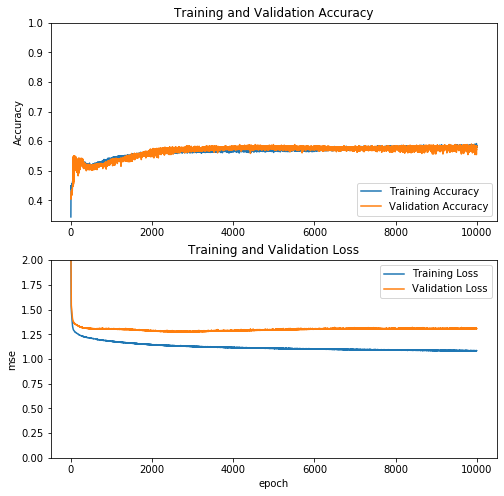

In [9]:
print(history.history.keys())
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('mse')
plt.ylim([0,2.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [16]:
best_clf

In [21]:
display(eli5.show_weights(history))

In [6]:
from keras import backend as K

def check_units(y_true, y_pred):
    if y_pred.shape[1] != 1:
        y_pred = y_pred[:,1:2]
        y_true = y_true[:,1:2]
    return y_true, y_pred

def precision(y_true, y_pred):
    y_true, y_pred = check_units(y_true, y_pred)
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def recall(y_true, y_pred):
    y_true, y_pred = check_units(y_true, y_pred)
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def f1(y_true, y_pred):
    def recall(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision
    y_true, y_pred = check_units(y_true, y_pred)
    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

Using TensorFlow backend.


In [4]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras import Sequential
#embedding = "https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1"
#embedding = "https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim-with-oov/1"
#embedding = "https://tfhub.dev/google/tf2-preview/nnlm-en-dim50/1"
embedding = "https://tfhub.dev/google/tf2-preview/nnlm-en-dim128/1"


hub_layer = hub.KerasLayer(embedding, input_shape=[], 
                           dtype=tf.string, trainable=False)
model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(Dropout(0.1))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 128)               124642688 
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dropout_2 (Dropout)          (None, 16)                0

In [75]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.0001),
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=[['accuracy', 'mse',precision,recall, f1]])


In [76]:
history = model.fit(X_train.title,y_train,
                    epochs=5000,validation_data=(X_test.title,y_test),callbacks=[tf.keras.callbacks.ModelCheckpoint(
    '{epoch}', monitor='val_loss', verbose=1, save_best_only=False,
    save_weights_only=False, mode='auto', save_freq='epoch')
])


Train on 2120 samples, validate on 530 samples
Epoch 1/5000
2048/2120 [===========================>..] - ETA: 0s - loss: 0.0841 - accuracy: 0.9722 - mse: 0.0042 - precision: 0.2109 - recall: 0.2083 - f1: 0.2057
Epoch 00001: saving model to 1
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


INFO:tensorflow:Assets written to: 1\assets


INFO:tensorflow:Assets written to: 1\assets


2120/2120 [==============================] - 10s 5ms/sample - loss: 0.0837 - accuracy: 0.9722 - mse: 0.0042 - precision: 0.2015 - recall: 0.1990 - f1: 0.1965 - val_loss: 18.1831 - val_accuracy: 0.5679 - val_mse: 0.0826 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_f1: 0.0000e+00
Epoch 2/5000
2080/2120 [============================>.] - ETA: 0s - loss: 0.0895 - accuracy: 0.9697 - mse: 0.0047 - precision: 0.2615 - recall: 0.2615 - f1: 0.2615
Epoch 00002: saving model to 2
INFO:tensorflow:Assets written to: 2\assets


INFO:tensorflow:Assets written to: 2\assets


2120/2120 [==============================] - 8s 4ms/sample - loss: 0.0901 - accuracy: 0.9693 - mse: 0.0047 - precision: 0.2537 - recall: 0.2537 - f1: 0.2537 - val_loss: 18.2033 - val_accuracy: 0.5660 - val_mse: 0.0827 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_f1: 0.0000e+00
Epoch 3/5000
2112/2120 [============================>.] - ETA: 0s - loss: 0.0902 - accuracy: 0.9744 - mse: 0.0044 - precision: 0.1970 - recall: 0.2045 - f1: 0.1970
Epoch 00003: saving model to 3
INFO:tensorflow:Assets written to: 3\assets


INFO:tensorflow:Assets written to: 3\assets


2120/2120 [==============================] - 9s 4ms/sample - loss: 0.0898 - accuracy: 0.9745 - mse: 0.0044 - precision: 0.1940 - recall: 0.2015 - f1: 0.1940 - val_loss: 18.1966 - val_accuracy: 0.5679 - val_mse: 0.0828 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_f1: 0.0000e+00
Epoch 4/5000
2080/2120 [============================>.] - ETA: 0s - loss: 0.0823 - accuracy: 0.9740 - mse: 0.0040 - precision: 0.2692 - recall: 0.2769 - f1: 0.2718
Epoch 00004: saving model to 4


KeyboardInterrupt: 

In [62]:
from sklearn import metrics
import sklearn
from sklearn.metrics import f1_score,precision_score,recall_score
y_pred2 = model.predict(X_test.title)


In [65]:
print("Accuracy :",metrics.accuracy_score(y_test2,y_pred))
print("Macro f1 score :",metrics.f1_score(y_test2, y_pred, average = 'macro'))
print("Micro f1 scoore :",metrics.f1_score(y_test2, y_pred, average = 'micro'))
print("Hamming loss :",metrics.hamming_loss(y_test2,y_pred))
print("Precision recall report :\n",metrics.classification_report(y_test2, y_pred))

Accuracy : 0.5679245283018868
Macro f1 score : 0.2460777284893481
Micro f1 scoore : 0.5679245283018868
Hamming loss : 0.4320754716981132
Precision recall report :
               precision    recall  f1-score   support

           0       0.20      0.06      0.10        31
           1       0.00      0.00      0.00        13
           2       0.00      0.00      0.00         8
           3       0.48      0.71      0.57       180
           4       0.78      0.31      0.44        45
           5       0.00      0.00      0.00        12
           6       0.67      0.70      0.68       222
           7       1.00      0.50      0.67         6
           8       0.00      0.00      0.00         6
           9       0.00      0.00      0.00         7

    accuracy                           0.57       530
   macro avg       0.31      0.23      0.25       530
weighted avg       0.53      0.57      0.53       530



In [66]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

sn.heatmap(mat)

NameError: name 'mat' is not defined

In [71]:
pd.crosstab(y_test2, y_pred, rownames=['False'], colnames=['Predicted'], margins=True)

ValueError: If using all scalar values, you must pass an index

dict_keys(['loss', 'accuracy', 'mse', 'precision', 'recall', 'f1', 'val_loss', 'val_accuracy', 'val_mse', 'val_precision', 'val_recall', 'val_f1'])


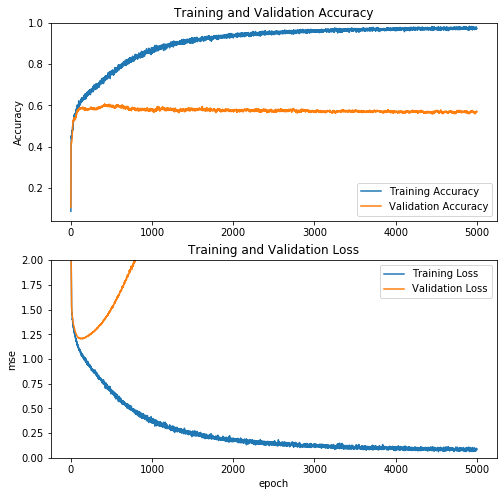

In [72]:
print(history.history.keys())
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('mse')
plt.ylim([0,2.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [11]:
hub_layer(X_train.title[:3])

<tf.Tensor: shape=(3, 128), dtype=float32, numpy=
array([[ 2.18680844e-01,  4.82037328e-02, -1.85422808e-01,
         1.41650036e-01,  1.04912780e-01, -1.44649327e-01,
         1.31016448e-01, -9.91295278e-02,  1.59096032e-01,
        -2.35908940e-01,  8.50973055e-02, -7.58437067e-02,
        -2.48276591e-01, -2.28408854e-02,  6.20085336e-02,
         1.45710438e-01, -6.01306260e-02, -4.57665026e-02,
        -5.09954393e-02,  4.35800493e-01, -4.95984964e-03,
        -5.34296706e-02, -6.70377165e-02,  1.25655336e-02,
        -9.93147045e-02,  1.31704509e-01,  1.96242053e-02,
        -1.40619695e-01, -3.01241502e-02, -4.41279523e-02,
        -2.38508526e-02,  1.36533007e-01, -1.00823991e-01,
        -1.33730253e-04,  1.22503534e-01, -1.28972055e-02,
        -9.92334336e-02, -9.17803720e-02, -1.48846984e-01,
        -1.59576416e-01,  3.22909132e-02,  1.70879532e-03,
        -5.45374537e-03, -1.08838387e-01,  2.89937314e-02,
        -2.97678083e-01, -2.86891479e-02, -1.16963595e-01,
      

In [19]:
import eli5
display(eli5.show_weights(history))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


In [21]:
y = encoder.inverse_transform(y_test)

In [52]:
def maxit(arr):
    return np.argmax(arr)

In [53]:
y_test[0]

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

In [54]:
y_pred = []
for i in y_pred2:
    y_pred.append(maxit(i))
y_pred

[6,
 3,
 3,
 3,
 3,
 3,
 3,
 6,
 3,
 6,
 6,
 3,
 0,
 4,
 6,
 6,
 6,
 4,
 3,
 3,
 6,
 3,
 3,
 6,
 3,
 6,
 3,
 6,
 3,
 3,
 6,
 6,
 3,
 6,
 3,
 6,
 7,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 6,
 6,
 3,
 3,
 3,
 3,
 3,
 6,
 6,
 6,
 3,
 6,
 3,
 3,
 6,
 3,
 6,
 6,
 3,
 3,
 3,
 3,
 6,
 3,
 4,
 6,
 3,
 6,
 3,
 6,
 3,
 6,
 6,
 6,
 6,
 6,
 3,
 0,
 3,
 6,
 3,
 6,
 3,
 6,
 6,
 6,
 3,
 3,
 6,
 3,
 6,
 6,
 3,
 3,
 6,
 3,
 6,
 6,
 3,
 6,
 6,
 6,
 3,
 3,
 6,
 6,
 3,
 6,
 6,
 6,
 3,
 3,
 6,
 3,
 3,
 6,
 3,
 3,
 3,
 6,
 3,
 6,
 6,
 6,
 3,
 3,
 3,
 6,
 6,
 3,
 3,
 3,
 6,
 3,
 6,
 3,
 3,
 3,
 3,
 3,
 6,
 6,
 3,
 3,
 3,
 3,
 6,
 3,
 6,
 3,
 6,
 3,
 6,
 6,
 3,
 3,
 6,
 6,
 4,
 6,
 6,
 4,
 6,
 3,
 3,
 3,
 3,
 3,
 4,
 3,
 6,
 6,
 3,
 3,
 3,
 6,
 3,
 6,
 3,
 6,
 3,
 3,
 3,
 3,
 6,
 6,
 6,
 6,
 3,
 6,
 3,
 3,
 3,
 3,
 6,
 4,
 3,
 6,
 3,
 3,
 6,
 3,
 3,
 3,
 3,
 6,
 3,
 3,
 7,
 3,
 3,
 3,
 3,
 3,
 6,
 3,
 3,
 6,
 6,
 6,
 3,
 6,
 6,
 6,
 3,
 6,
 4,
 6,
 6,
 3,
 6,
 6,
 6,
 6,
 3,
 3,
 6,
 9,
 3,
 3,
 6,
 6,
 3,
 3,
 4,
 3,


In [56]:
y_test2 = []
for i in y_test:
    y_test2.append(maxit(i))
y_test2

[6,
 3,
 0,
 6,
 3,
 6,
 6,
 6,
 6,
 3,
 6,
 4,
 0,
 4,
 5,
 6,
 6,
 4,
 6,
 0,
 6,
 6,
 0,
 6,
 6,
 3,
 3,
 6,
 3,
 3,
 3,
 6,
 4,
 3,
 6,
 4,
 7,
 3,
 3,
 6,
 3,
 0,
 3,
 3,
 6,
 1,
 3,
 3,
 6,
 3,
 6,
 6,
 5,
 6,
 6,
 3,
 3,
 3,
 6,
 4,
 6,
 3,
 6,
 3,
 3,
 3,
 6,
 4,
 3,
 6,
 9,
 3,
 3,
 6,
 6,
 6,
 6,
 6,
 5,
 6,
 3,
 6,
 3,
 3,
 5,
 6,
 6,
 6,
 2,
 5,
 8,
 3,
 6,
 3,
 6,
 6,
 3,
 6,
 6,
 6,
 0,
 6,
 3,
 6,
 6,
 6,
 3,
 4,
 6,
 0,
 6,
 6,
 6,
 6,
 4,
 4,
 3,
 5,
 3,
 6,
 3,
 3,
 6,
 6,
 0,
 6,
 3,
 6,
 3,
 4,
 3,
 6,
 6,
 6,
 3,
 3,
 6,
 3,
 6,
 9,
 6,
 3,
 6,
 3,
 6,
 7,
 3,
 8,
 1,
 0,
 3,
 3,
 6,
 3,
 6,
 3,
 3,
 3,
 3,
 3,
 6,
 6,
 4,
 6,
 6,
 4,
 6,
 0,
 3,
 4,
 6,
 4,
 4,
 6,
 6,
 6,
 1,
 0,
 3,
 3,
 3,
 4,
 3,
 6,
 9,
 6,
 5,
 6,
 3,
 3,
 6,
 3,
 3,
 6,
 2,
 3,
 3,
 4,
 6,
 9,
 3,
 3,
 3,
 3,
 6,
 0,
 3,
 0,
 3,
 6,
 6,
 0,
 7,
 6,
 6,
 6,
 1,
 3,
 6,
 6,
 3,
 6,
 6,
 3,
 3,
 6,
 3,
 6,
 4,
 6,
 4,
 6,
 3,
 6,
 0,
 5,
 3,
 6,
 3,
 4,
 6,
 6,
 1,
 2,
 3,
 6,
 3,
 3,
 4,
 3,
